# Graph State Benchmark Example

In [1]:
%load_ext autoreload
%autoreload 2

# Choose (or define) a backend

In [2]:
#backend = "fakeadonis"
#backend = "fakeapollo"
#backend = "garnet"
#backend = "deneb"

**Set IQM Token if using Resonance.**

In [4]:
import os
token = "XXXXXXXXXXXXXXX"
os.environ["IQM_TOKEN"] = token

from iqm.benchmarks.utils import get_iqm_backend
backend=get_iqm_backend("garnet")

# from iqm.qiskit_iqm.iqm_provider import IQMProvider
# iqm_url="https://cocos.resonance.meetiqm.com/emerald-fe33b793-44a0-42d6"
# provider = IQMProvider(iqm_url)
# backend = provider.get_backend()

C:\Users\PedroFigueroaRomero\anaconda3\envs\iqm-benchmarks\Lib\site-packages\pygsti\baseobjs\opcalc\__init__.py:31: UserWarning: 
An optimized Cython-based implementation of `pygsti.baseobjs.opcalc` is available as
an extension, but couldn't be imported. This might happen if the
extension has not been built. `pip install cython`, then reinstall
pyGSTi to build Cython extensions. Alternatively, setting the
environment variable `PYGSTI_NO_CYTHON_WARNING` will suppress this
message.

  _warnings.warn(warn_msg)
C:\Users\PedroFigueroaRomero\anaconda3\envs\iqm-benchmarks\Lib\site-packages\pygsti\circuits\circuitparser\__init__.py:60: UserWarning: 
An optimized Cython-based implementation of `pygsti.circuits.circuitparser` is available as
an extension, but couldn't be imported. This might happen if the
extension has not been built. `pip install cython`, then reinstall
pyGSTi to build Cython extensions. Alternatively, setting the
environment variable `PYGSTI_NO_CYTHON_WARNING` will suppress th

In [5]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# Graph State Configuration

In [6]:
from iqm.benchmarks.entanglement.graph_states import *

In [7]:
EXAMPLE_GRAPHSTATE = GraphStateConfiguration(
    qubits=list(range(backend.num_qubits)),
    shots=2**12,
    tomography="state_tomography",
    # n_random_unitaries=25,
    # n_median_of_means=4,
    #max_gates_per_batch=40_000,
)

In [8]:
benchmark_graphstate = GraphStateBenchmark(backend, EXAMPLE_GRAPHSTATE)
run_graphstate = benchmark_graphstate.run()

2025-02-24 13:04:51,165 - iqm.benchmarks.logging_config - INFO - Identifying qubit pairs and neighbor groups for the Graph State benchmark
2025-02-24 13:04:58,605 - iqm.benchmarks.logging_config - INFO - Clifford dictionaries imported successfully !
2025-02-24 13:04:58,606 - iqm.benchmarks.logging_config - INFO - Performing state tomography of all qubit pairs
2025-02-24 13:04:58,606 - iqm.benchmarks.logging_config - INFO - Now on group 1/10
2025-02-24 13:04:58,606 - iqm.benchmarks.logging_config - INFO - Now on qubit pair (11, 10) and neighbors {5, 6, 9, 15, 16}
2025-02-24 13:04:58,609 - iqm.benchmarks.logging_config - INFO - Now on qubit pair (18, 17) and neighbors {13, 14, 19}
2025-02-24 13:04:58,614 - iqm.benchmarks.logging_config - INFO - Now on qubit pair (7, 12) and neighbors {2, 8, 13}
2025-02-24 13:04:58,617 - iqm.benchmarks.logging_config - INFO - Now on qubit pair (3, 4) and neighbors {0, 1, 2, 5, 8, 9}
2025-02-24 13:04:58,619 - iqm.benchmarks.logging_config - INFO - Submitti

In [11]:
result_graphstate = benchmark_graphstate.analyze()

2025-02-24 13:14:42,441 - iqm.benchmarks.logging_config - INFO - Fetching dataset
2025-02-24 13:14:42,745 - iqm.benchmarks.logging_config - INFO - Dataset imported OK
2025-02-24 13:14:42,747 - iqm.benchmarks.logging_config - INFO - Fetching Clifford dictionary
2025-02-24 13:14:55,312 - iqm.benchmarks.logging_config - INFO - Clifford dictionaries imported successfully !
2025-02-24 13:14:55,313 - iqm.benchmarks.logging_config - INFO - Retrieving tomography-reconstructed states for qubit-pair group 1/10
2025-02-24 13:14:56,086 - iqm.benchmarks.logging_config - INFO - Retrieving tomography-reconstructed states for qubit-pair group 2/10
2025-02-24 13:14:56,891 - iqm.benchmarks.logging_config - INFO - Retrieving tomography-reconstructed states for qubit-pair group 3/10
2025-02-24 13:14:57,643 - iqm.benchmarks.logging_config - INFO - Retrieving tomography-reconstructed states for qubit-pair group 4/10
2025-02-24 13:14:58,217 - iqm.benchmarks.logging_config - INFO - Retrieving tomography-recon

In [ ]:
# result_graphstate.observations

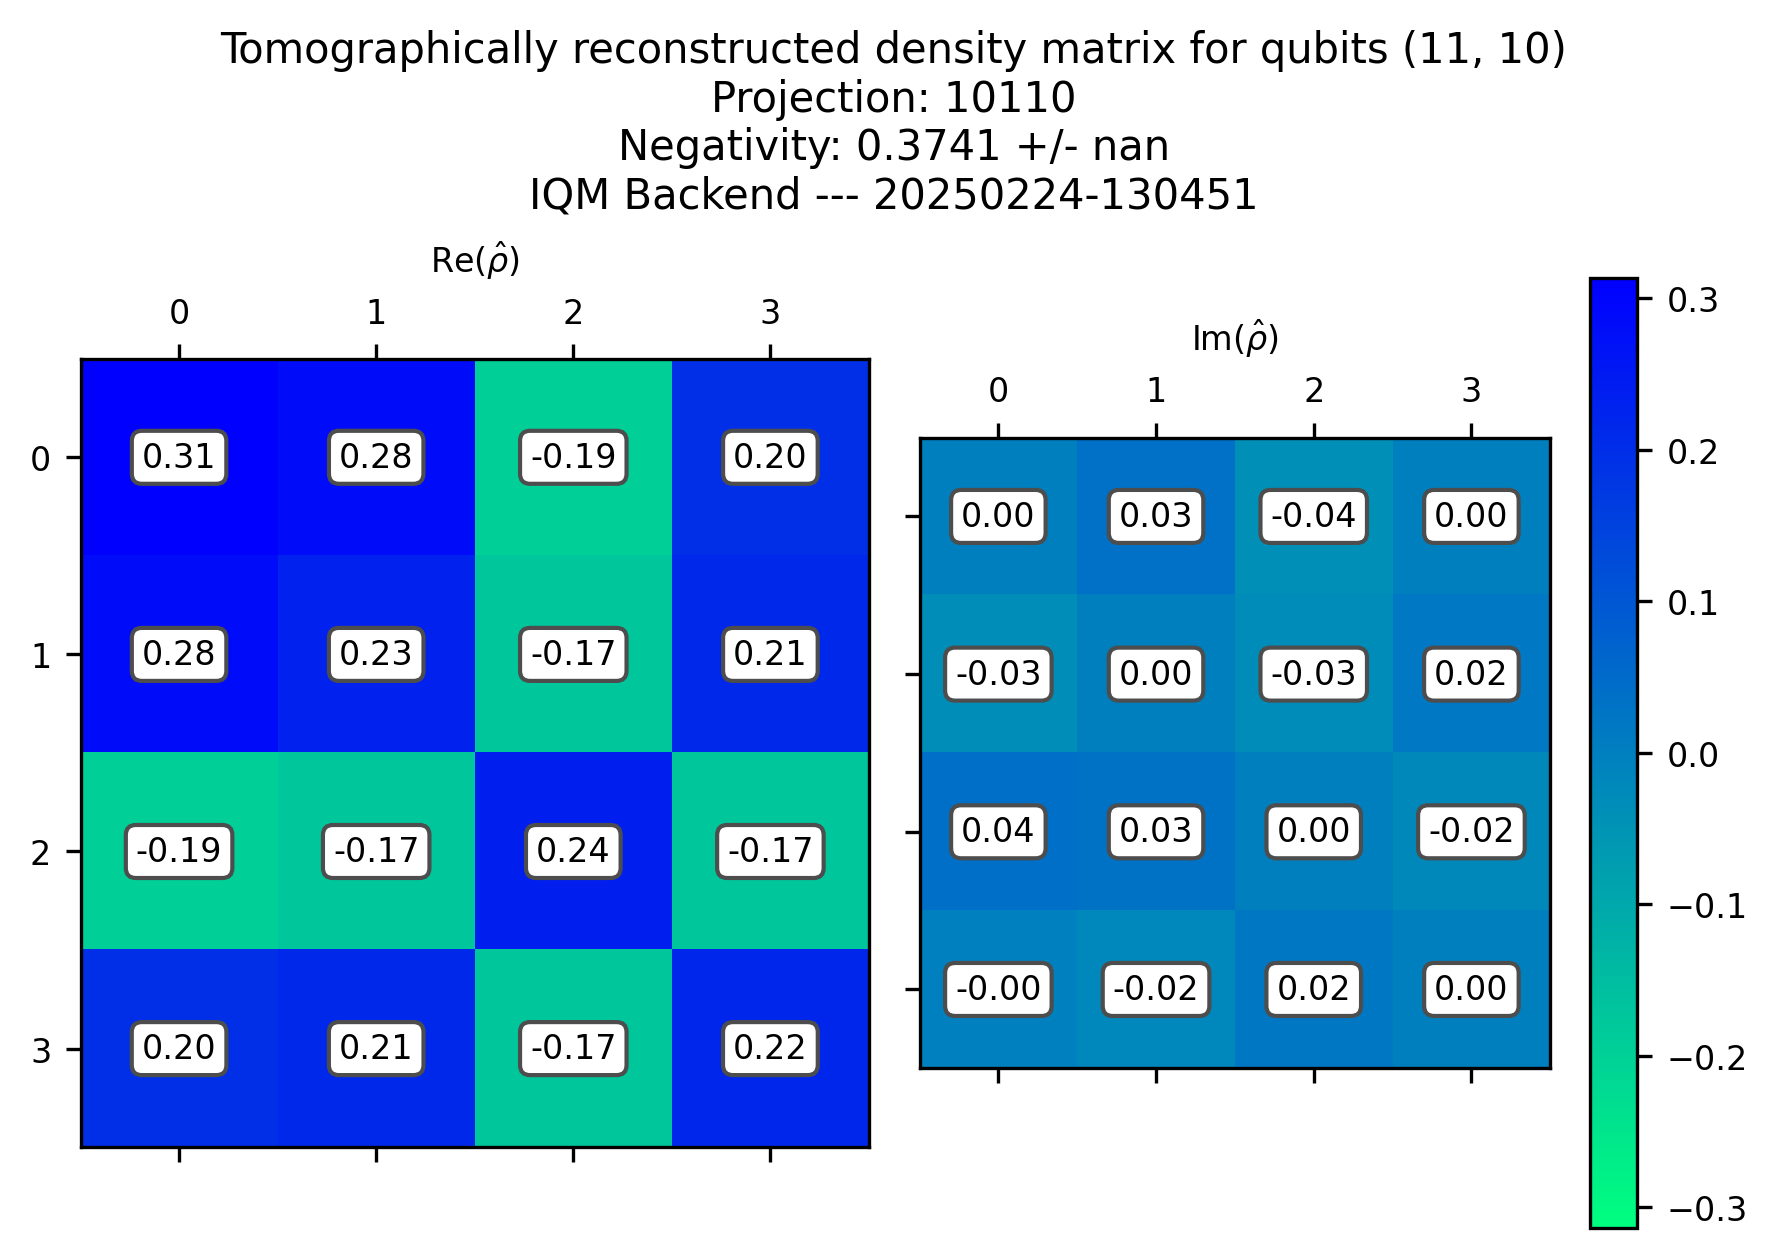

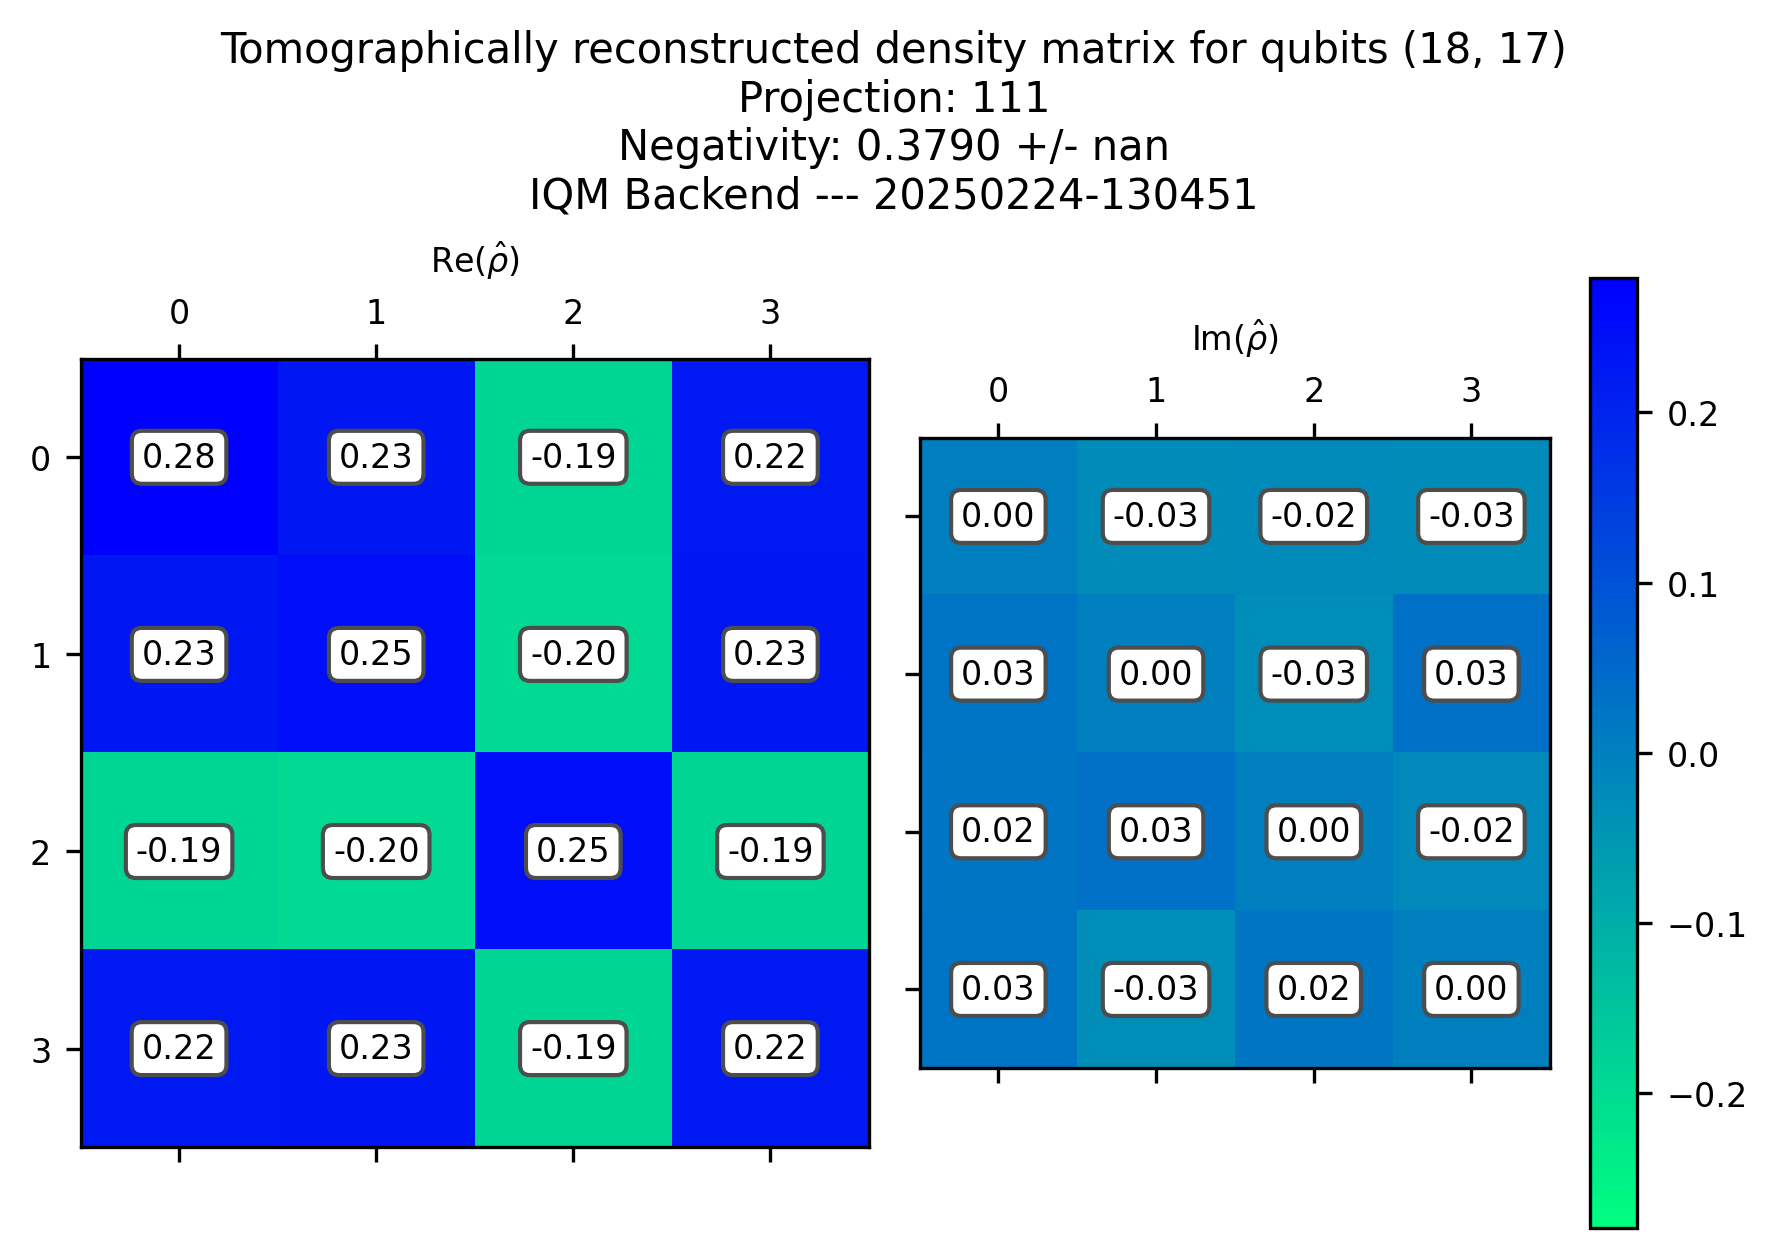

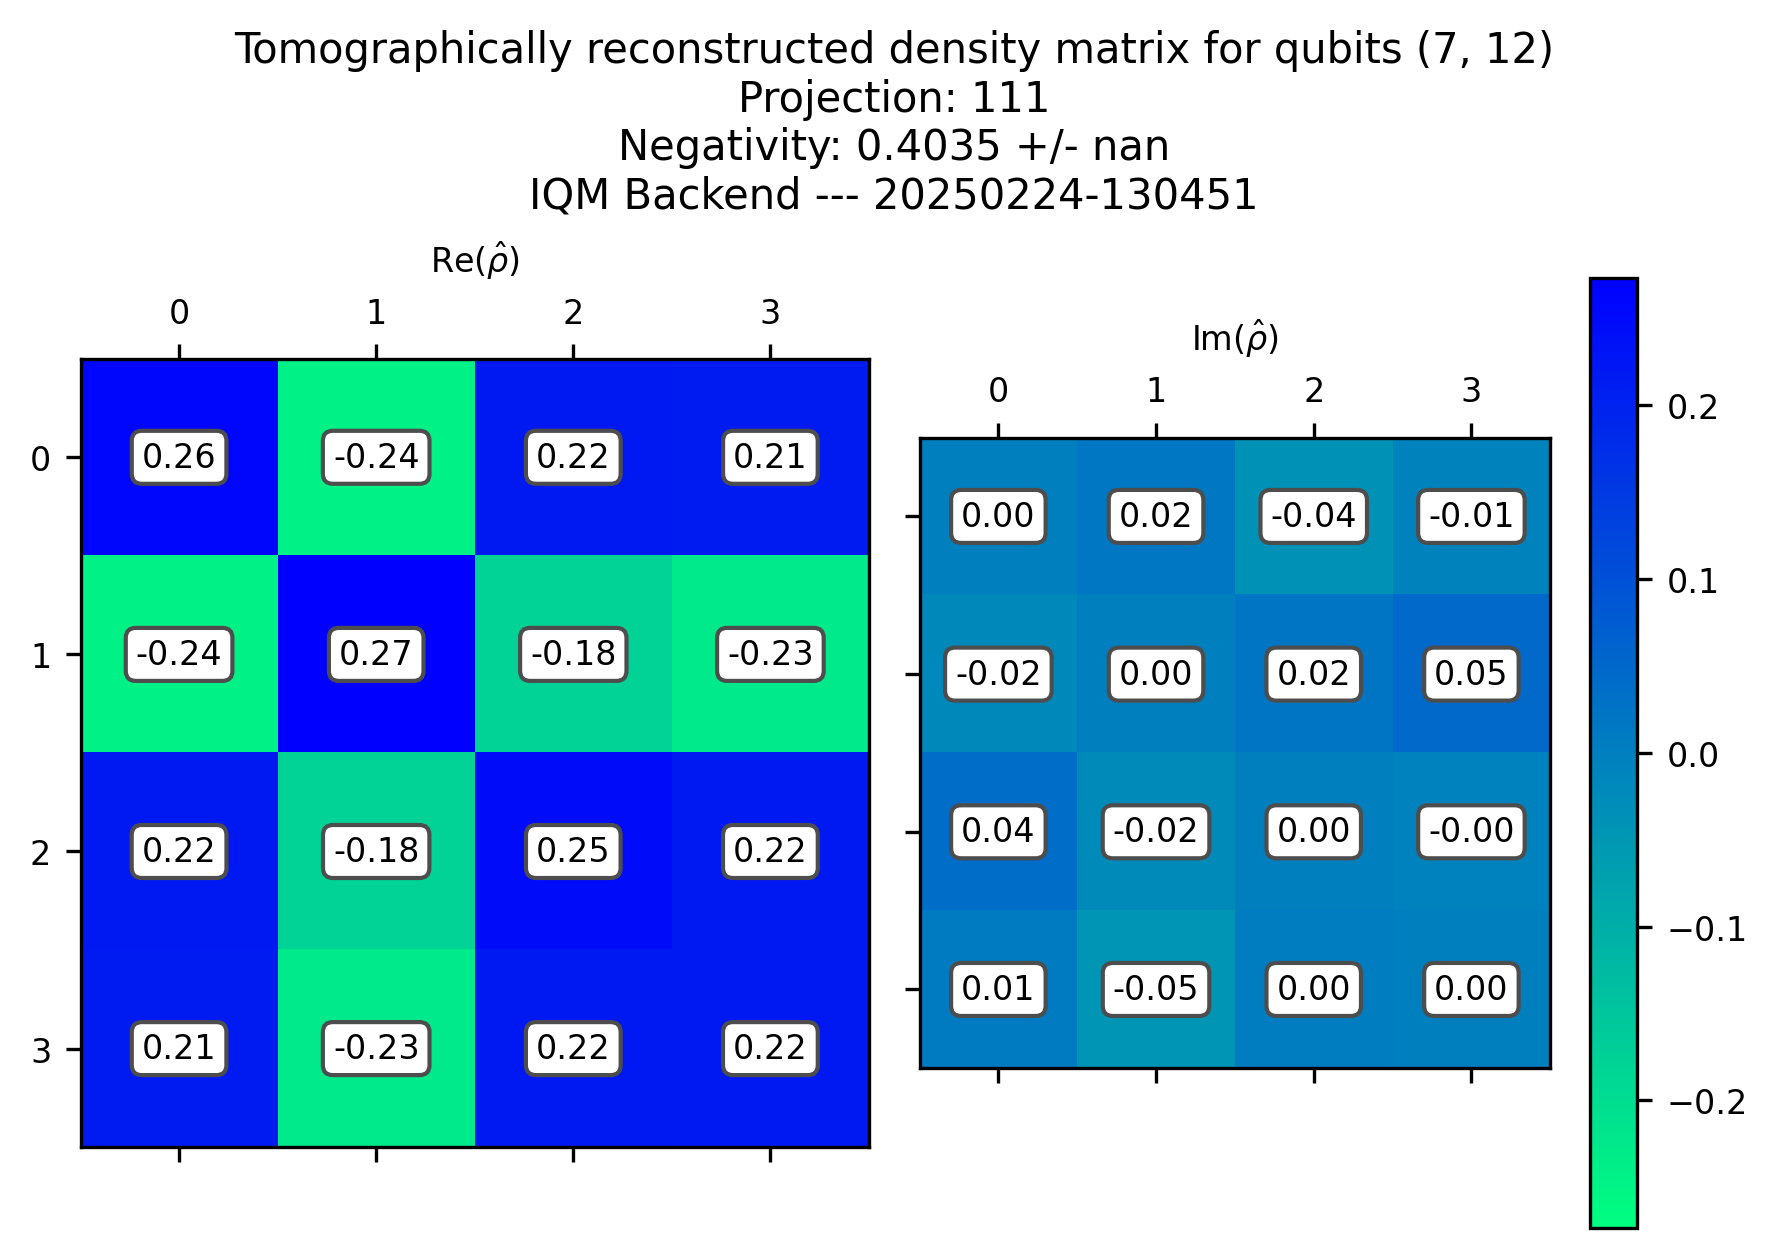

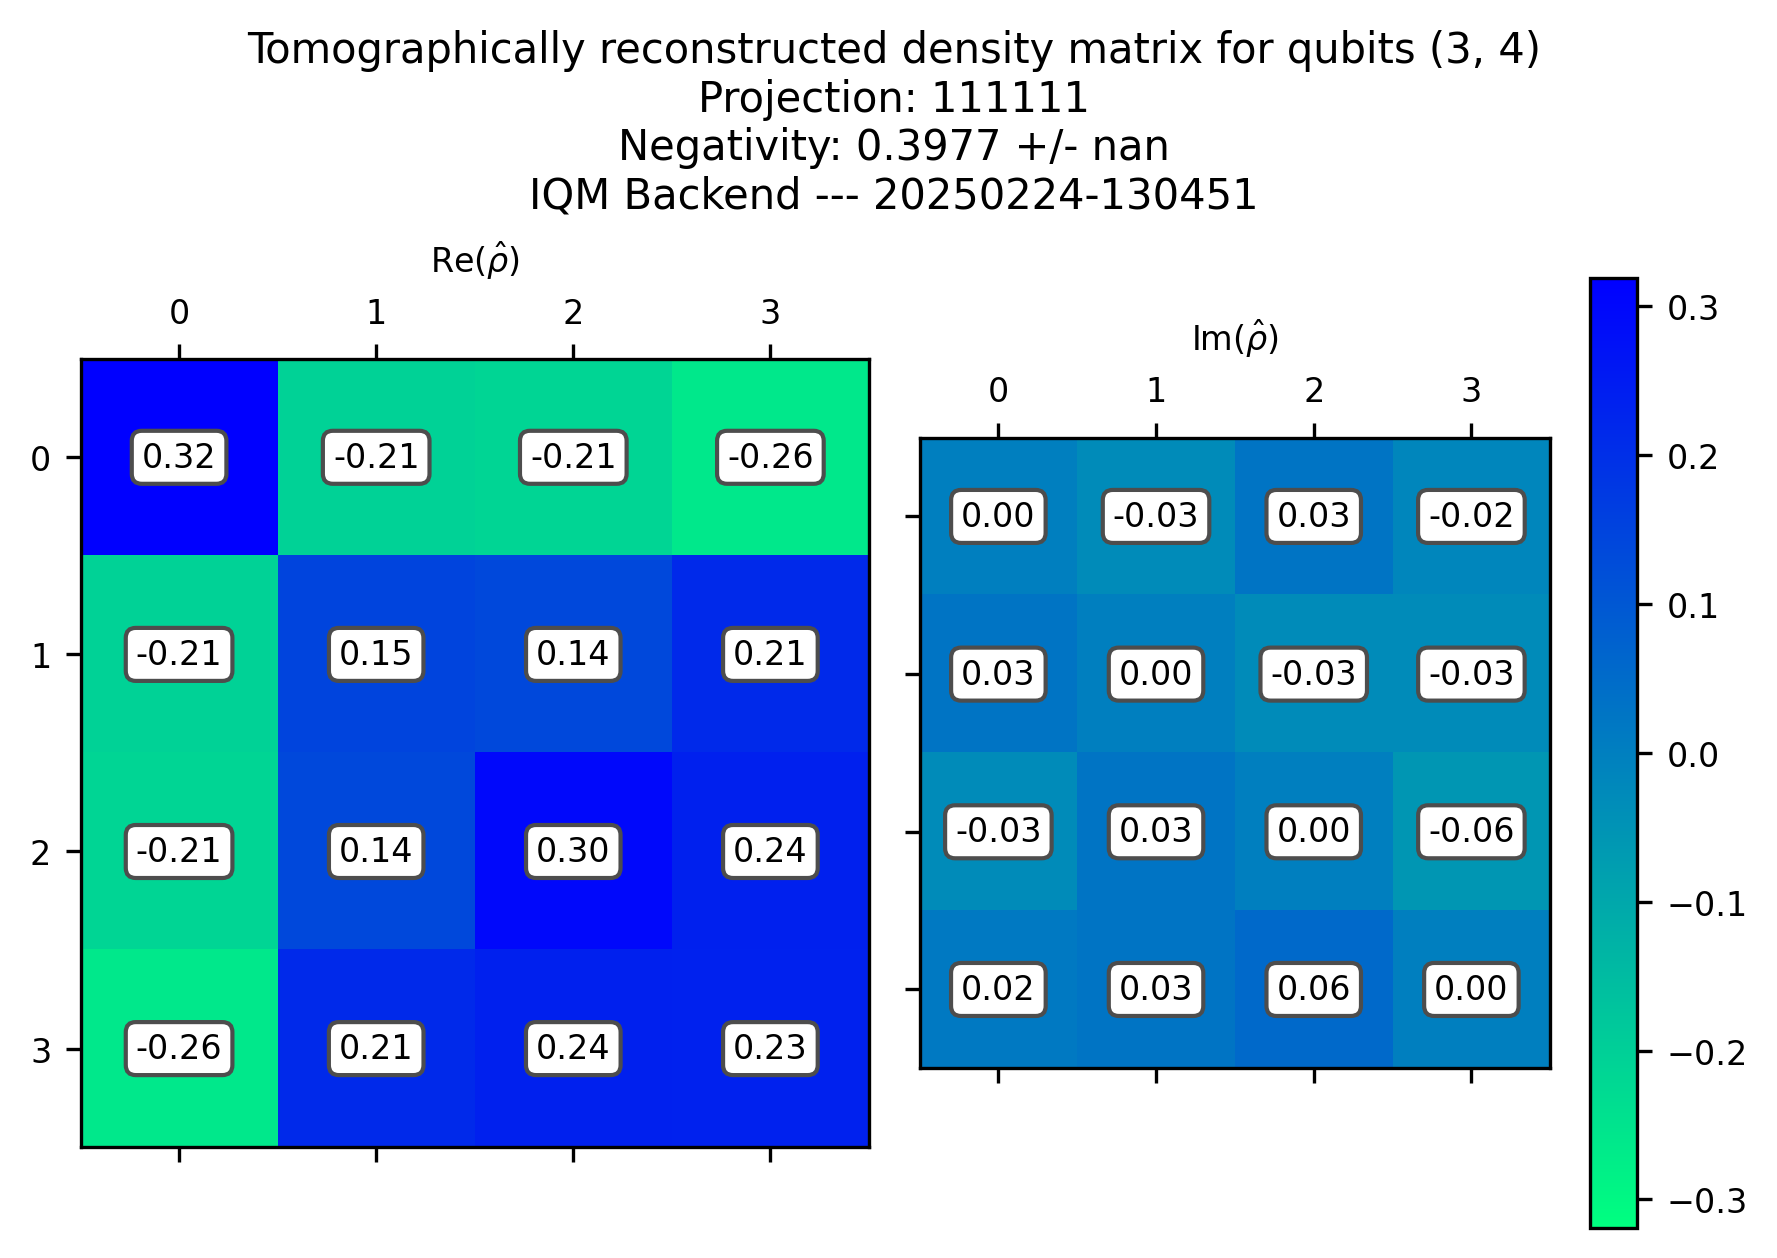

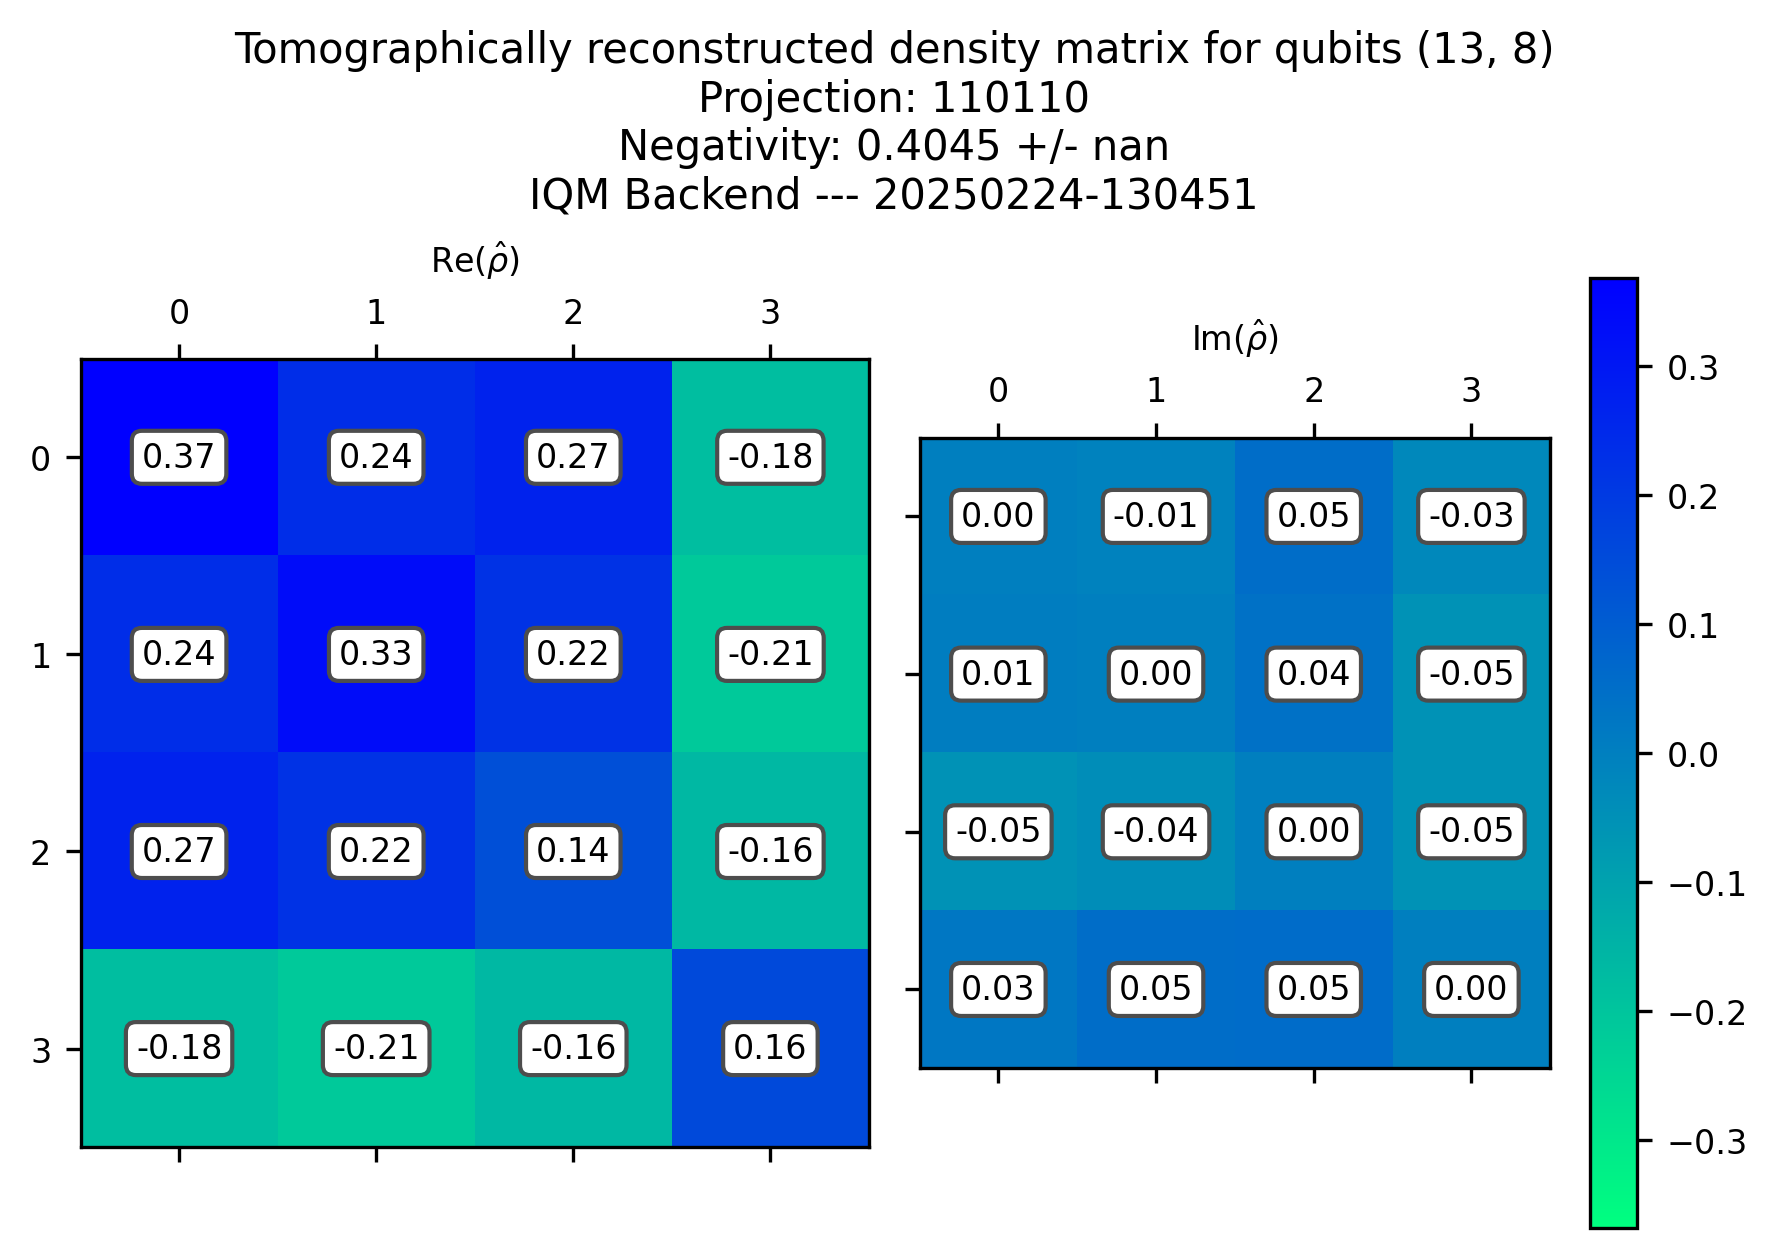

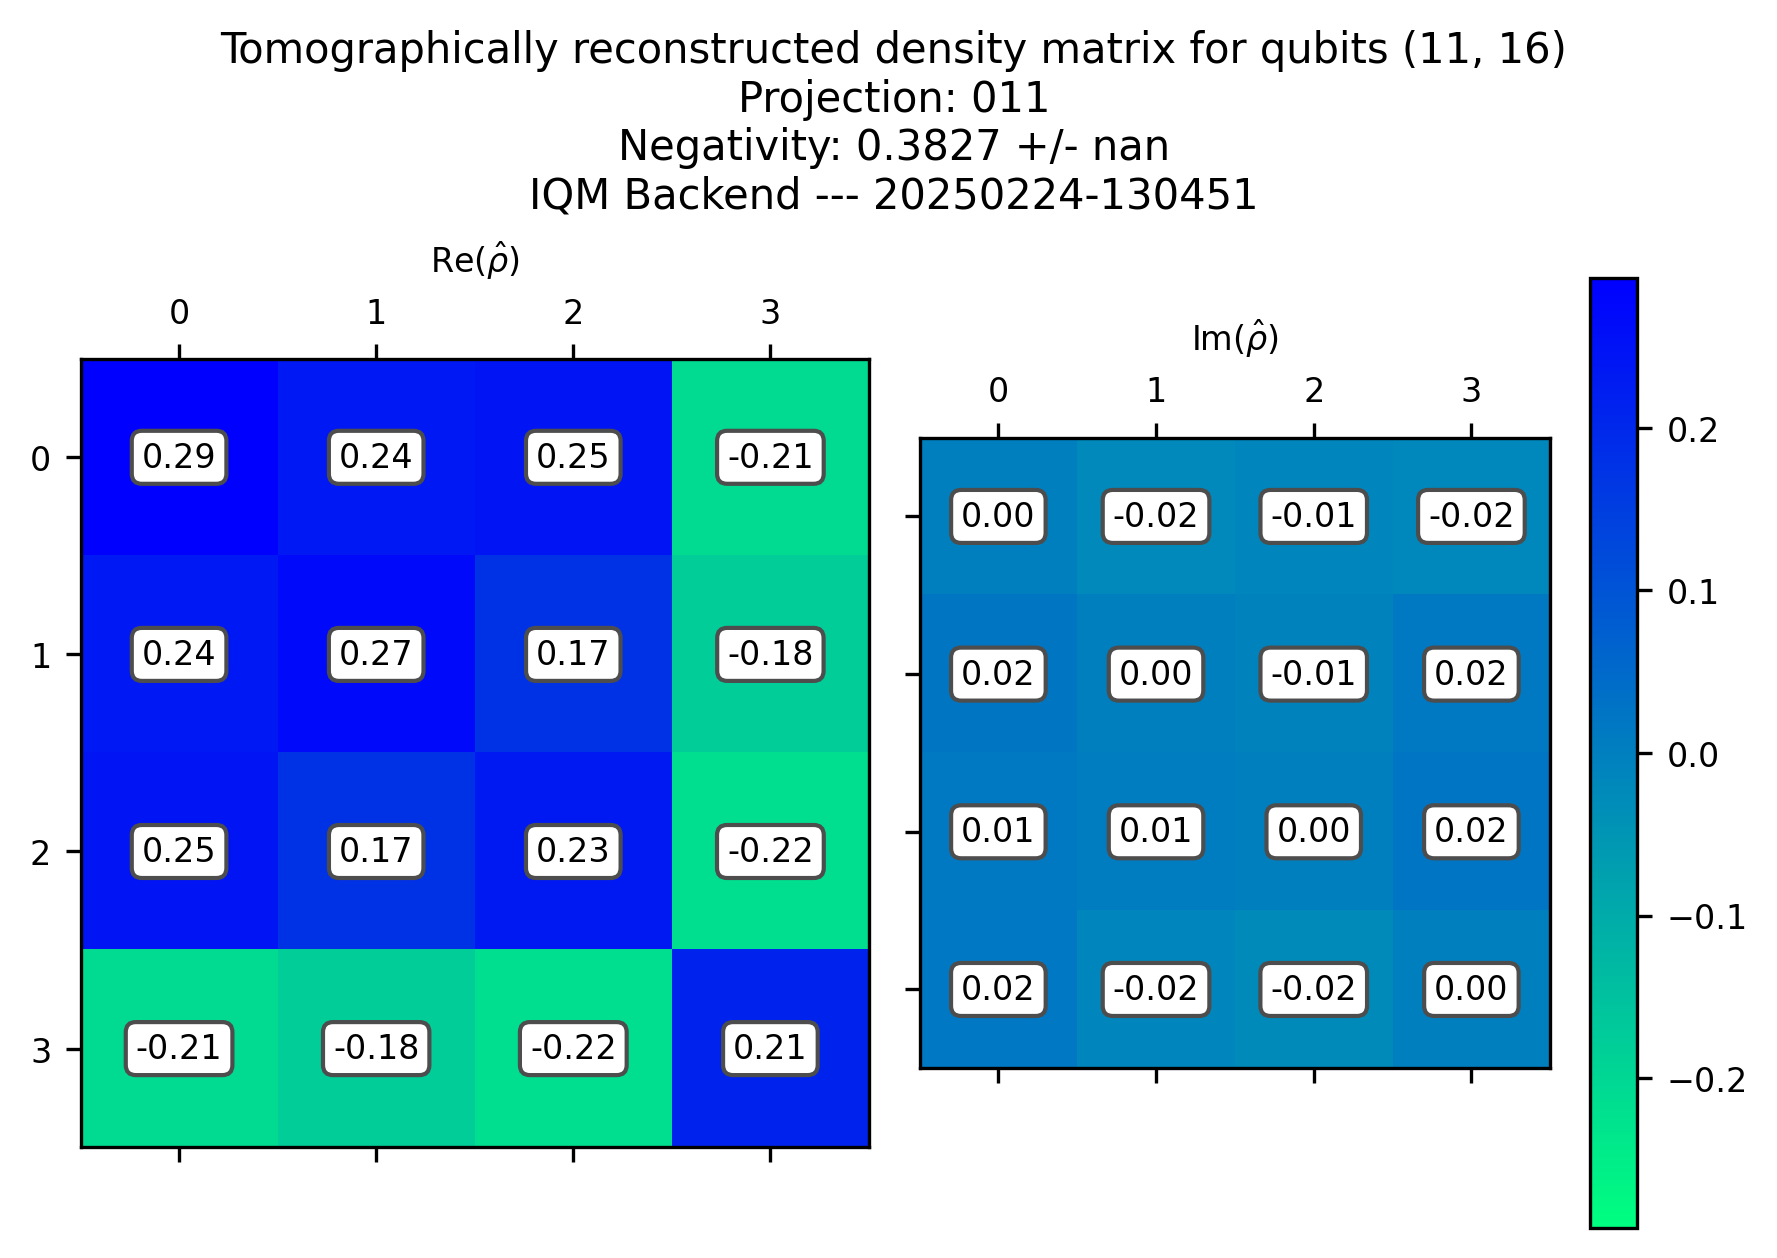

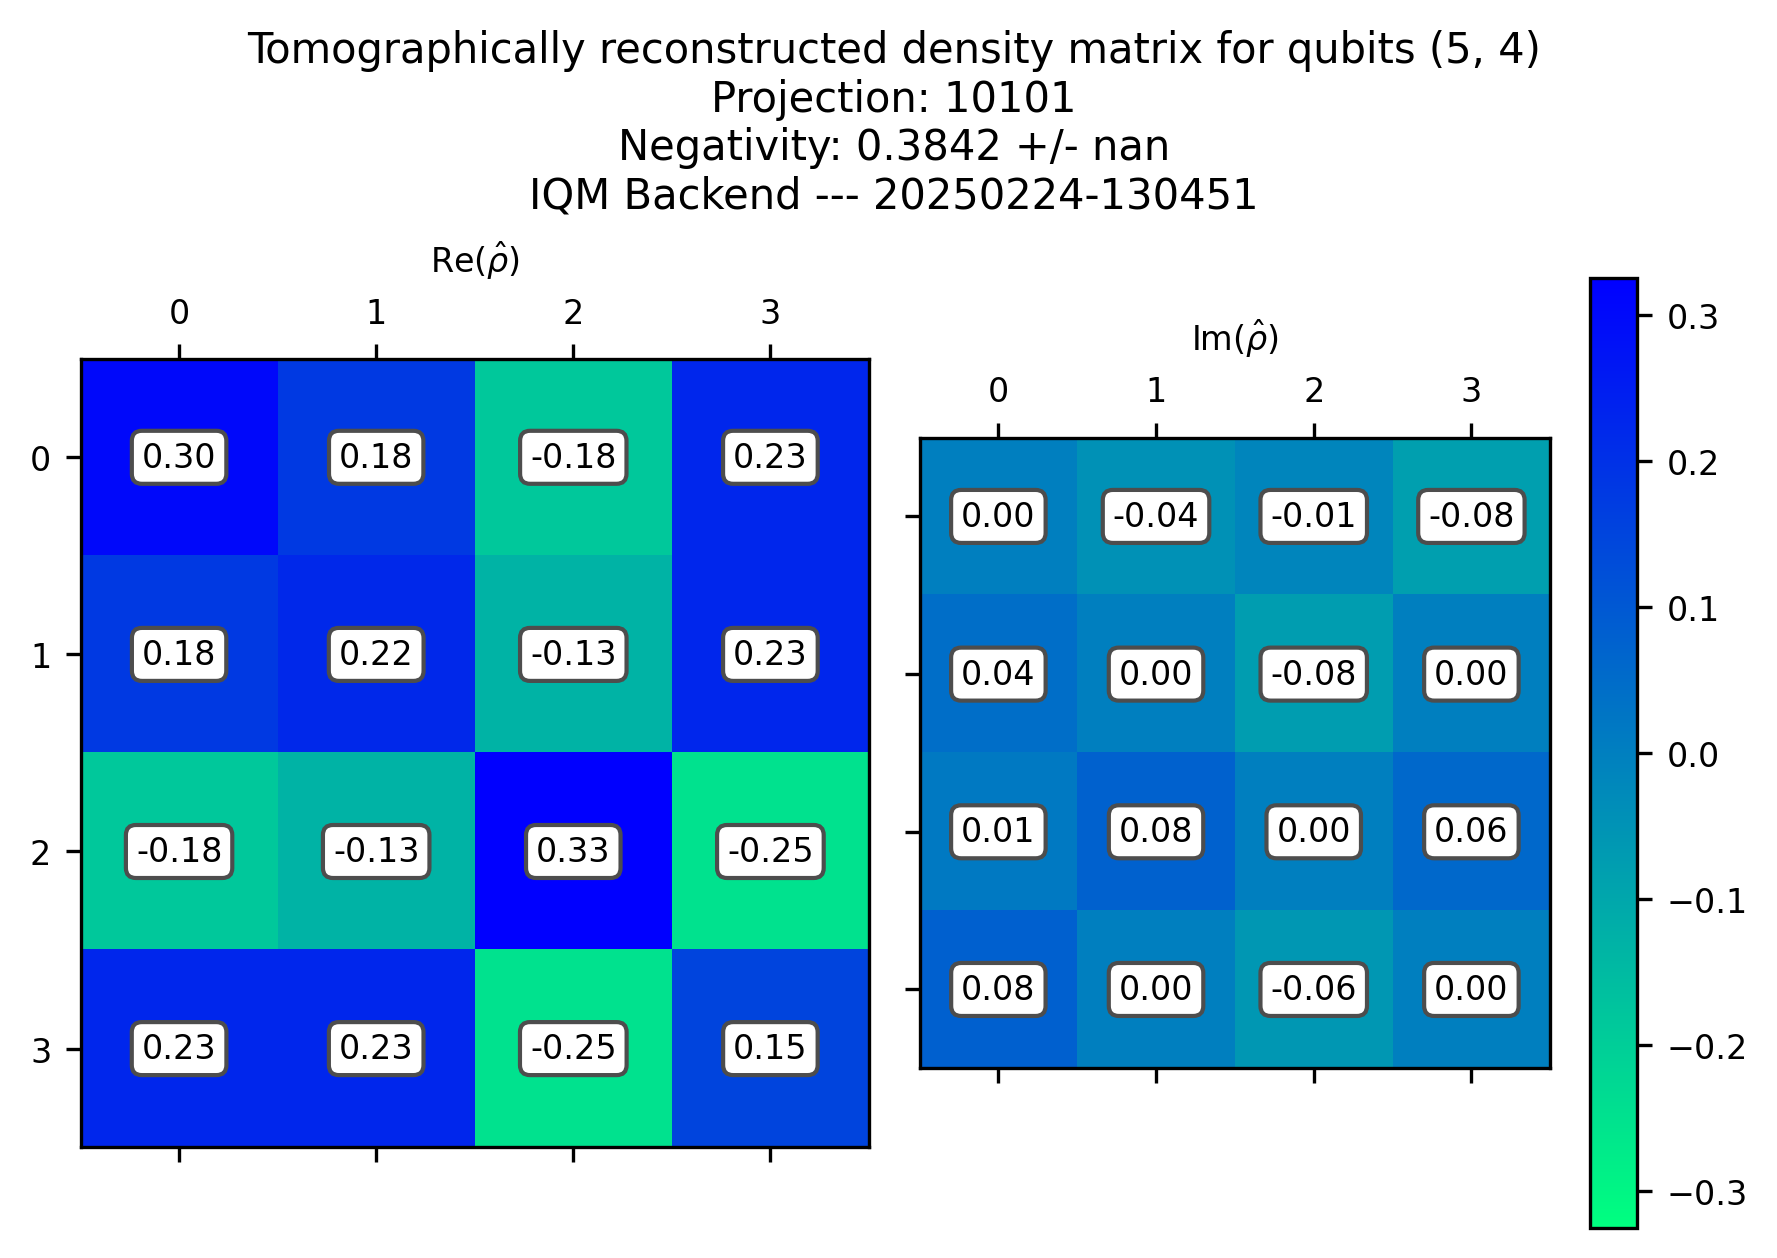

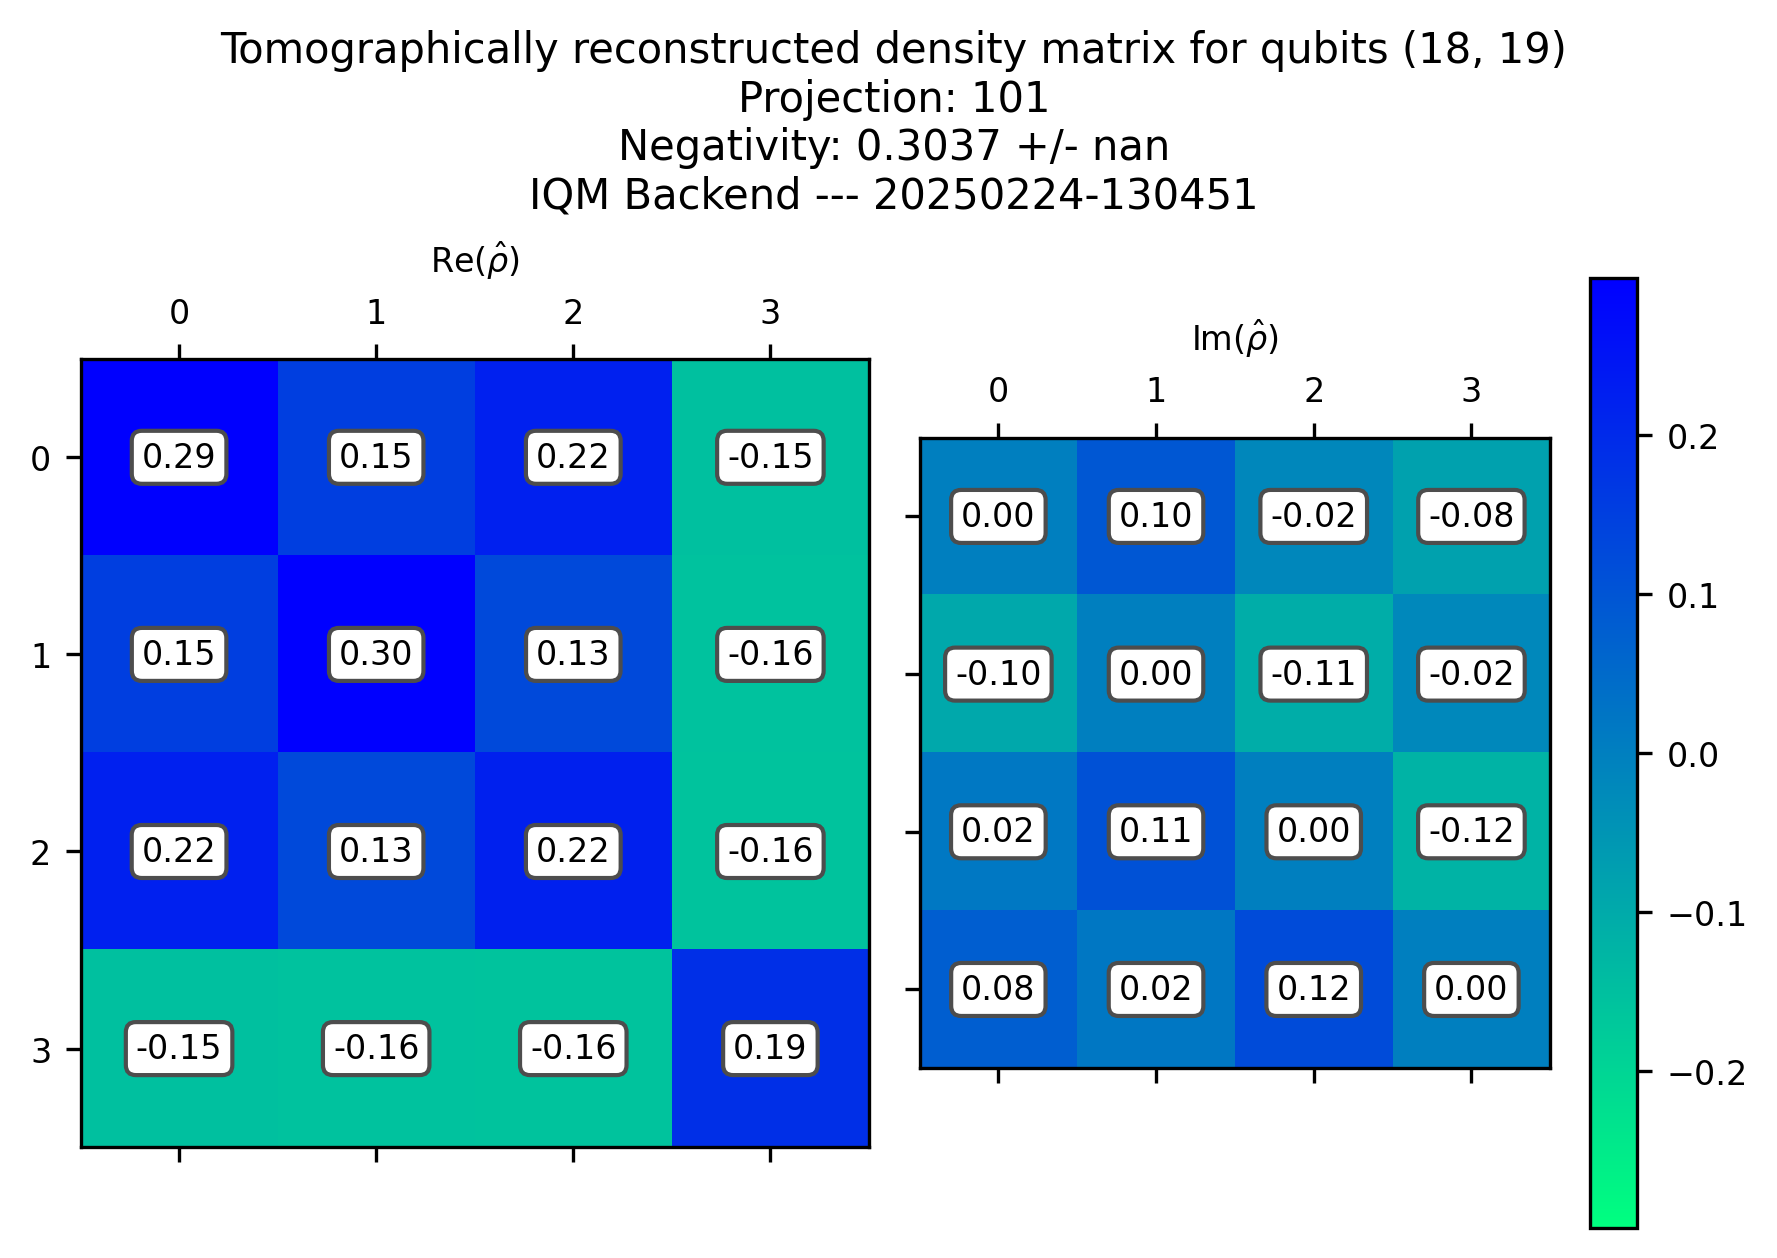

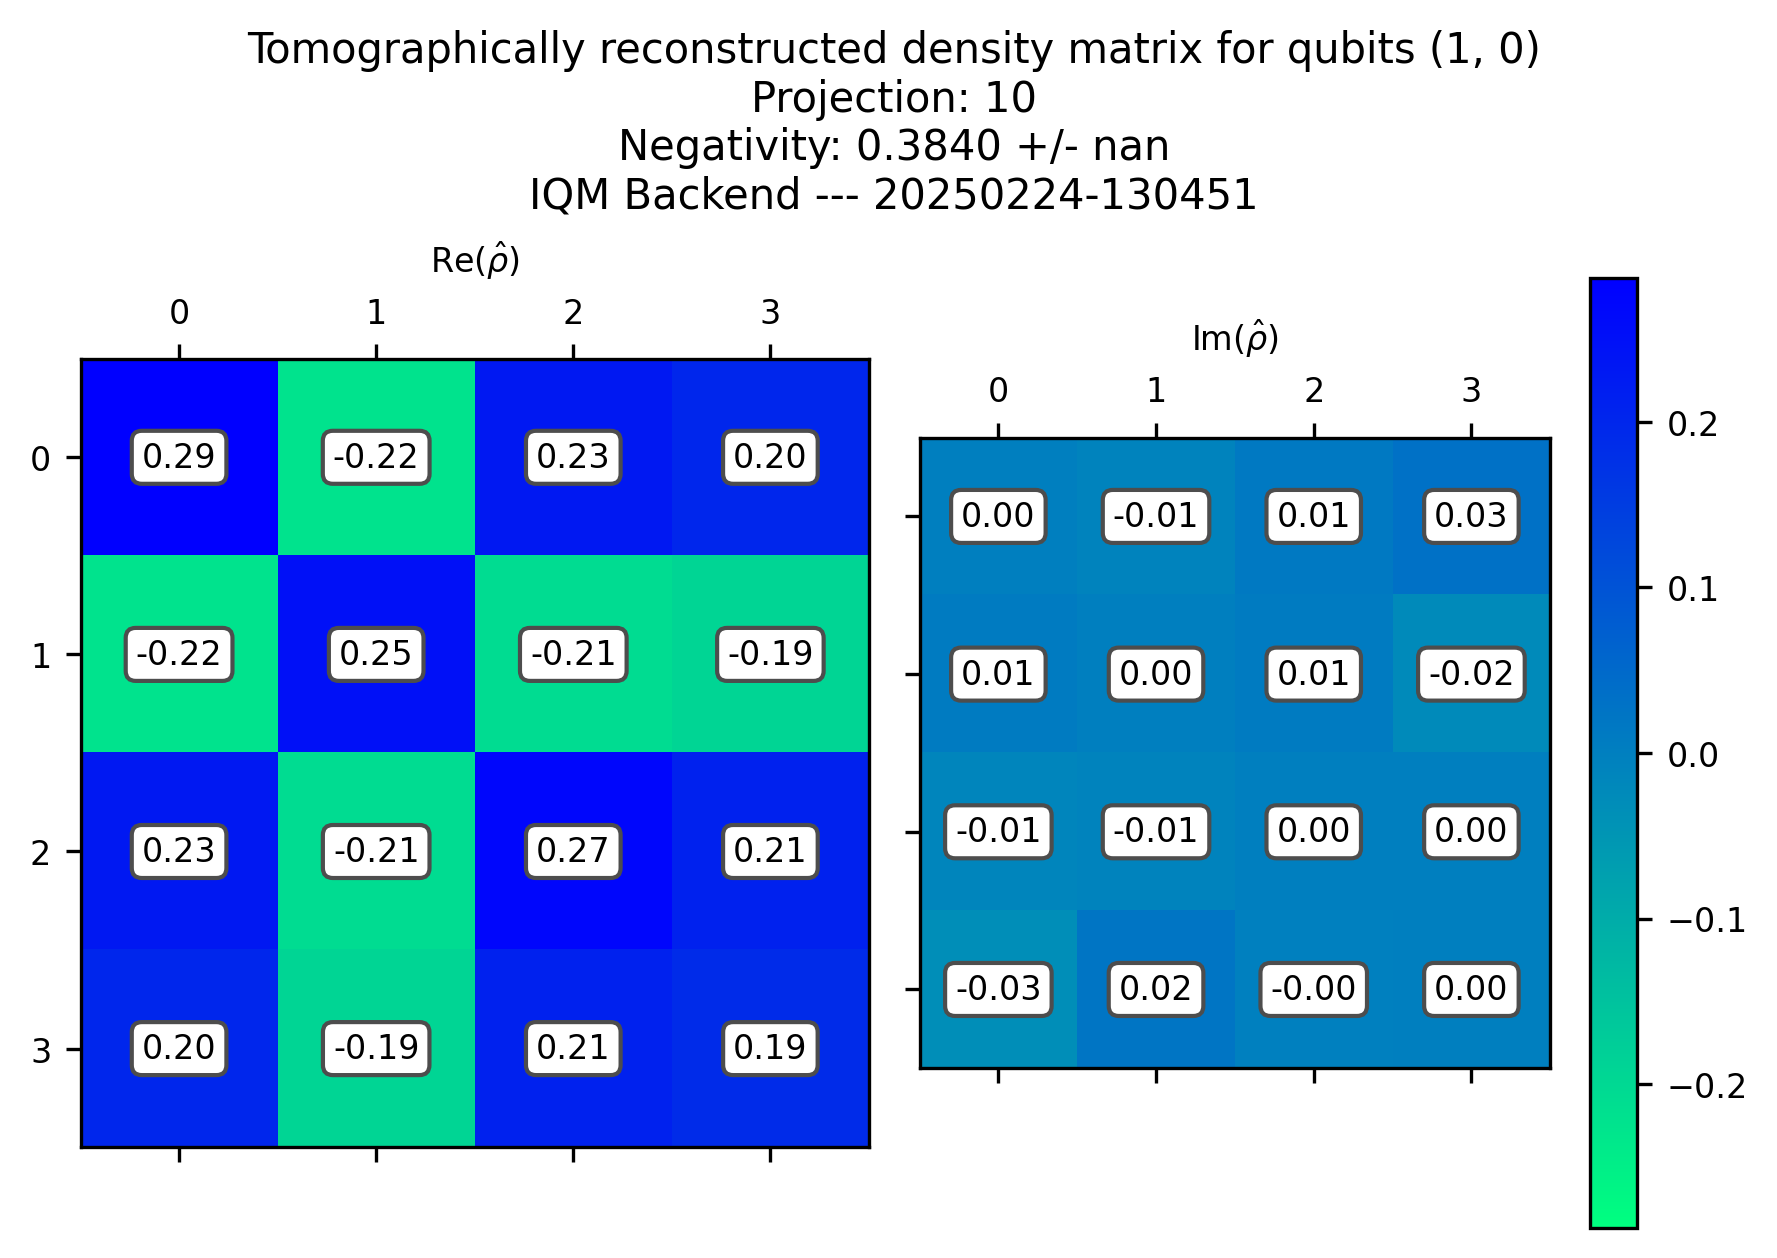

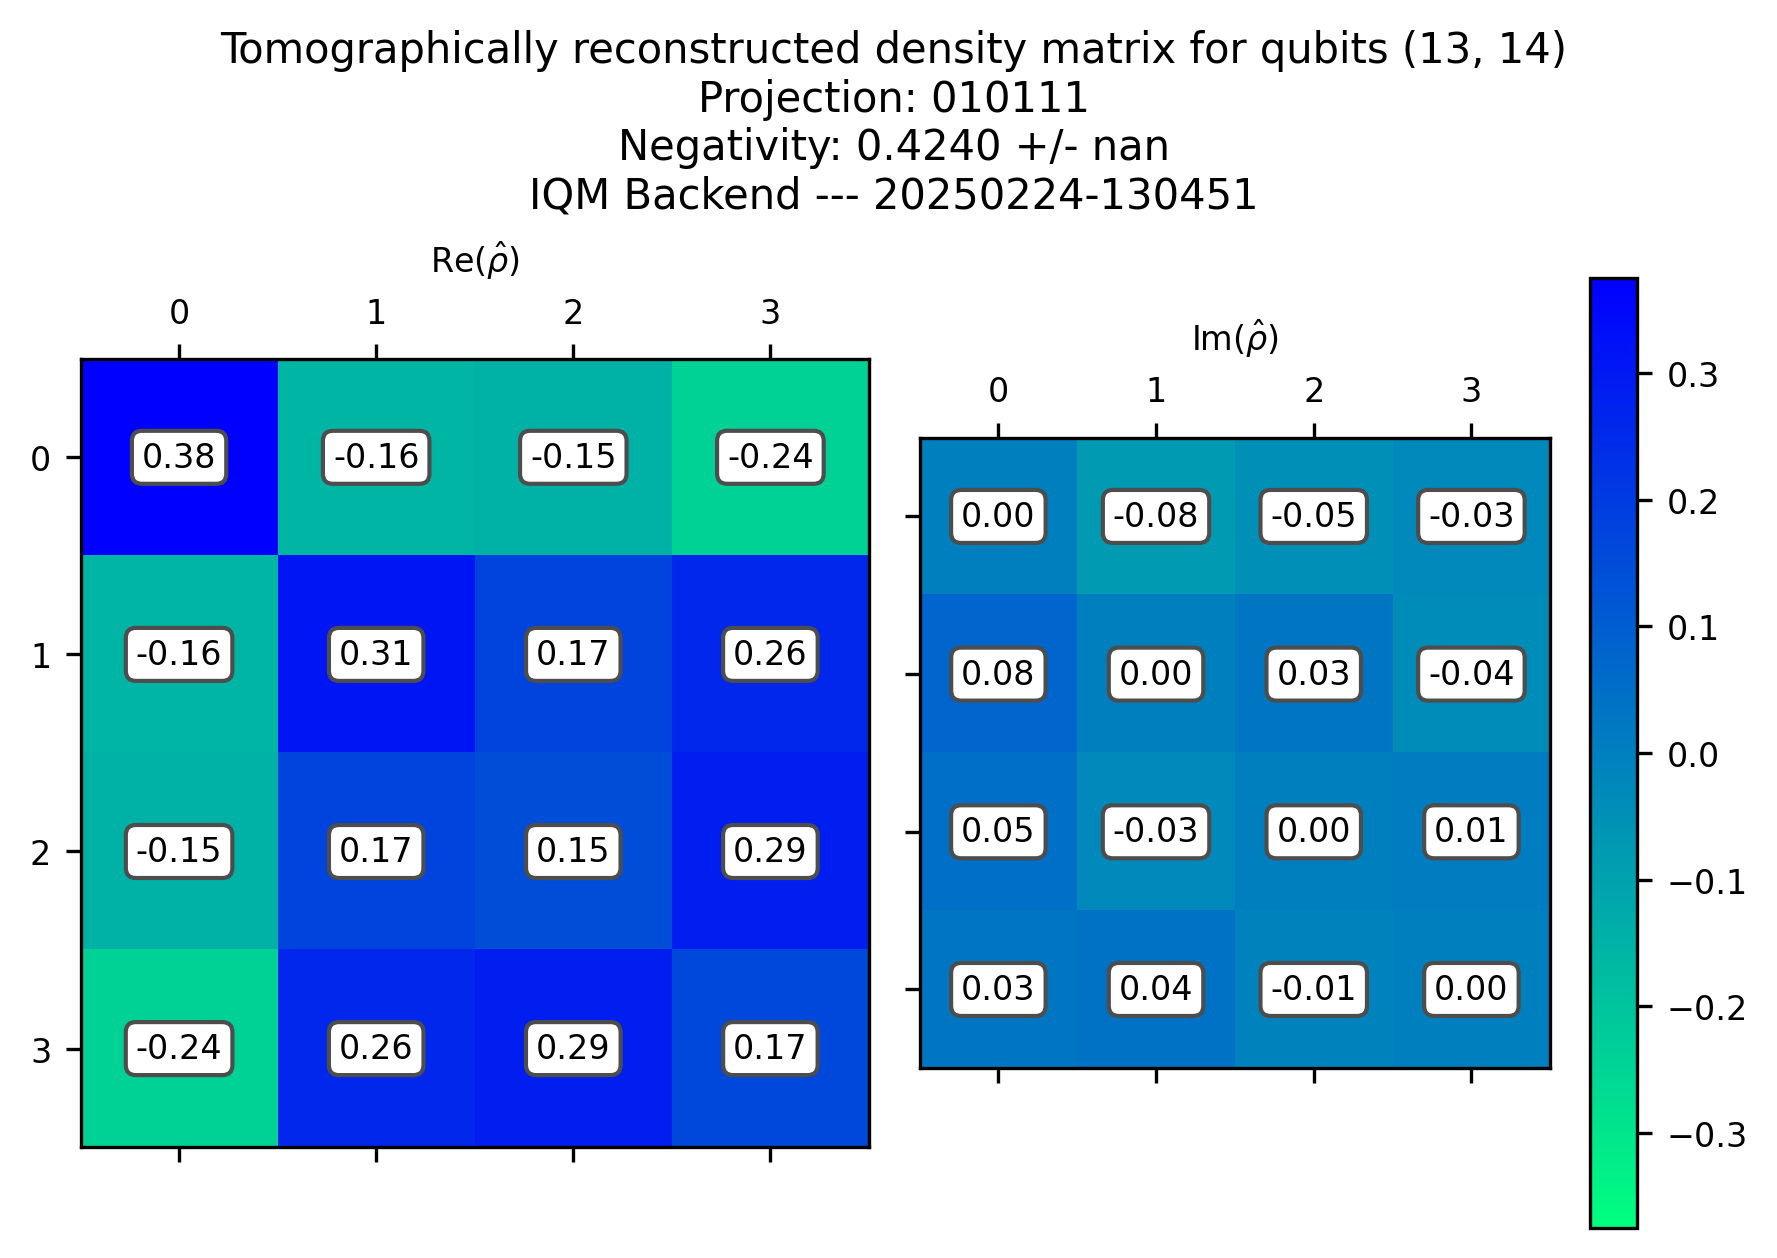

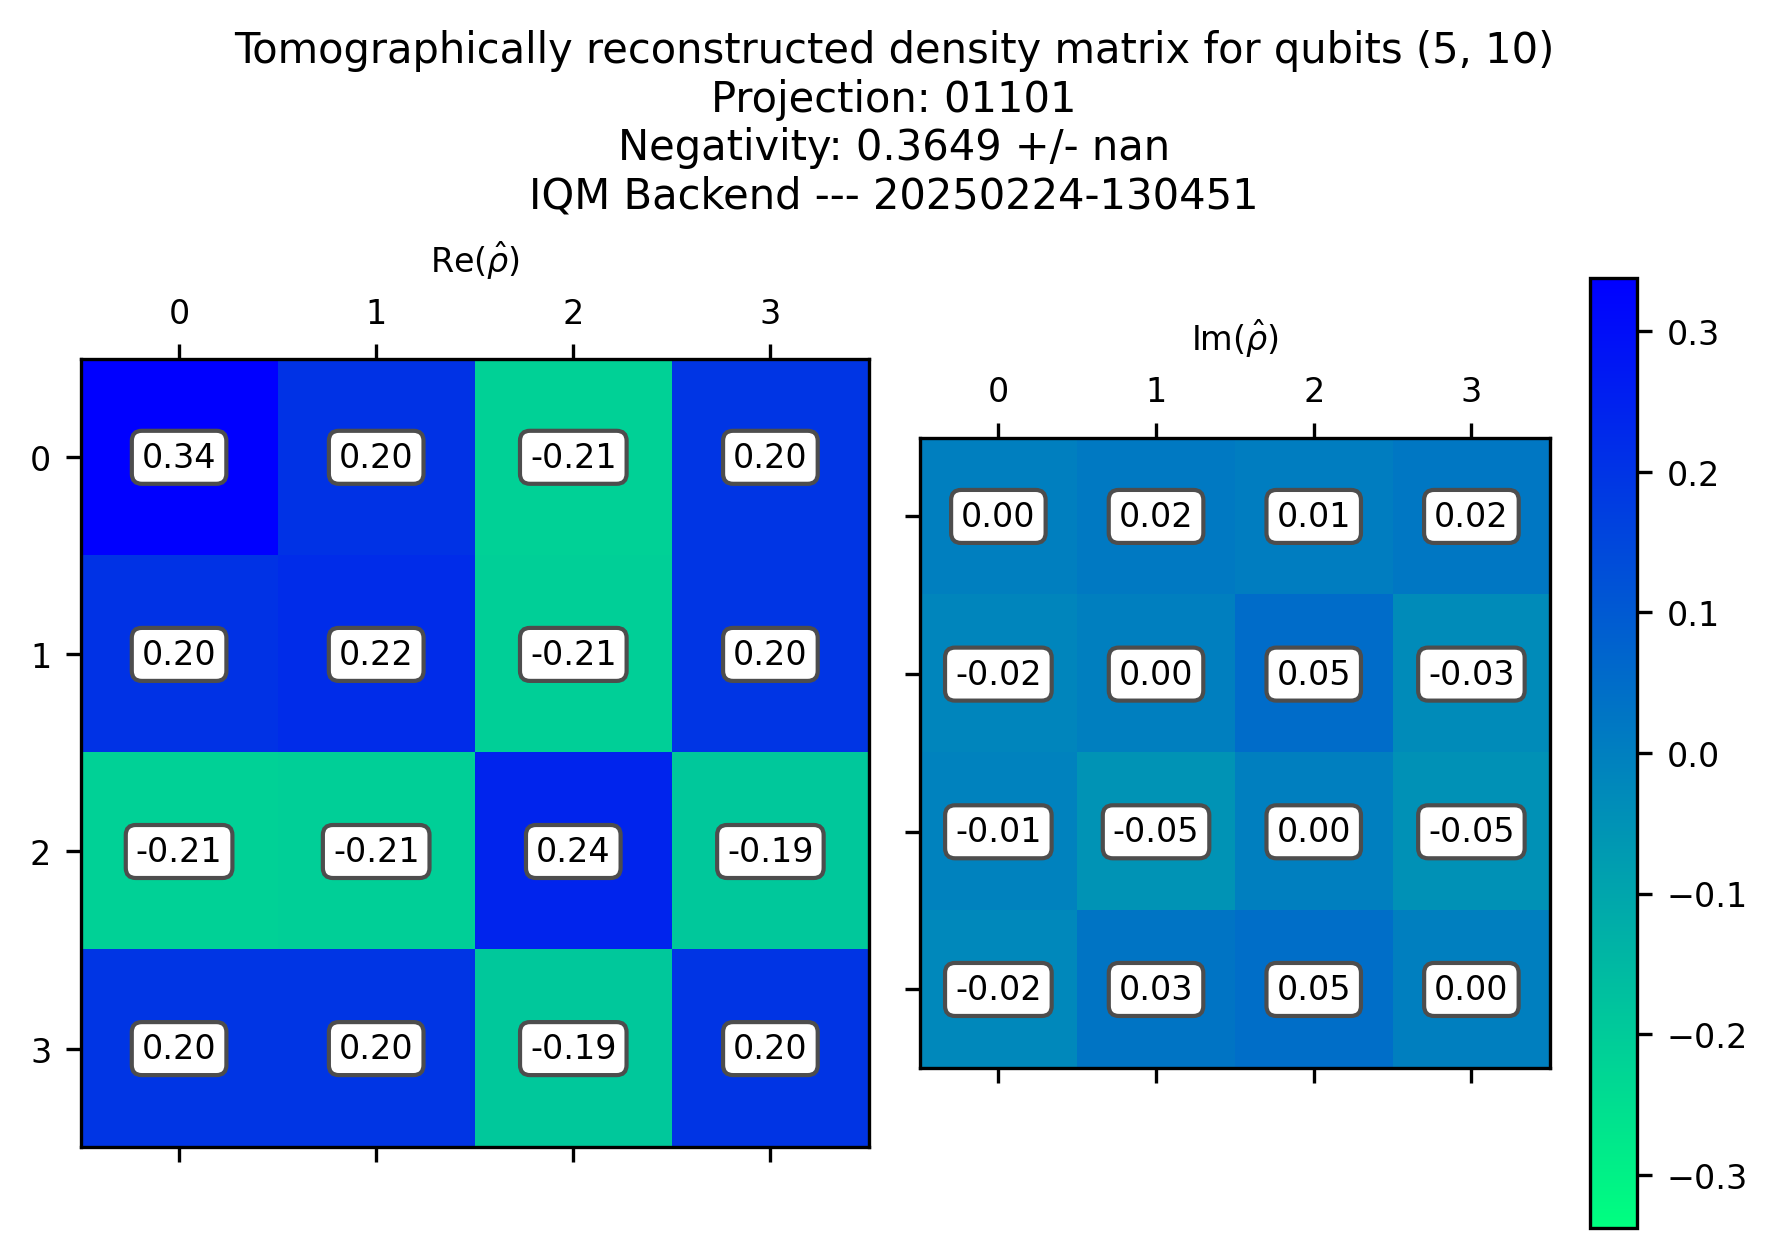

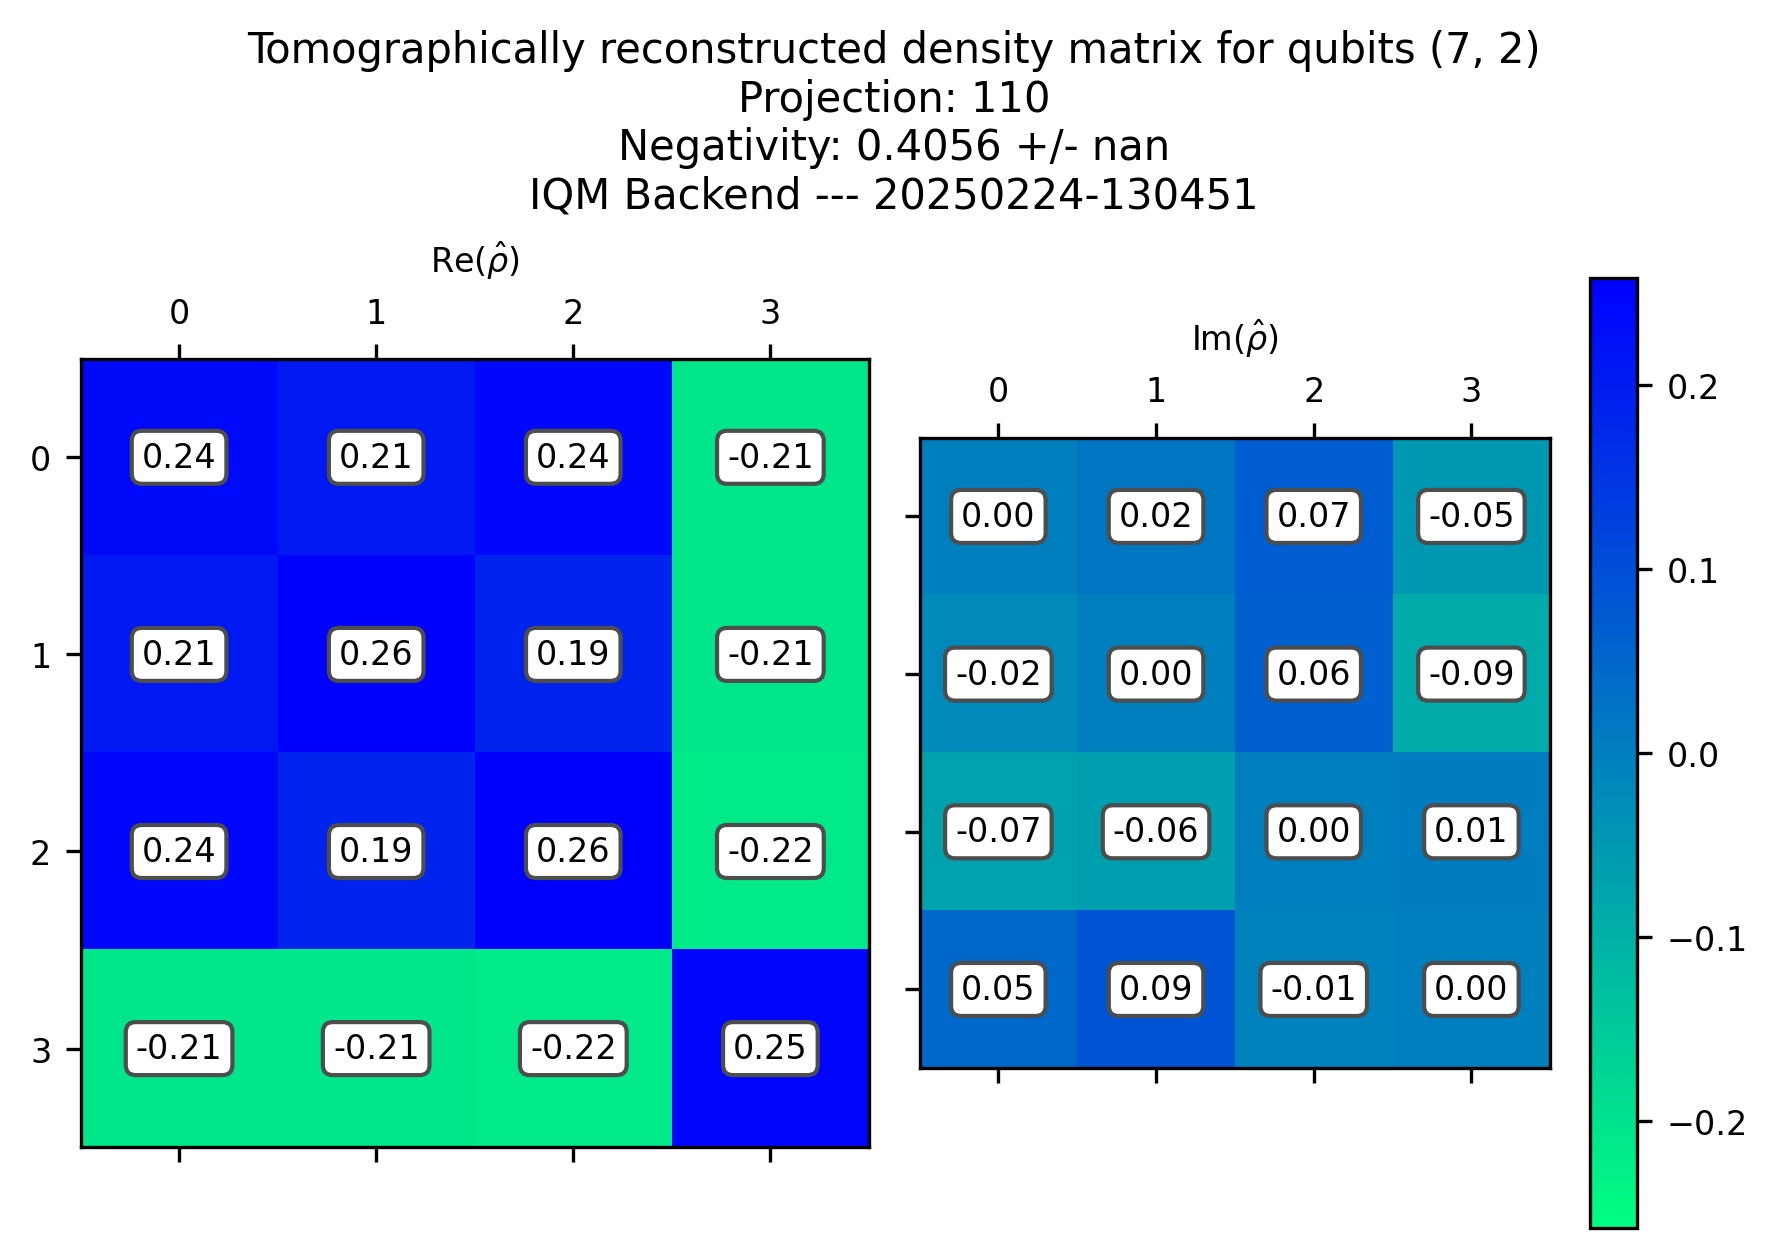

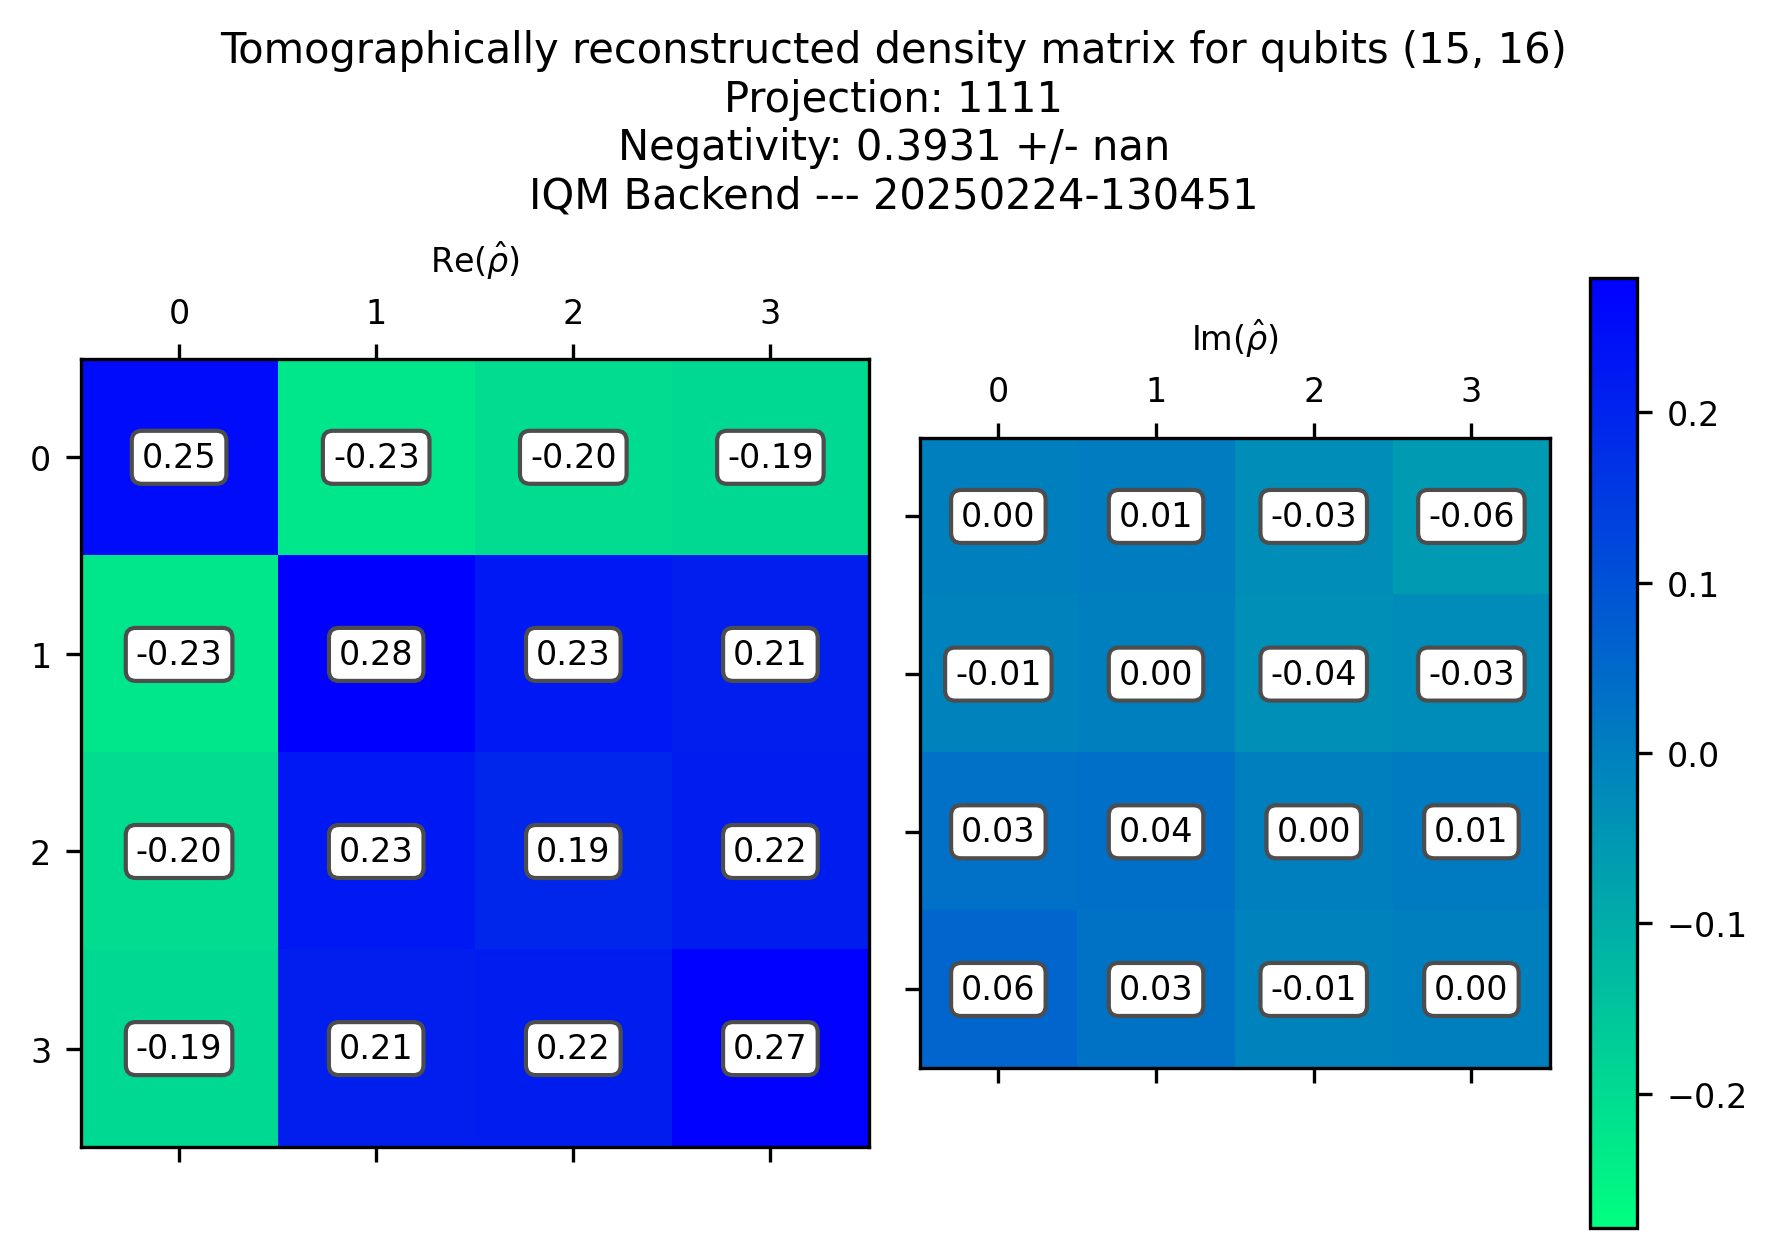

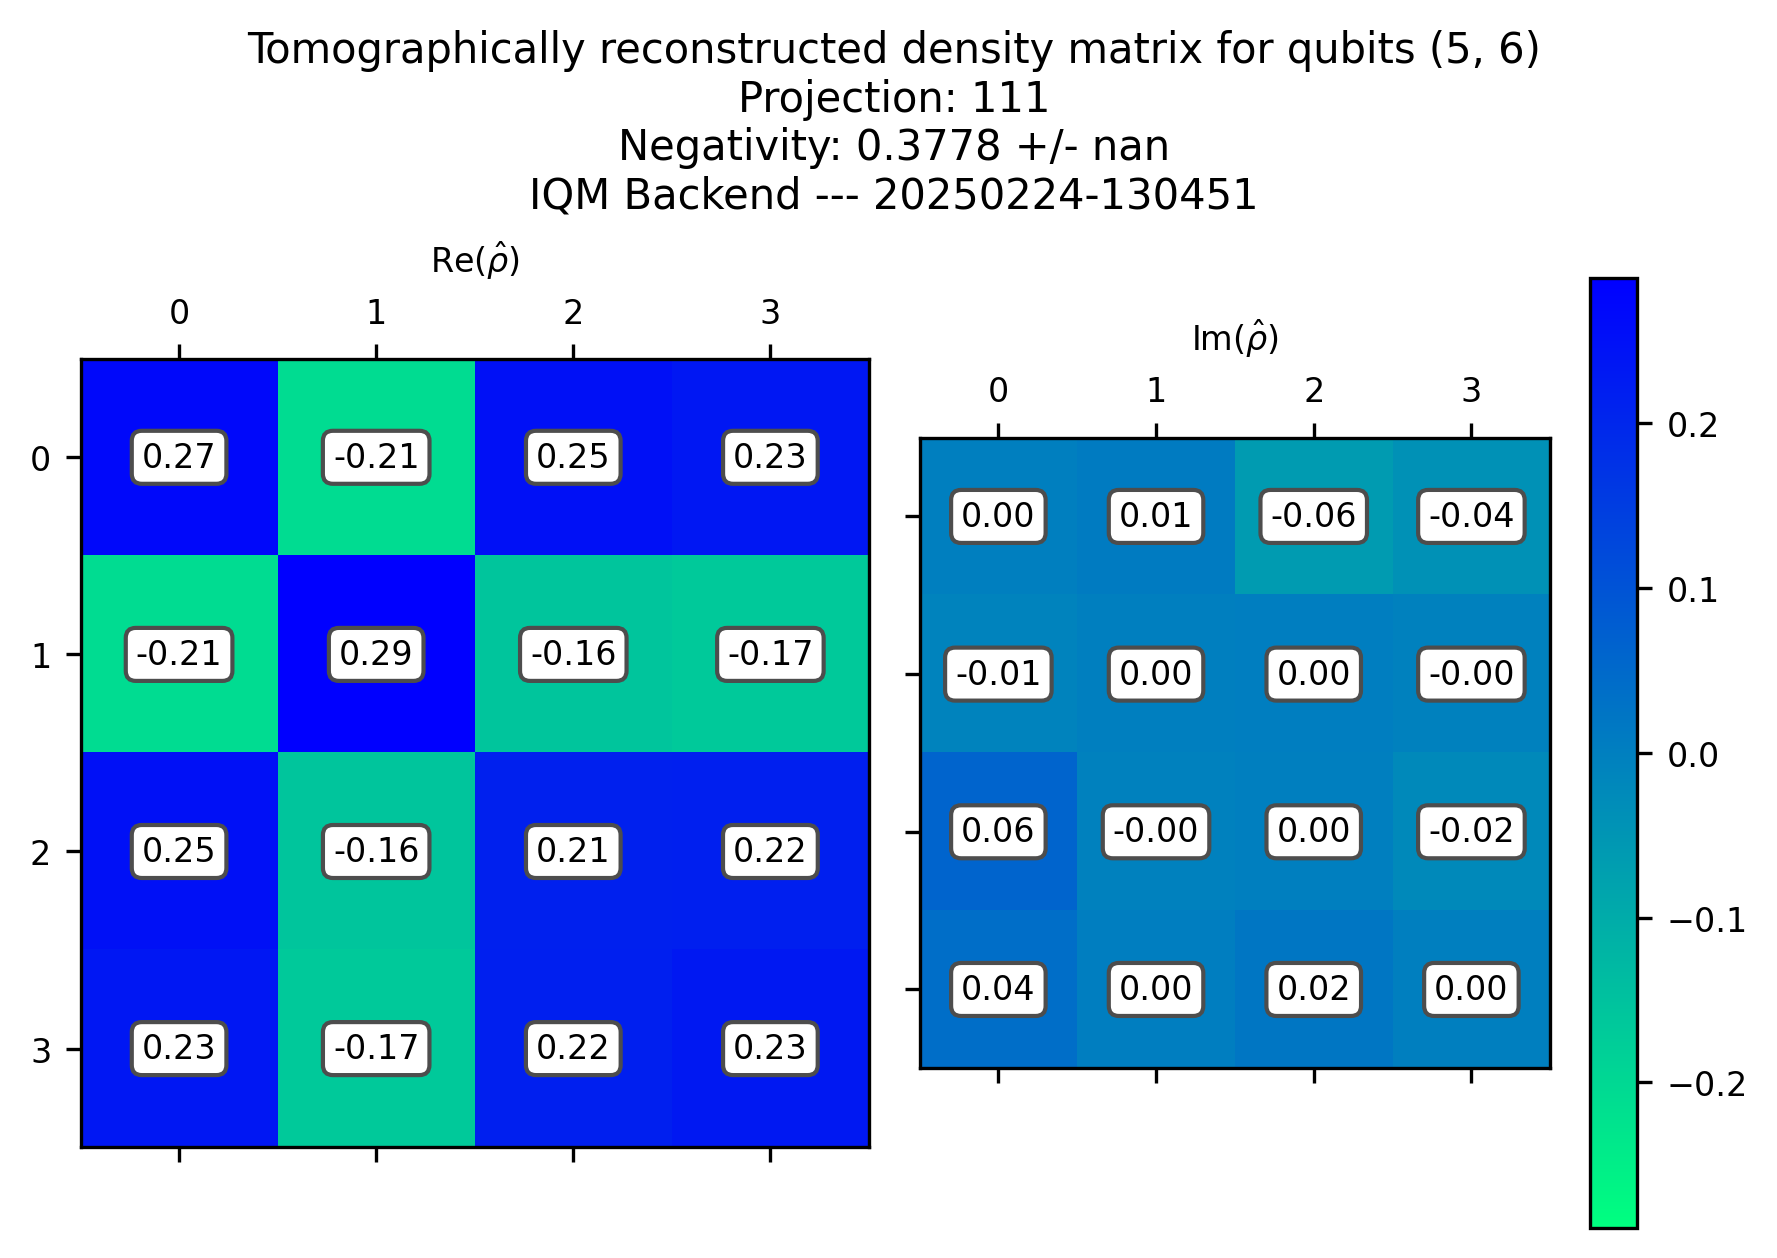

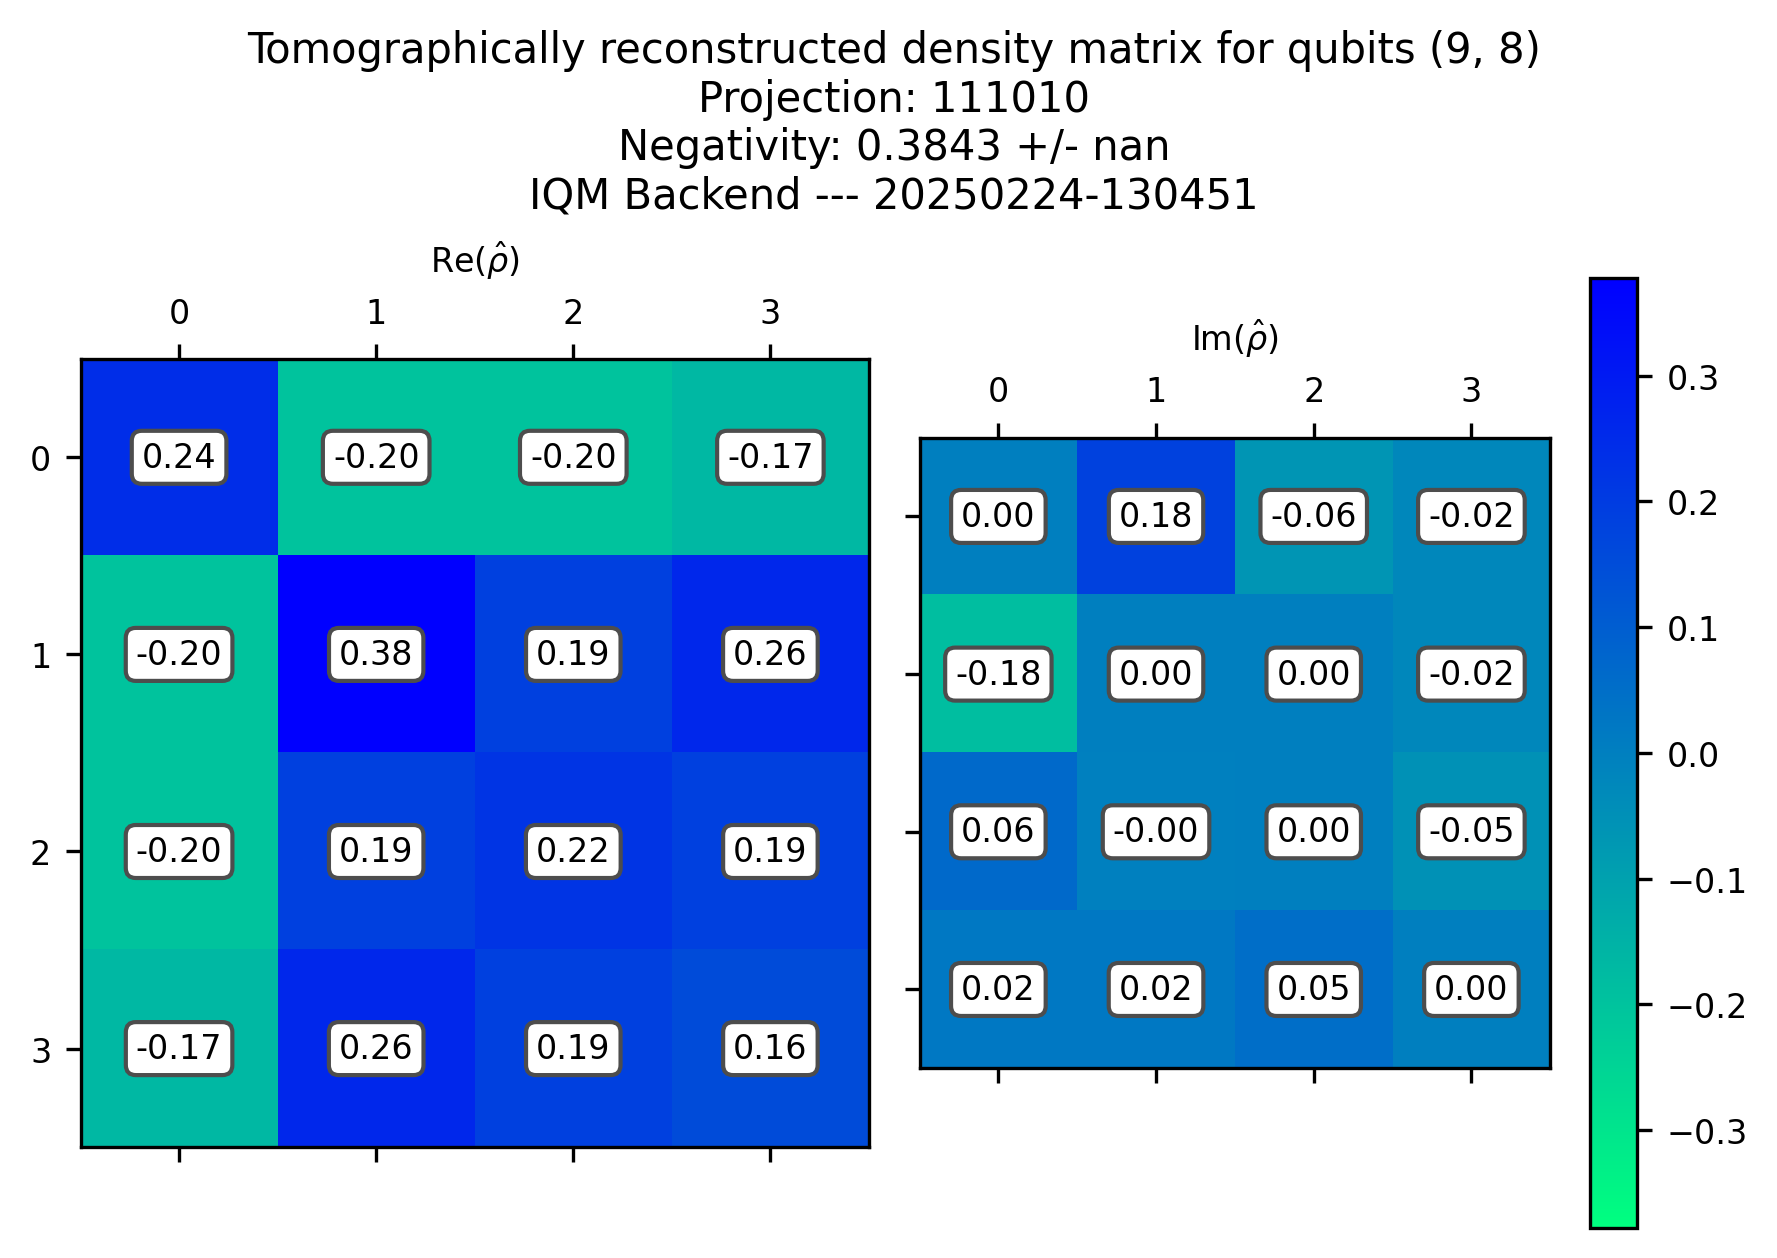

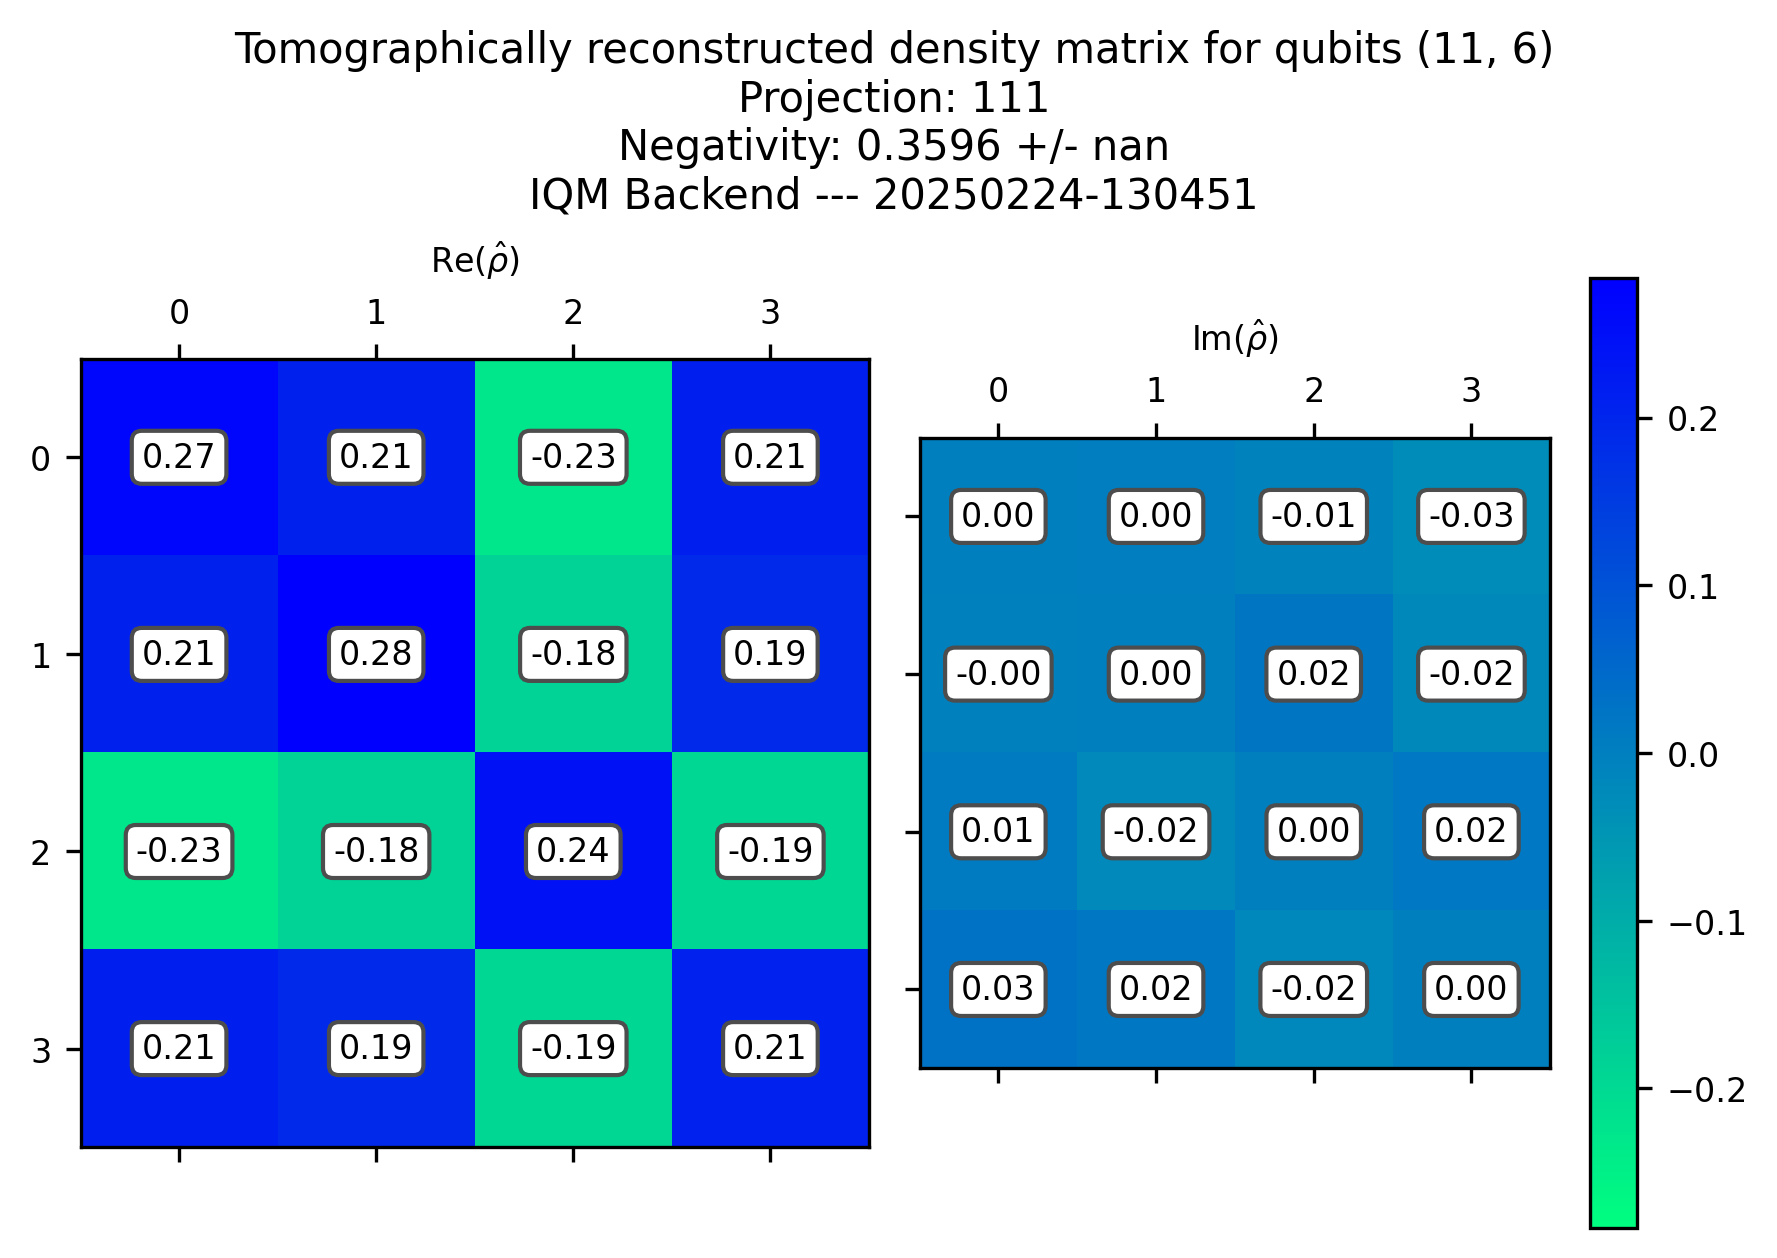

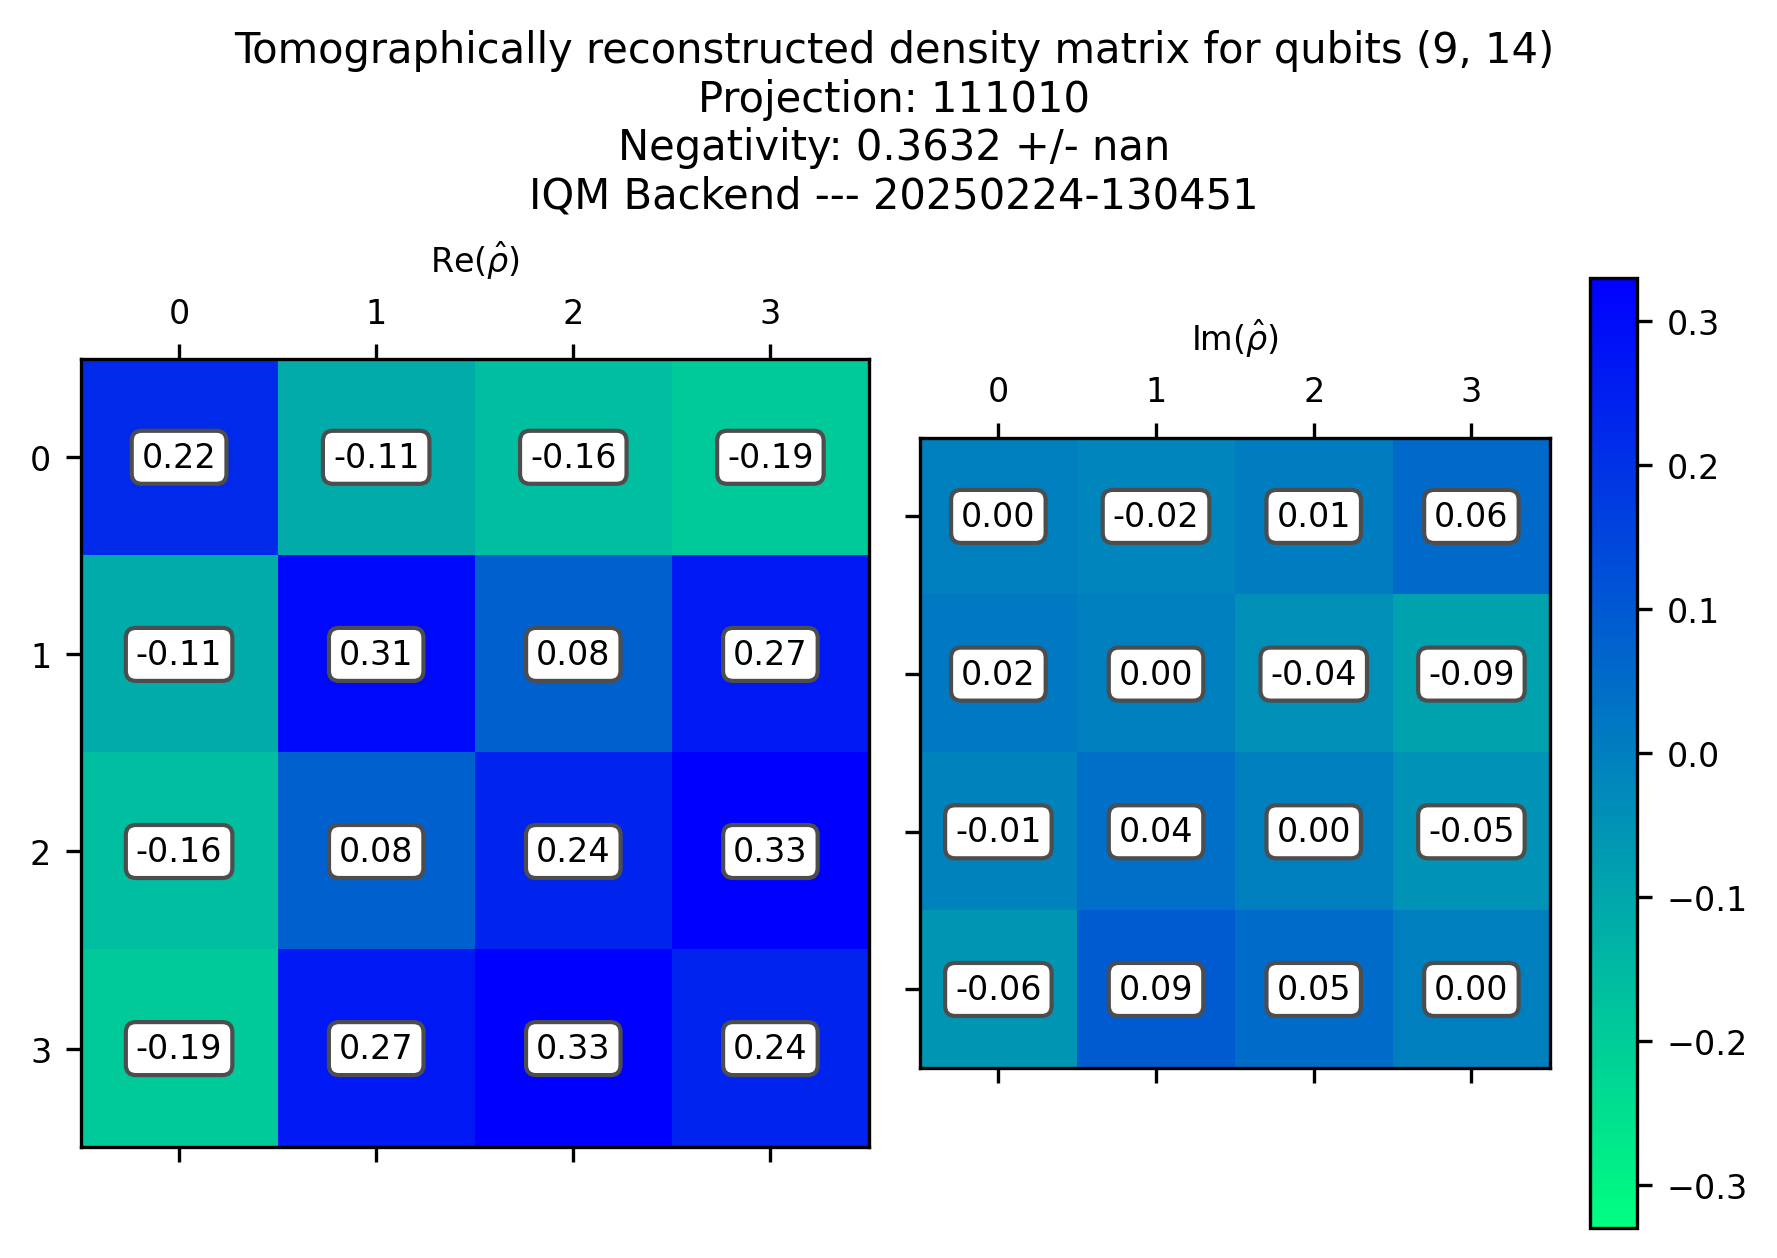

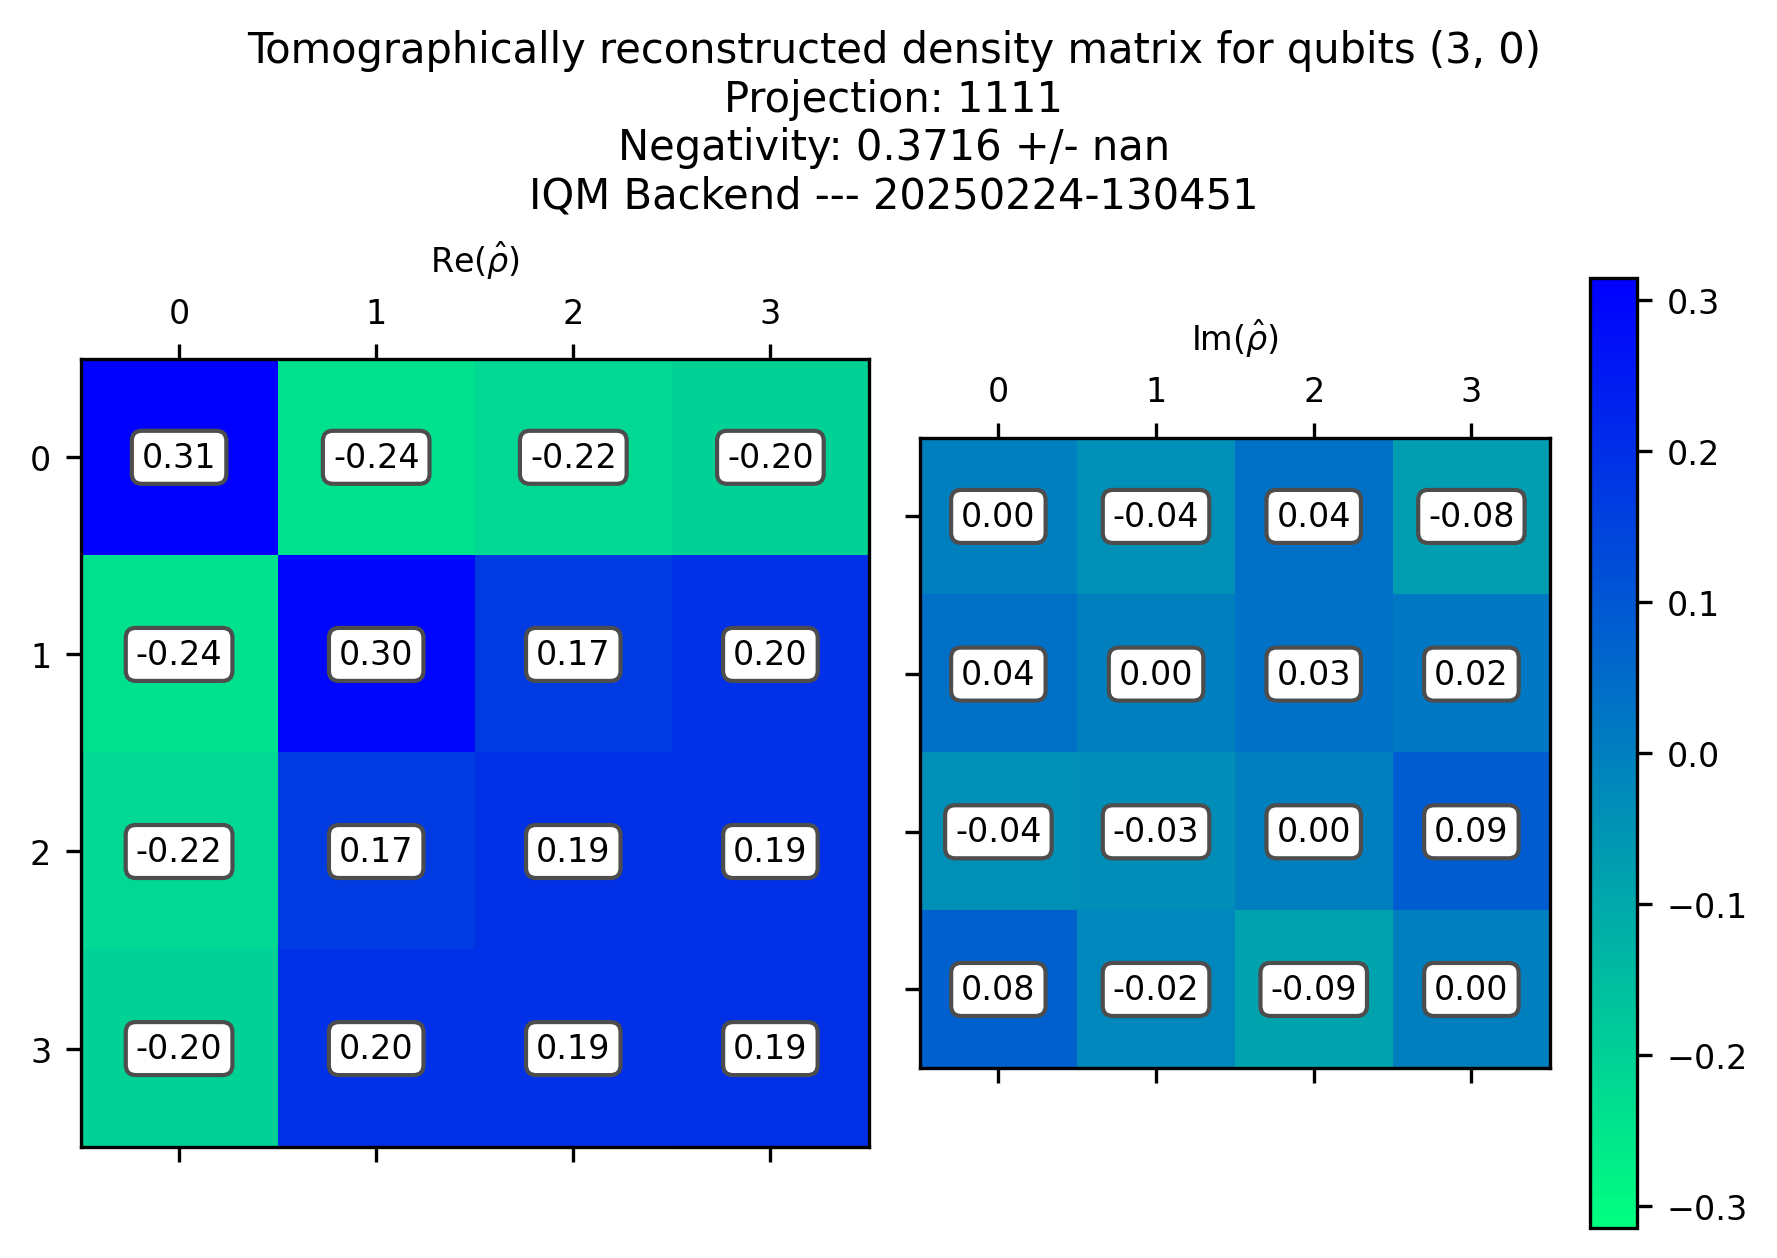

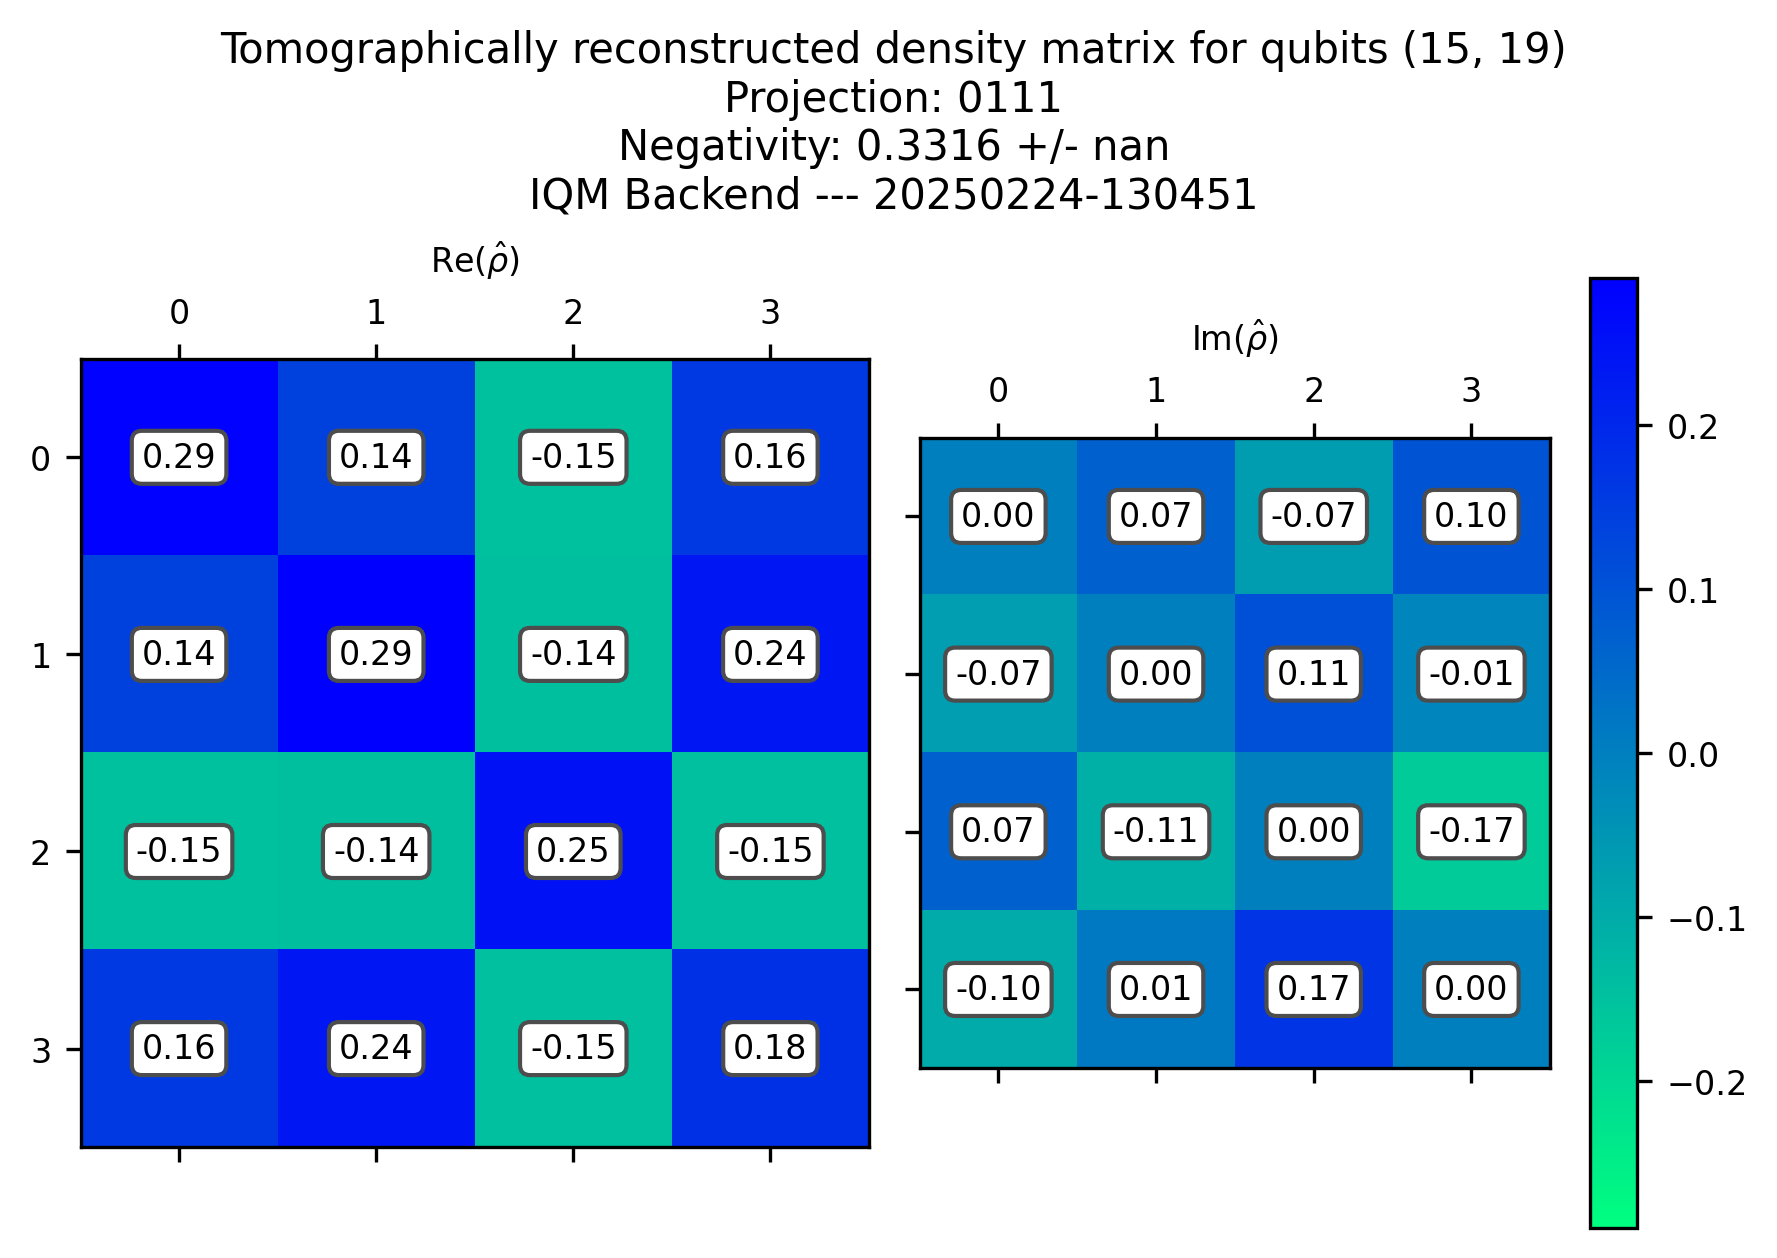

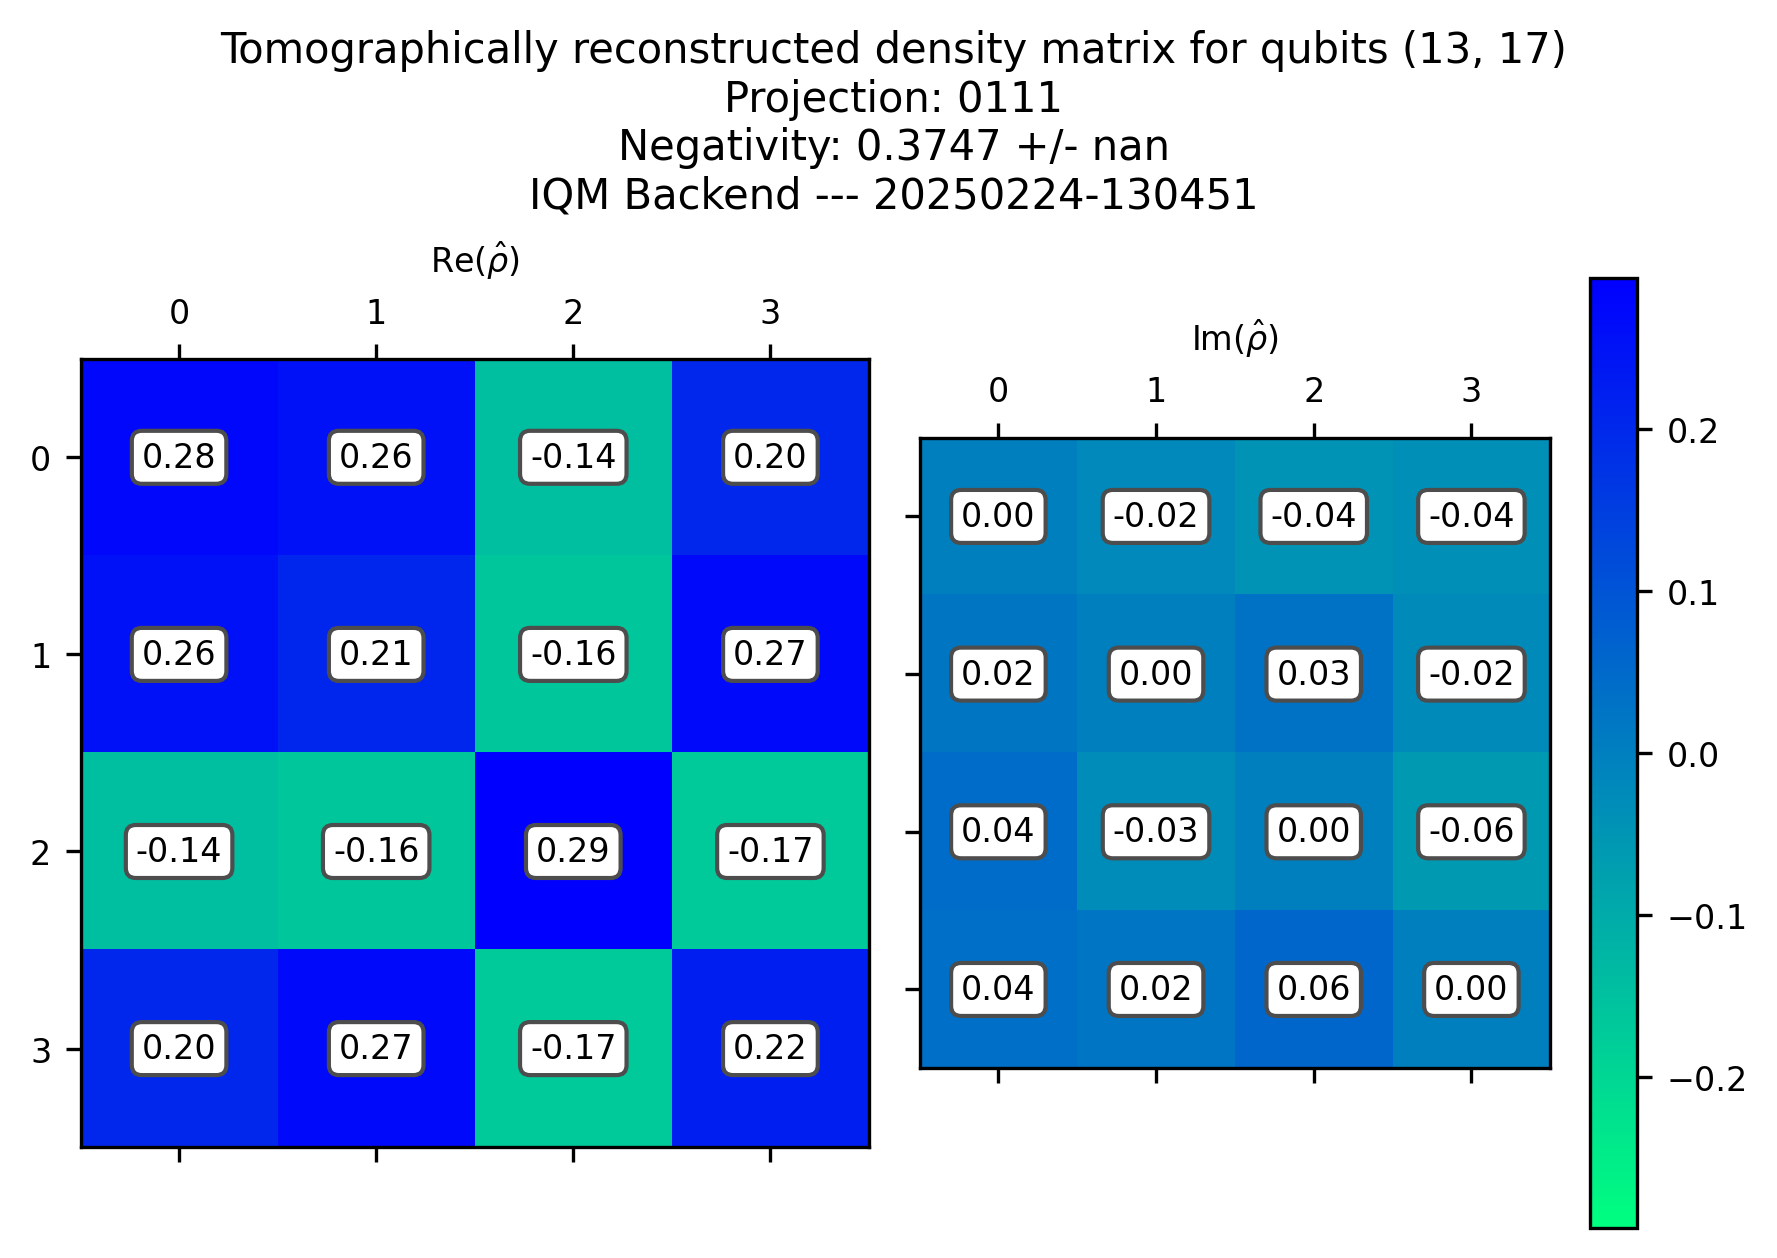

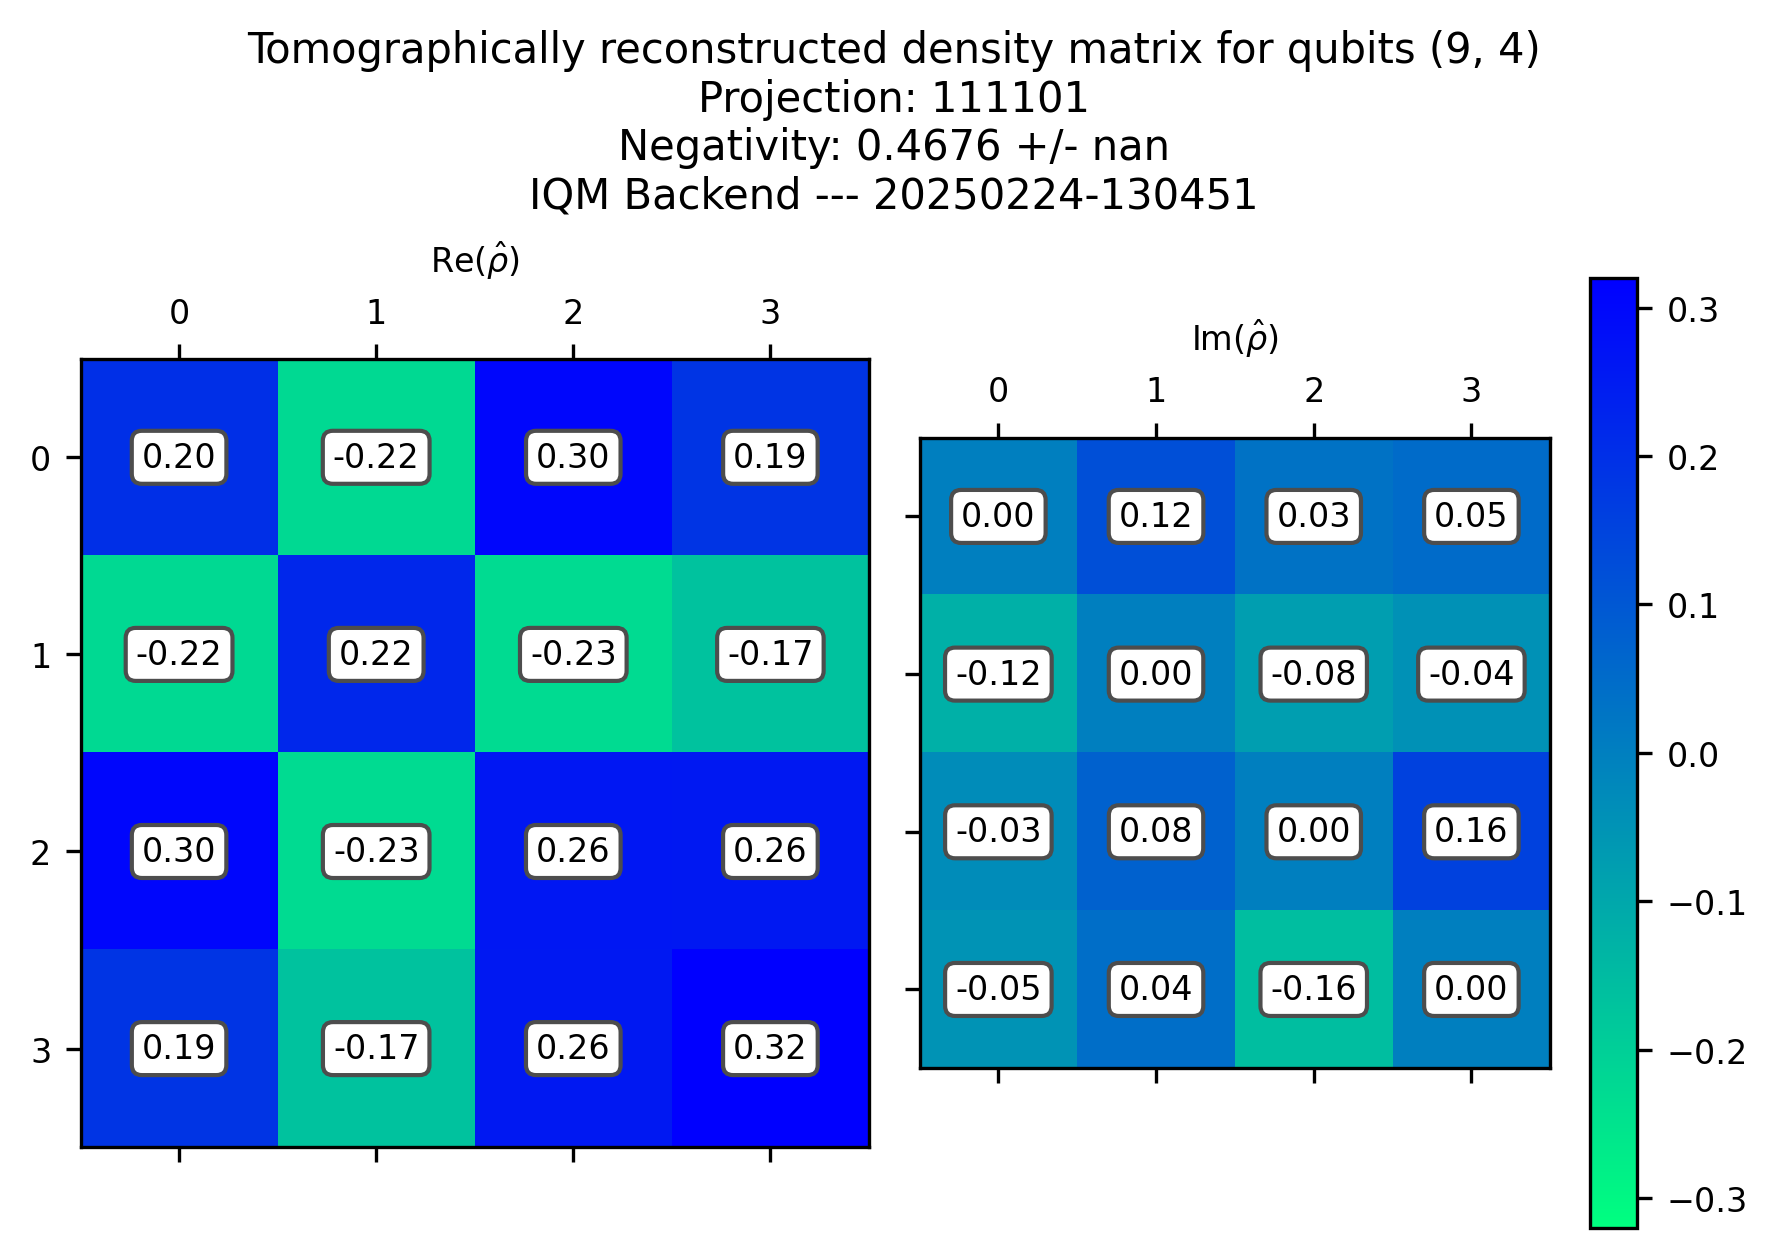

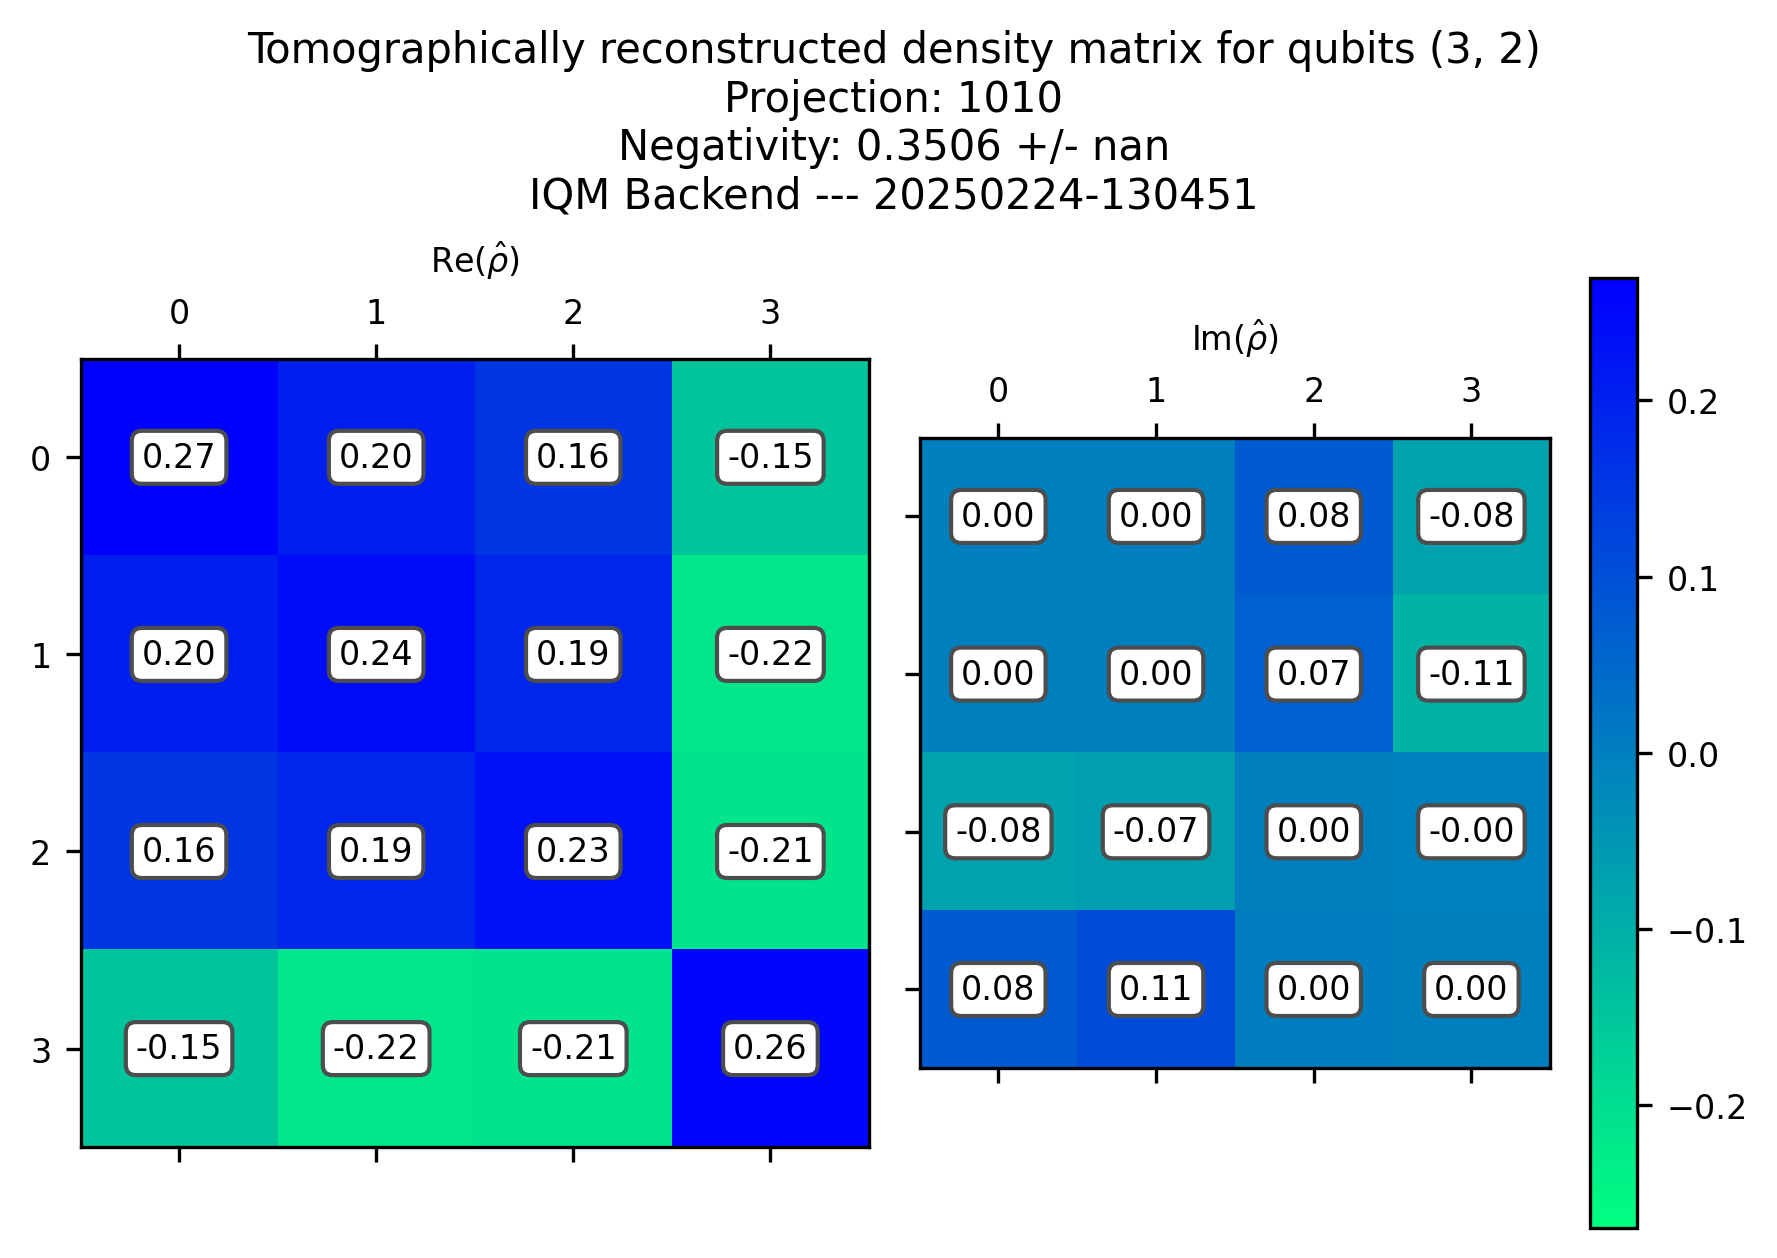

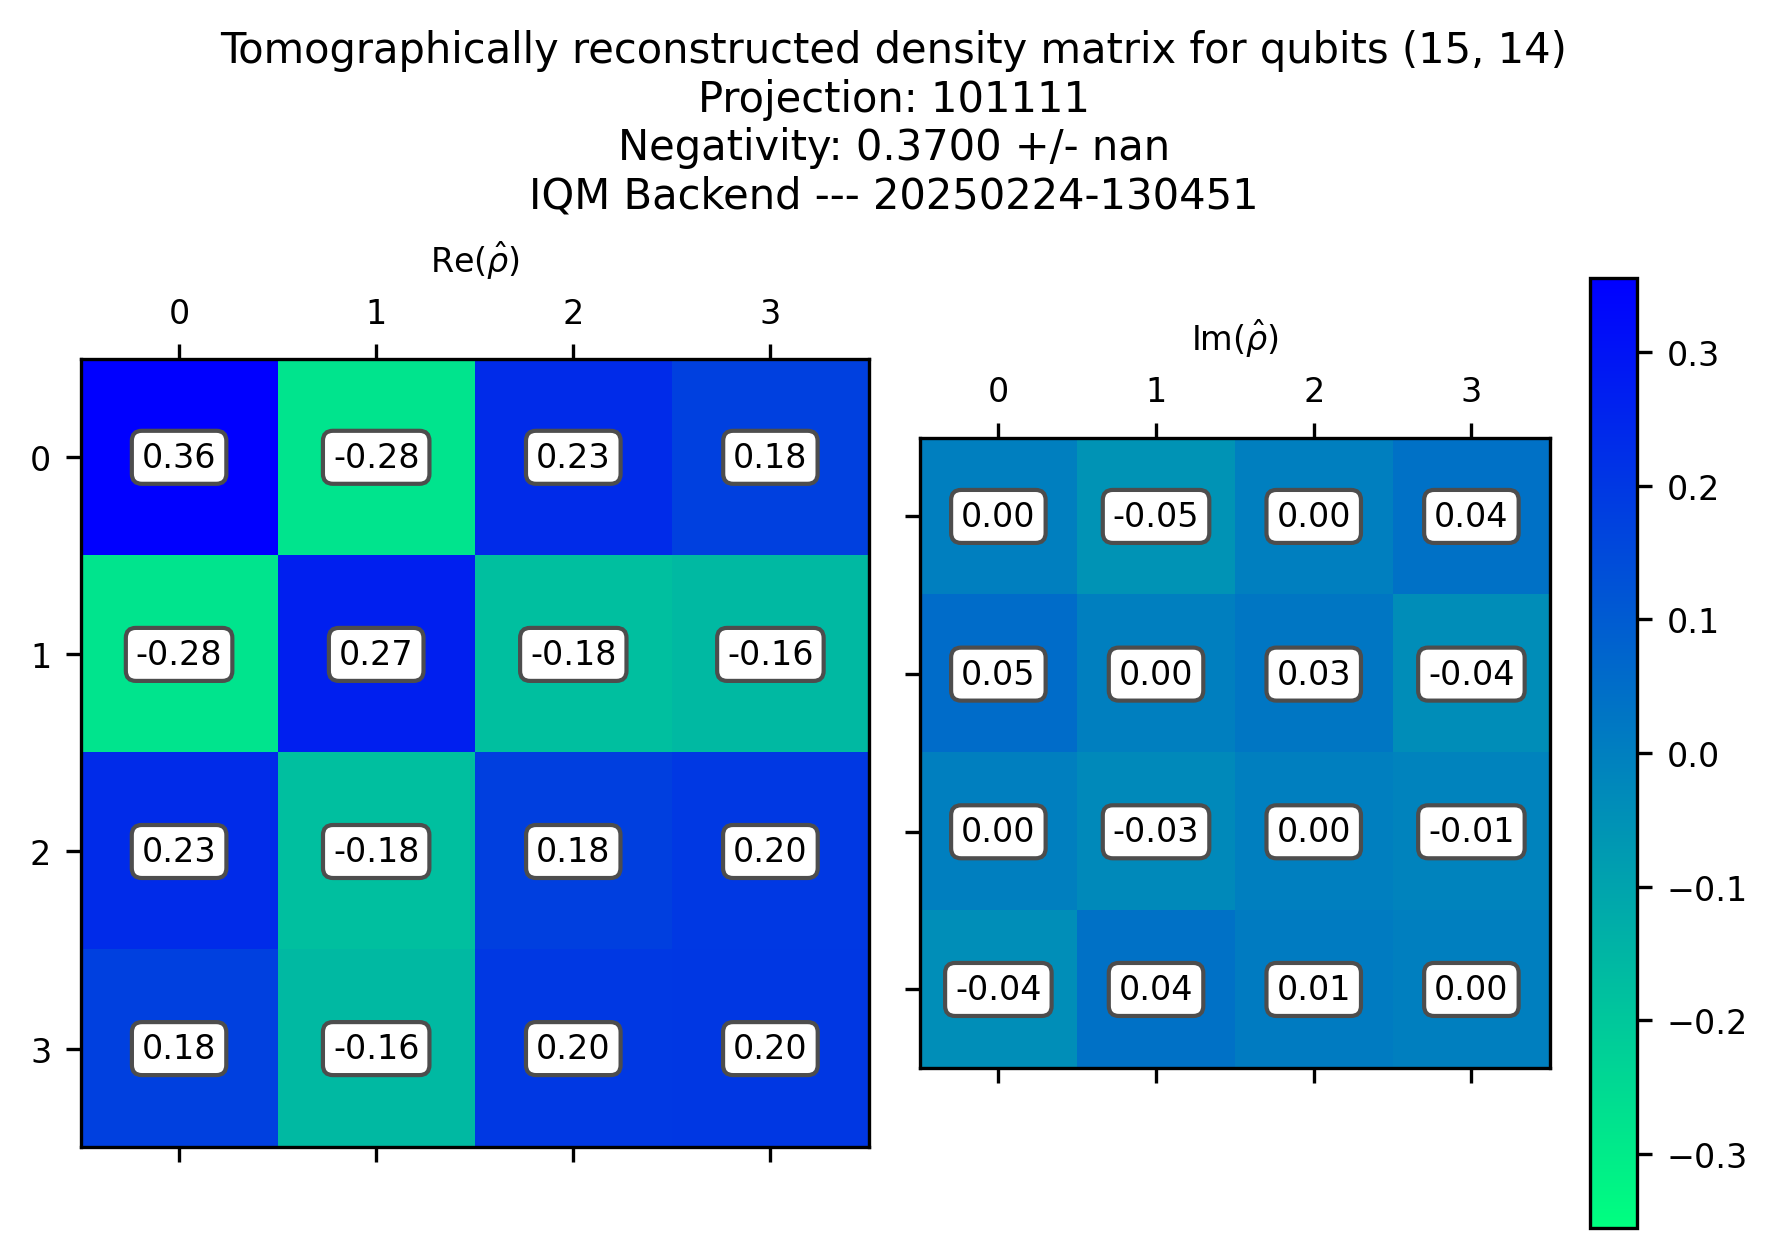

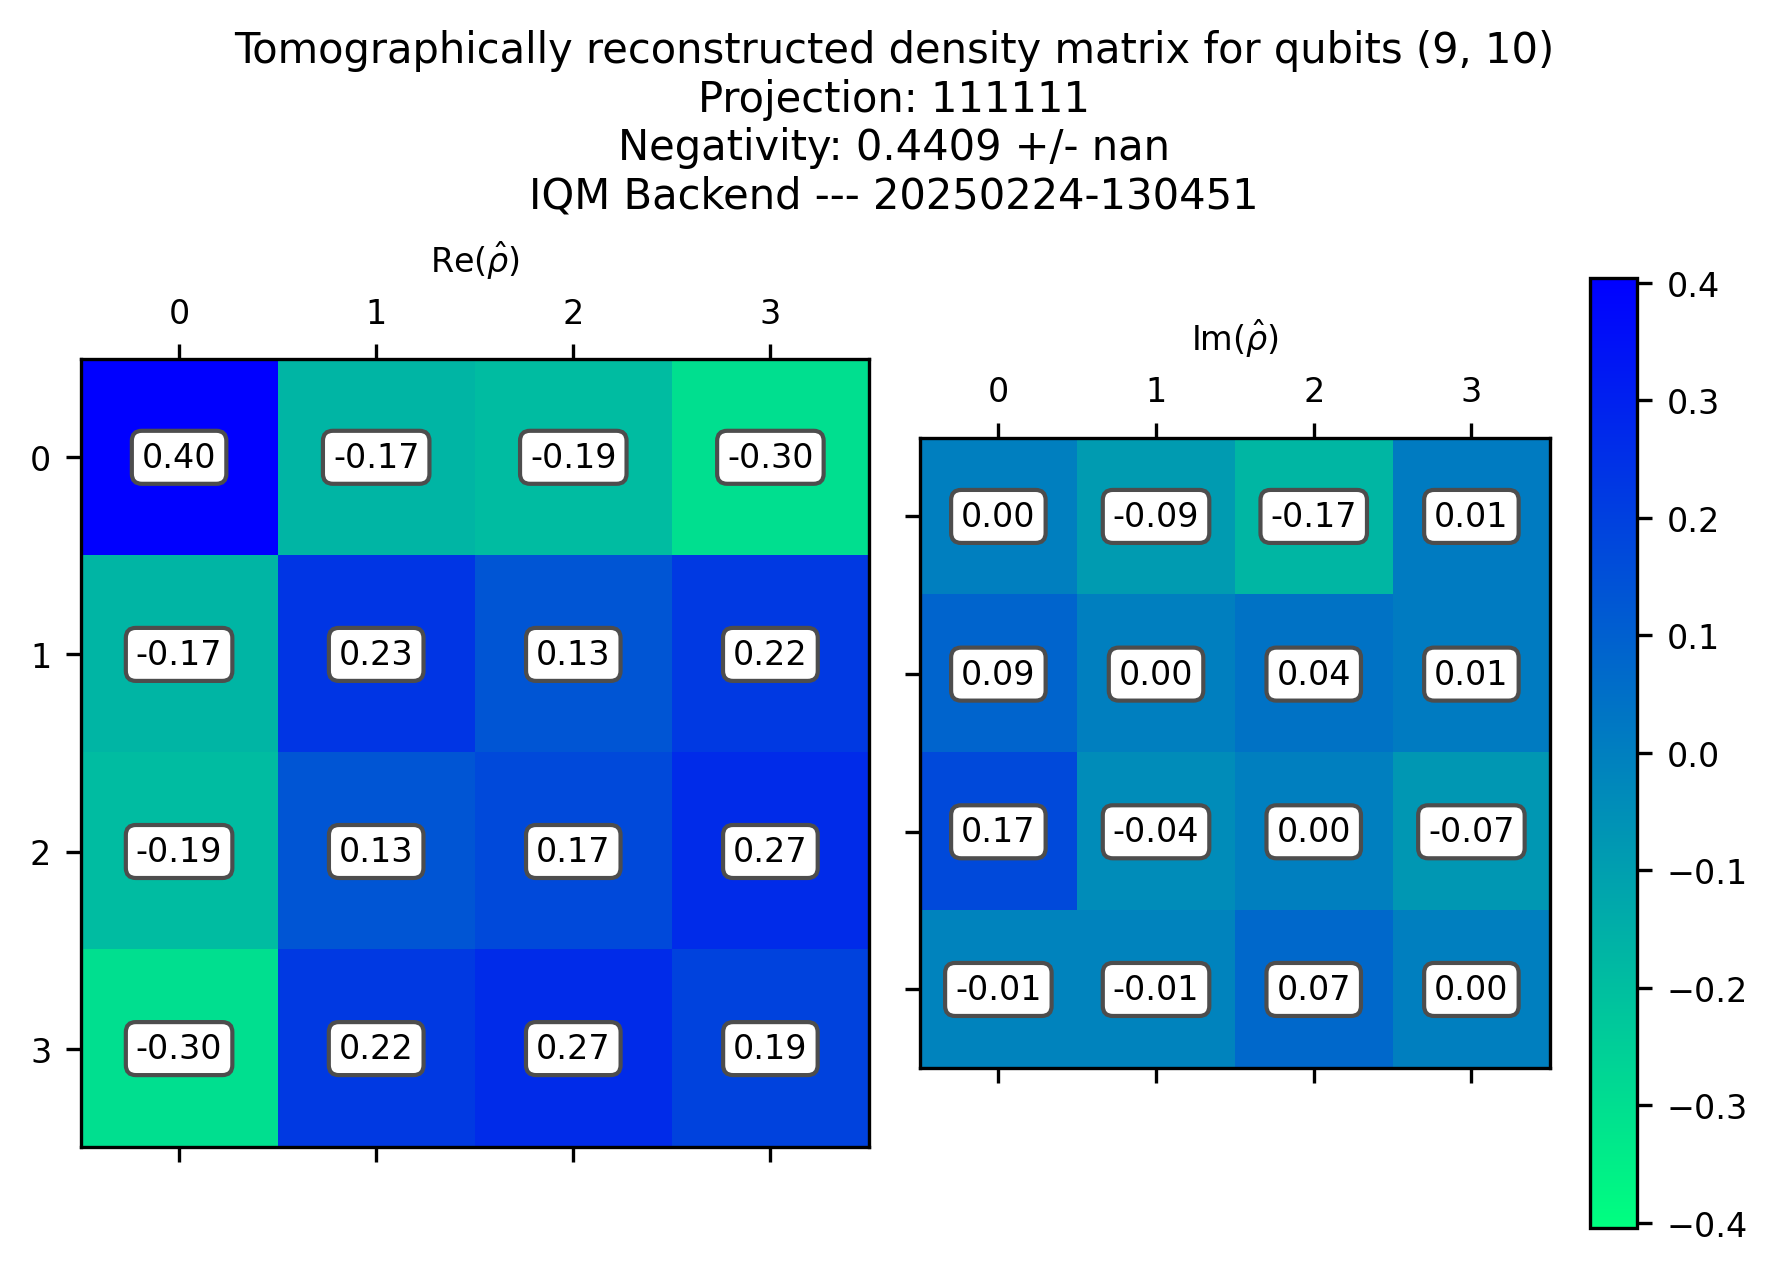

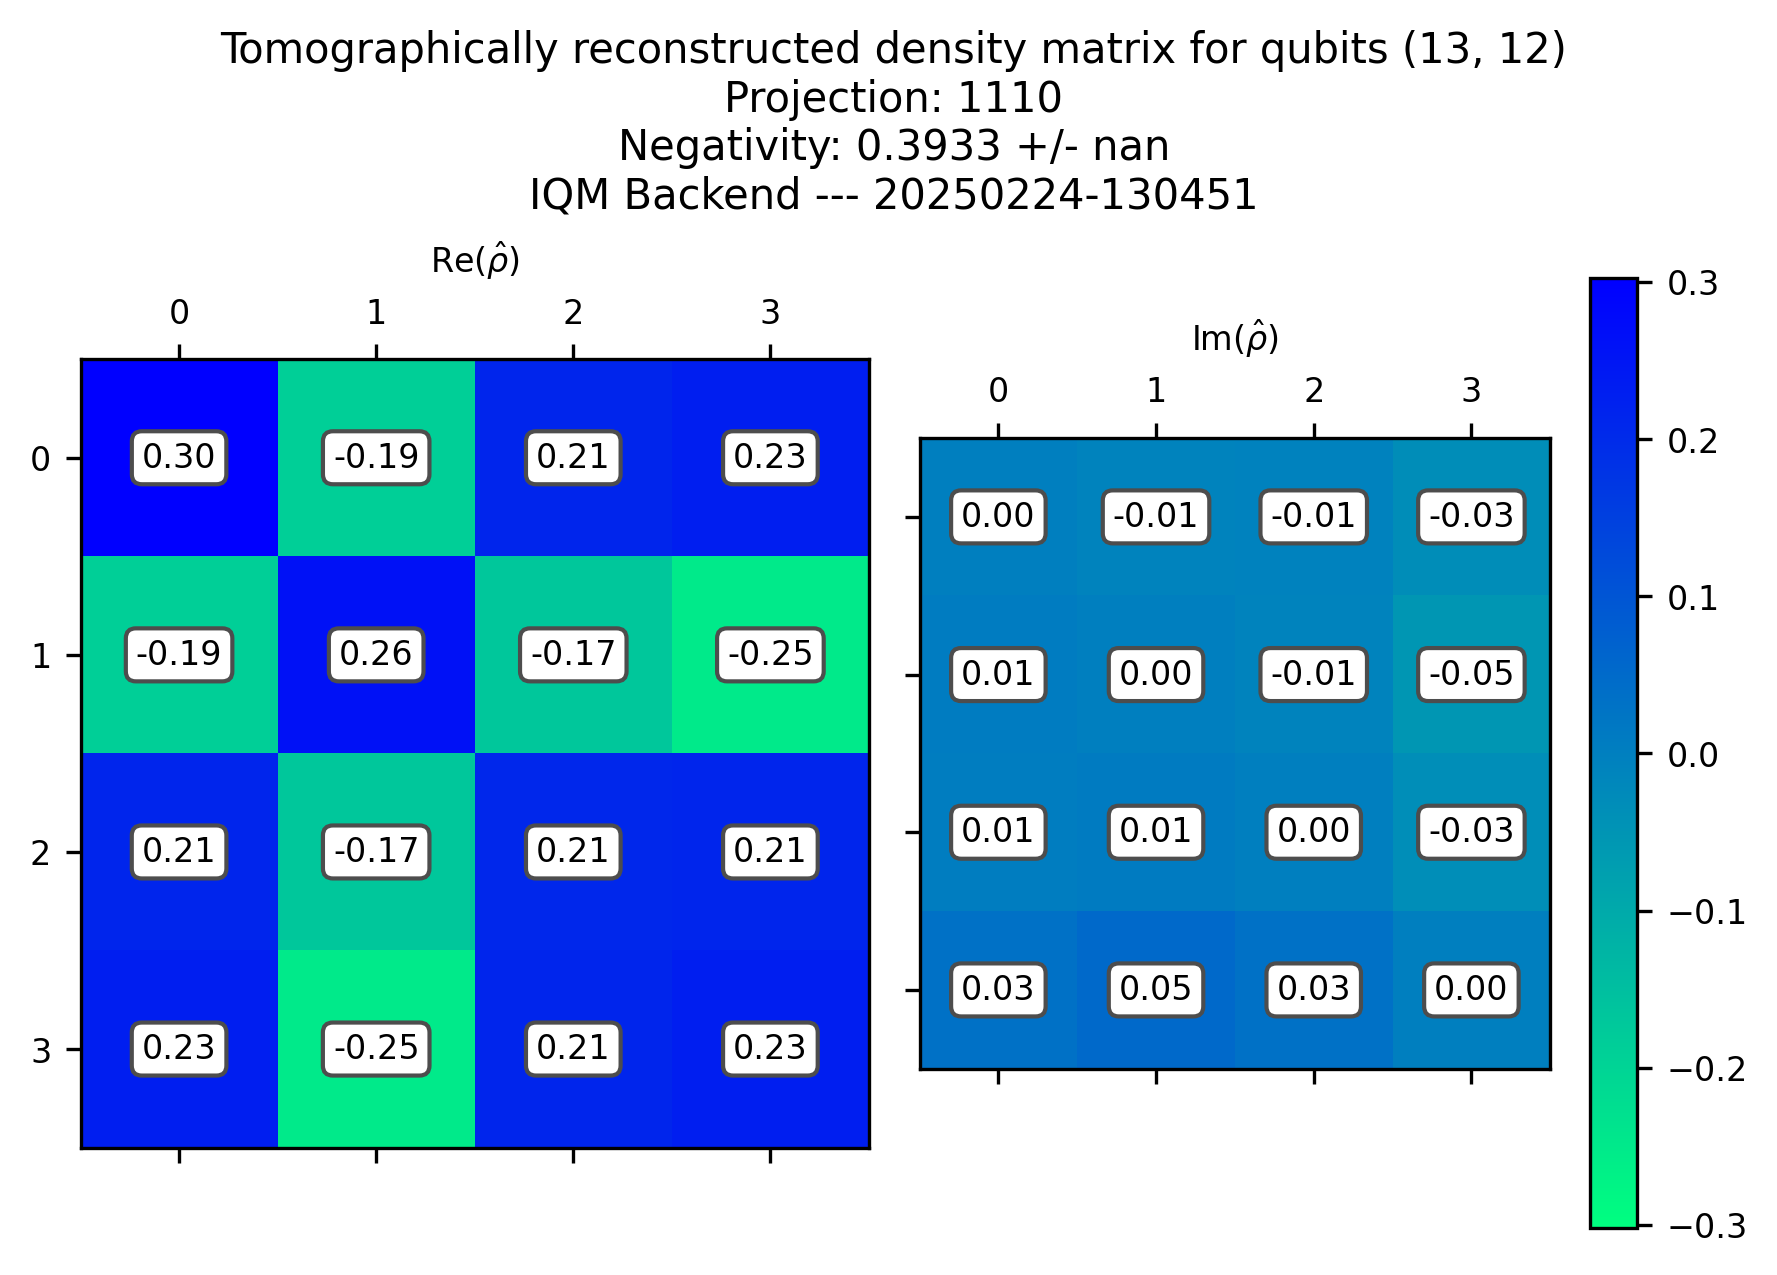

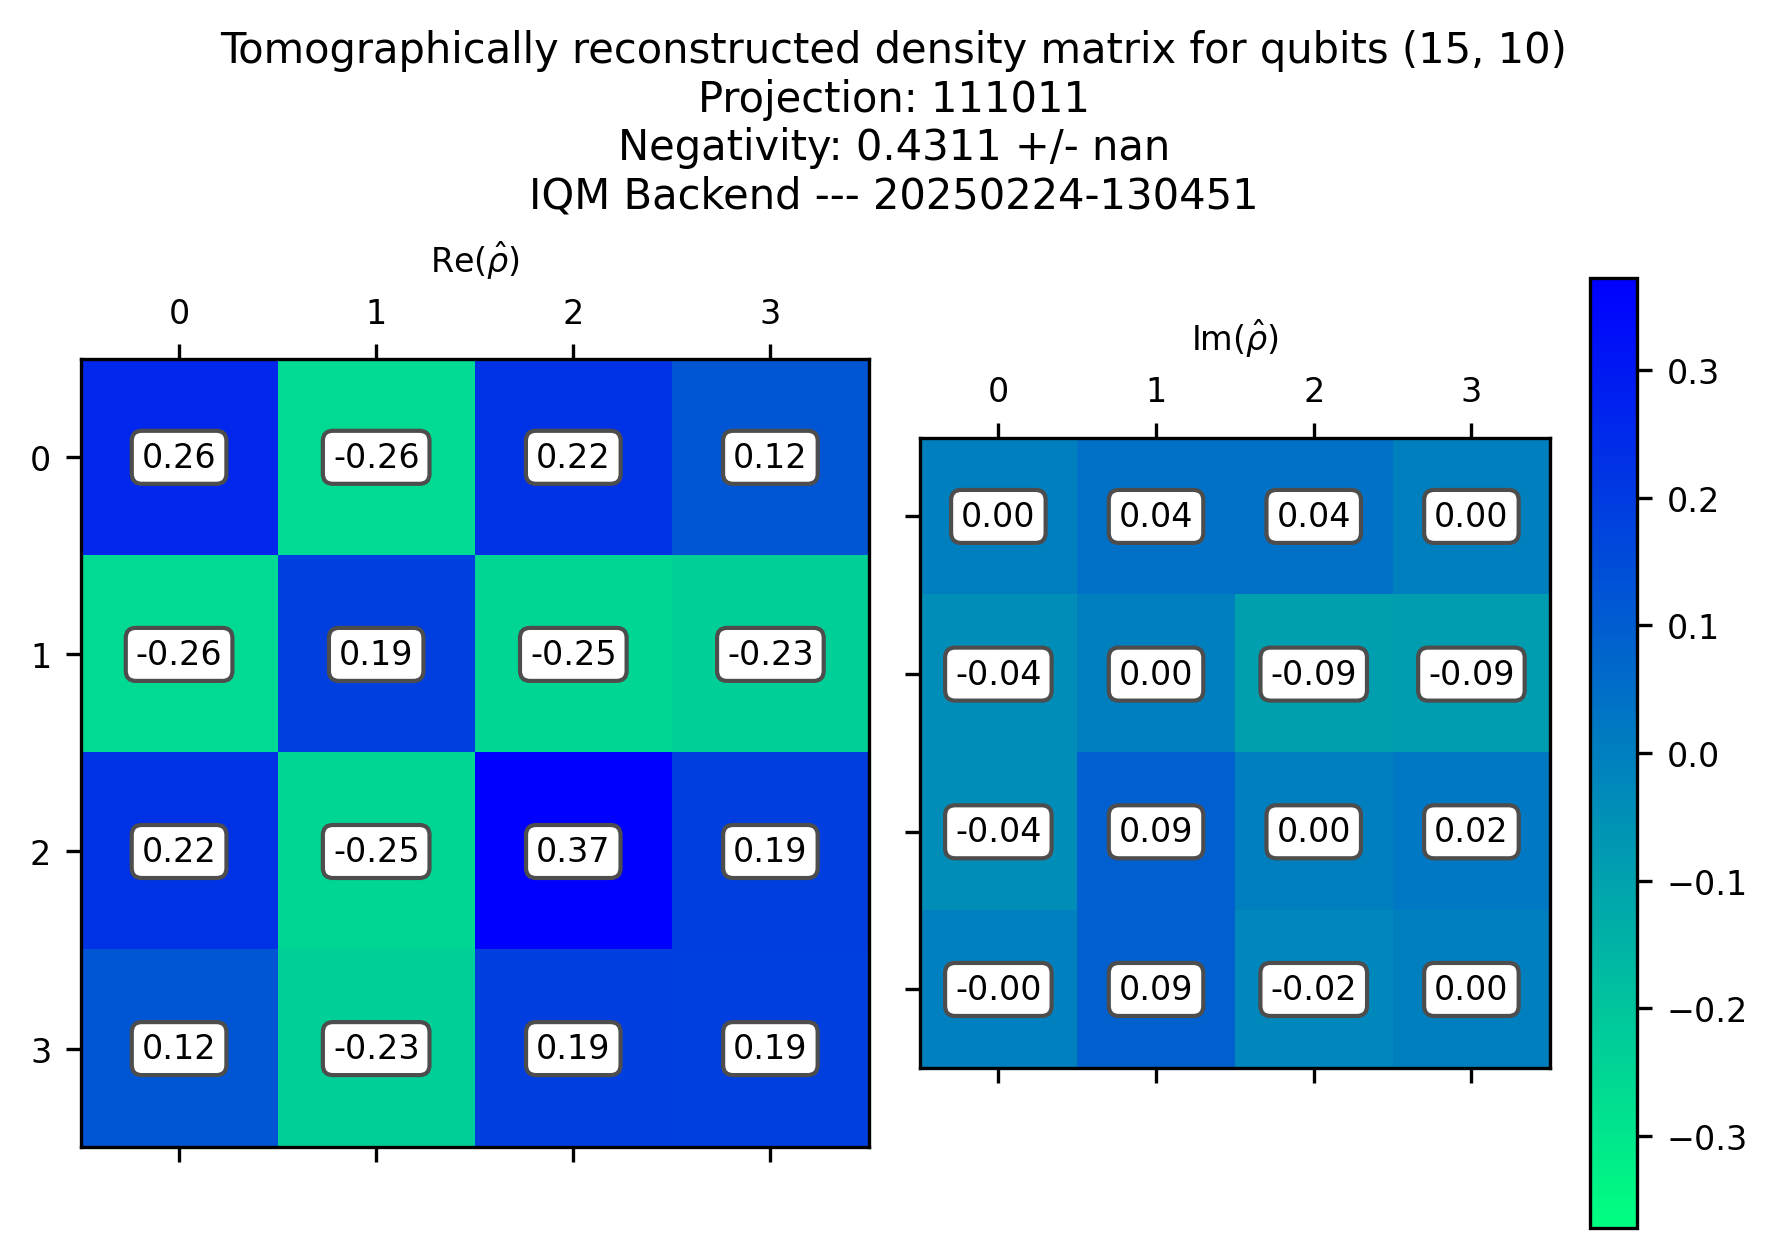

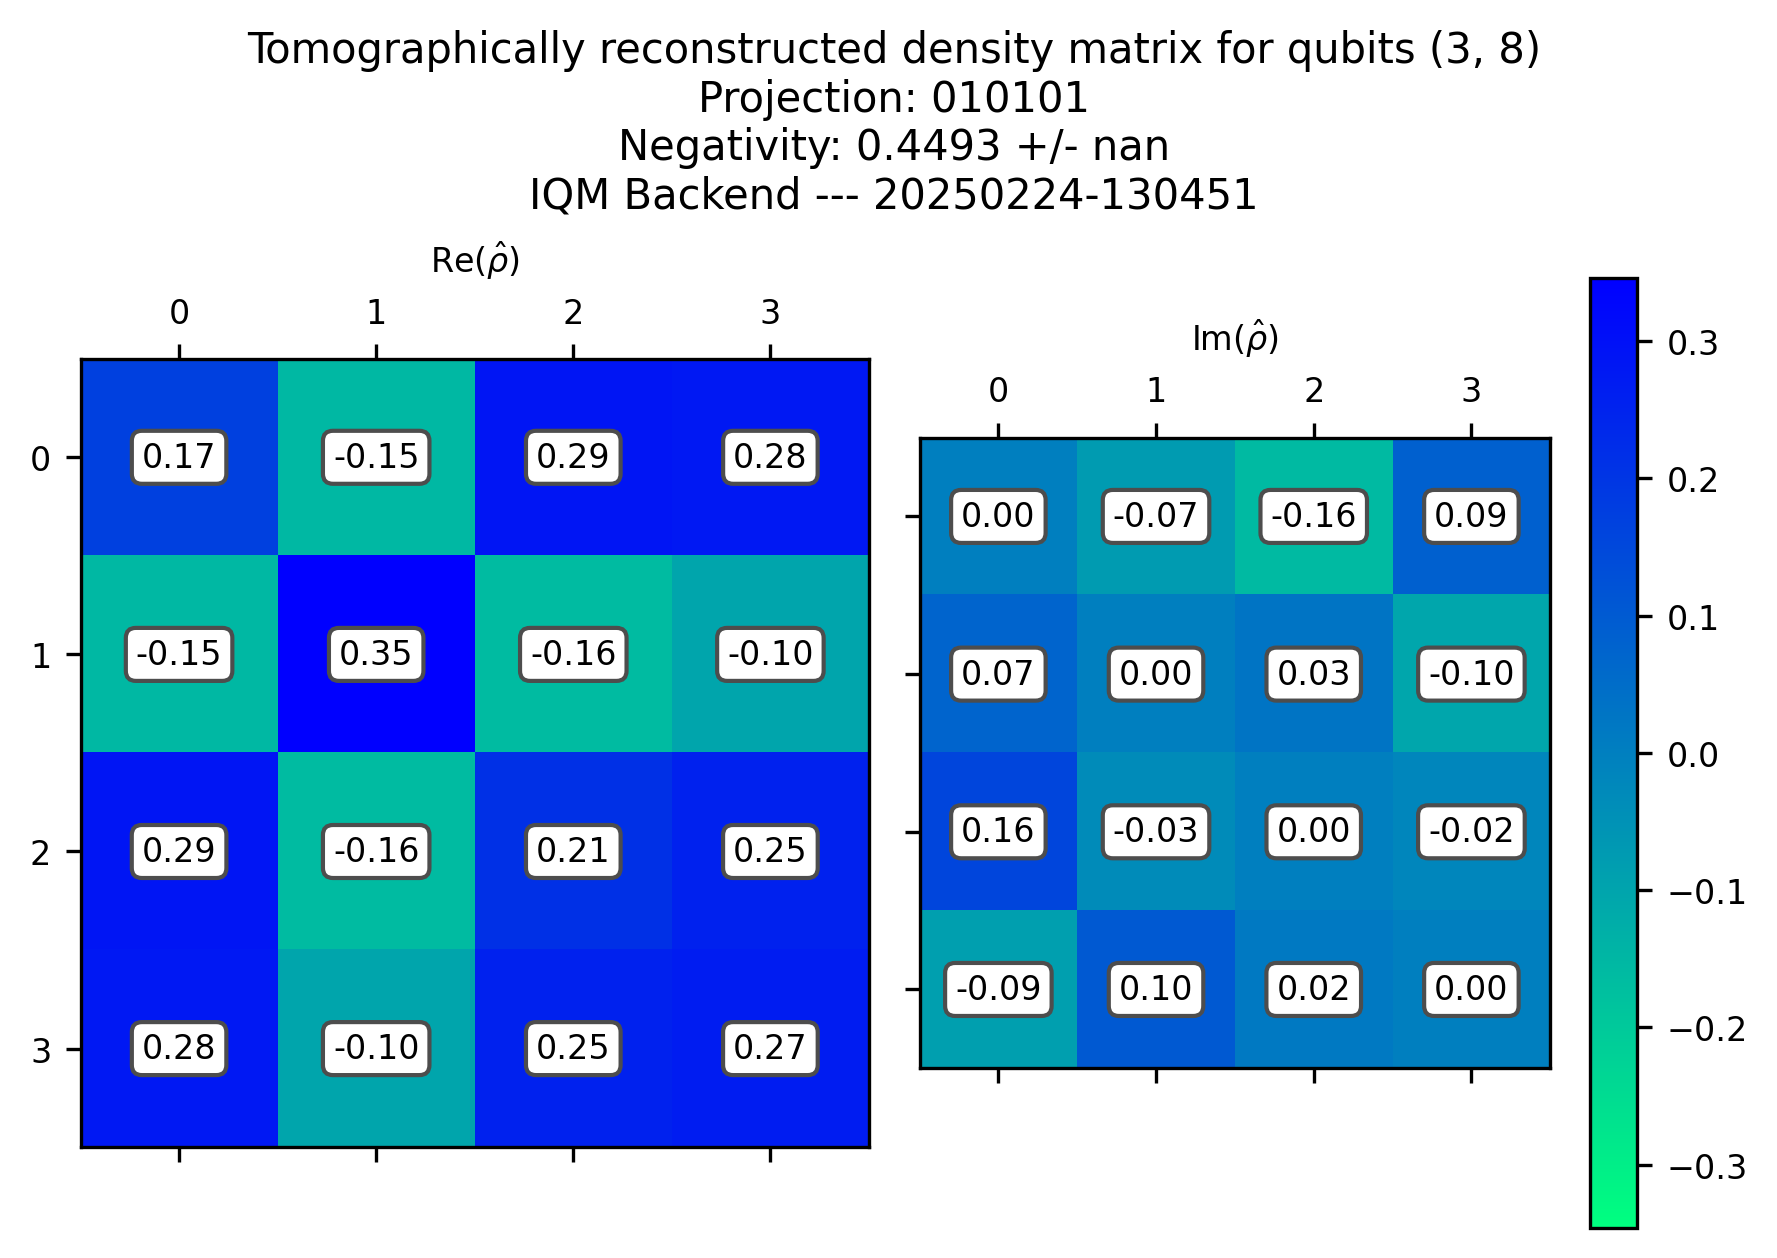

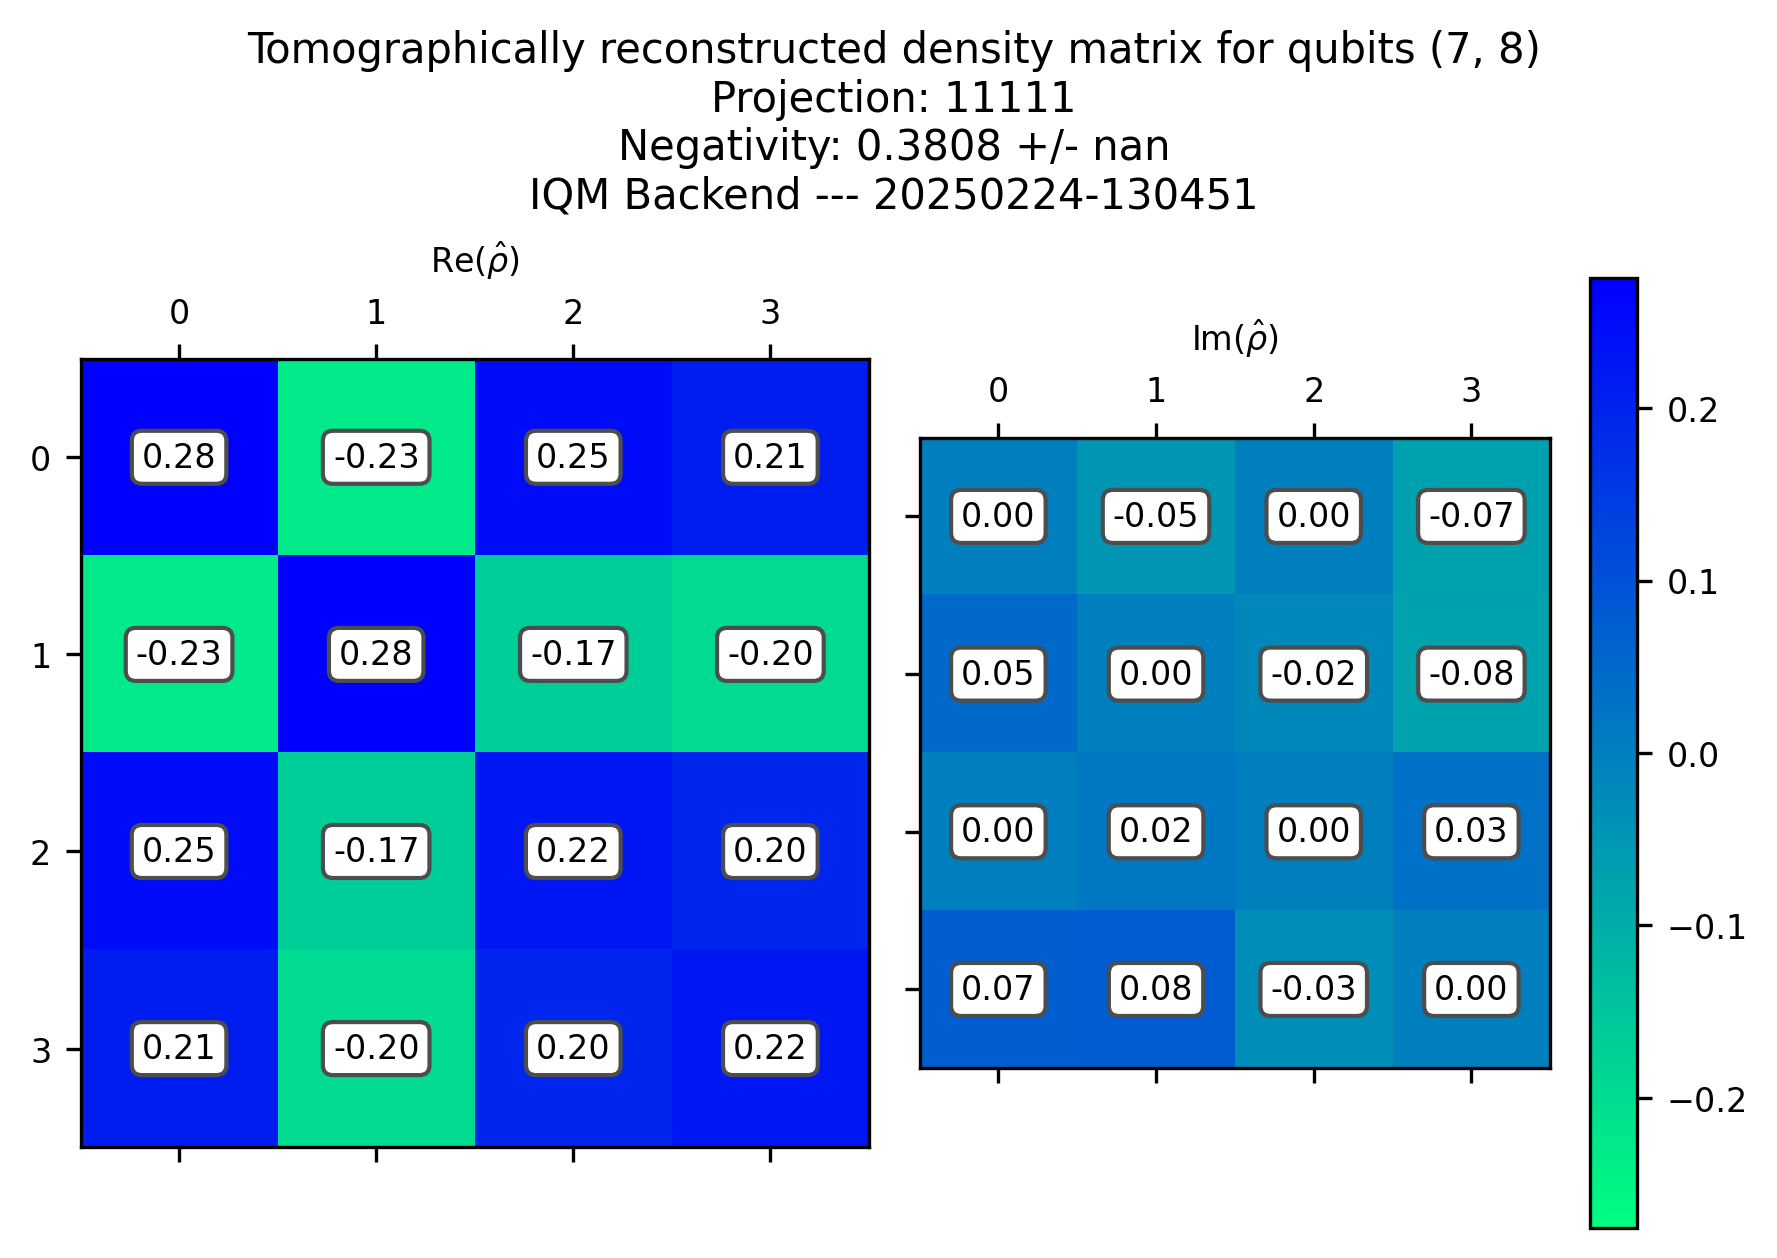

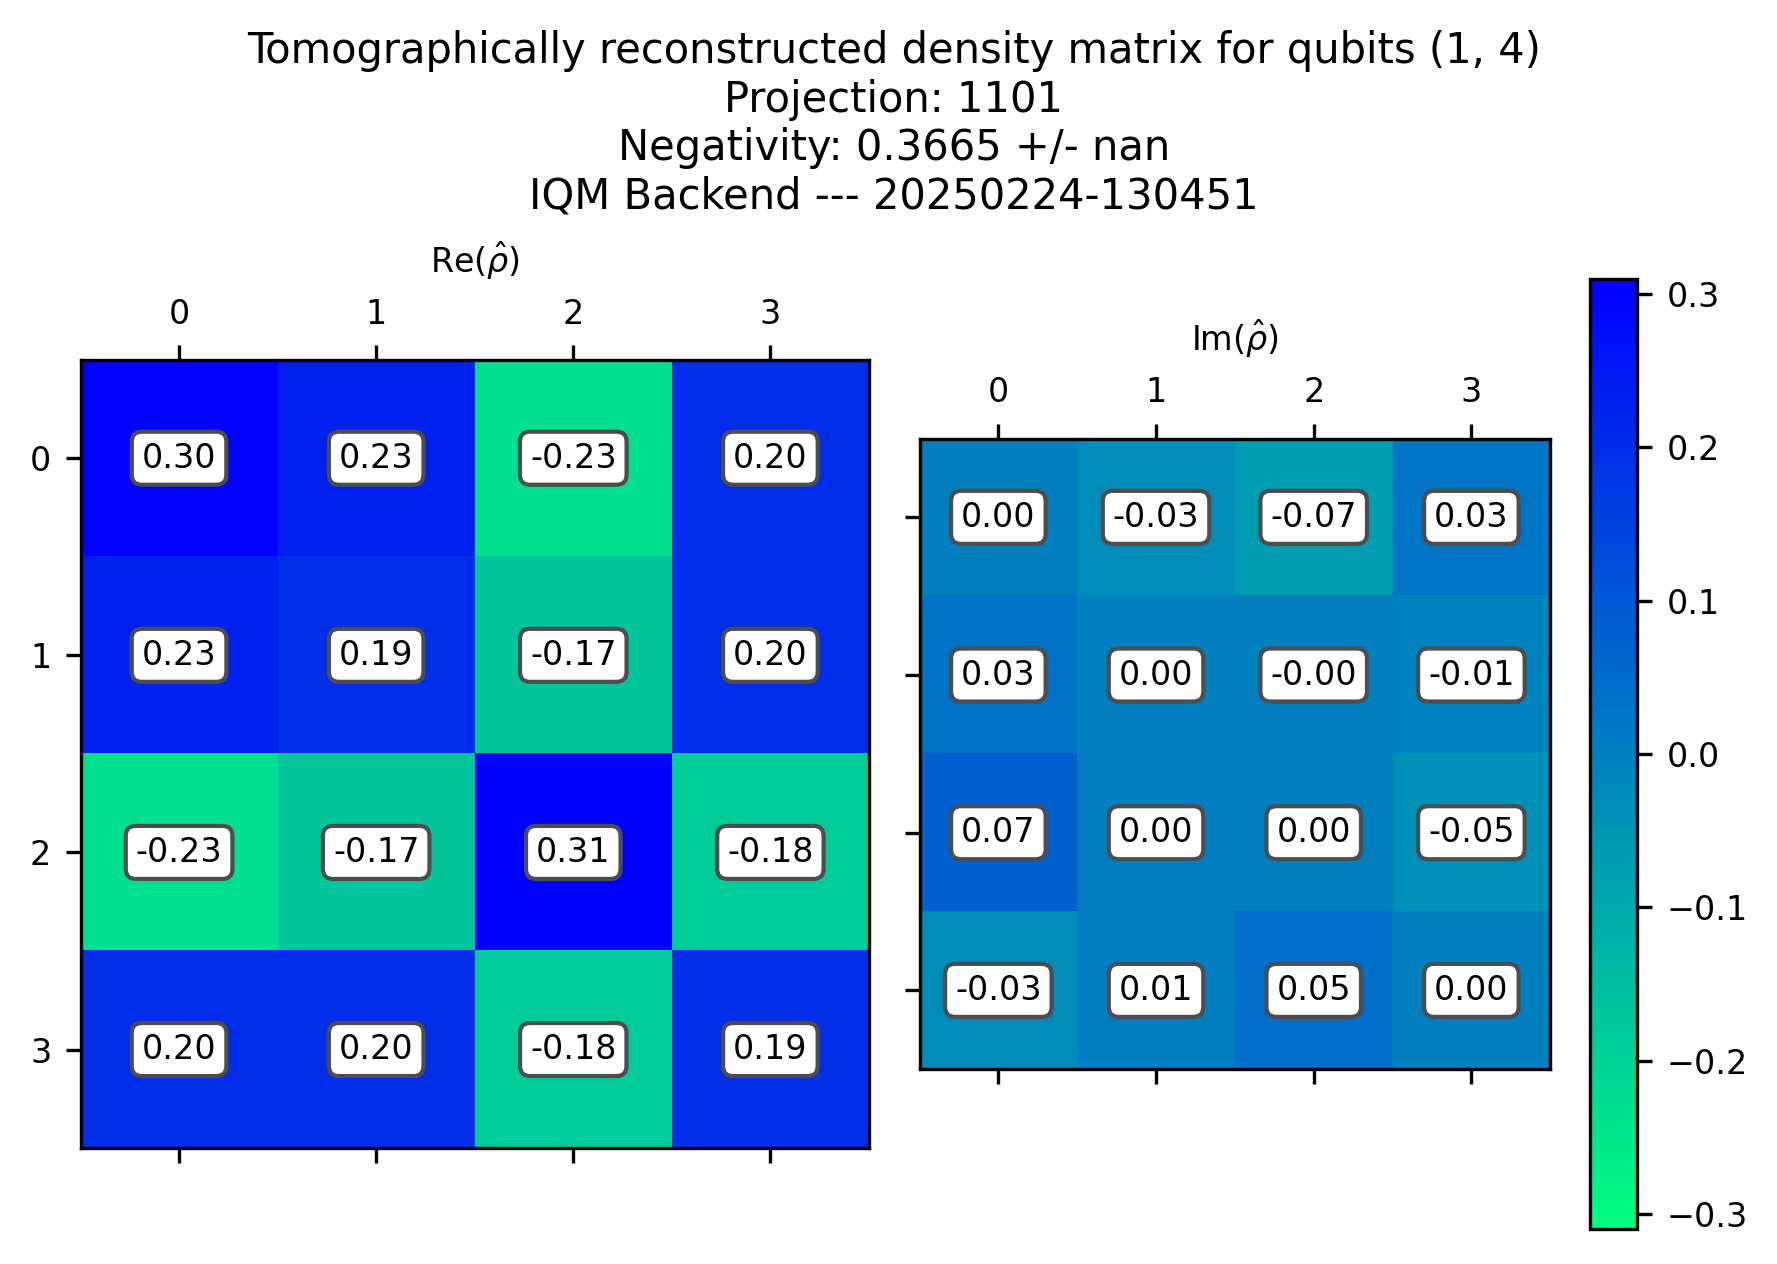

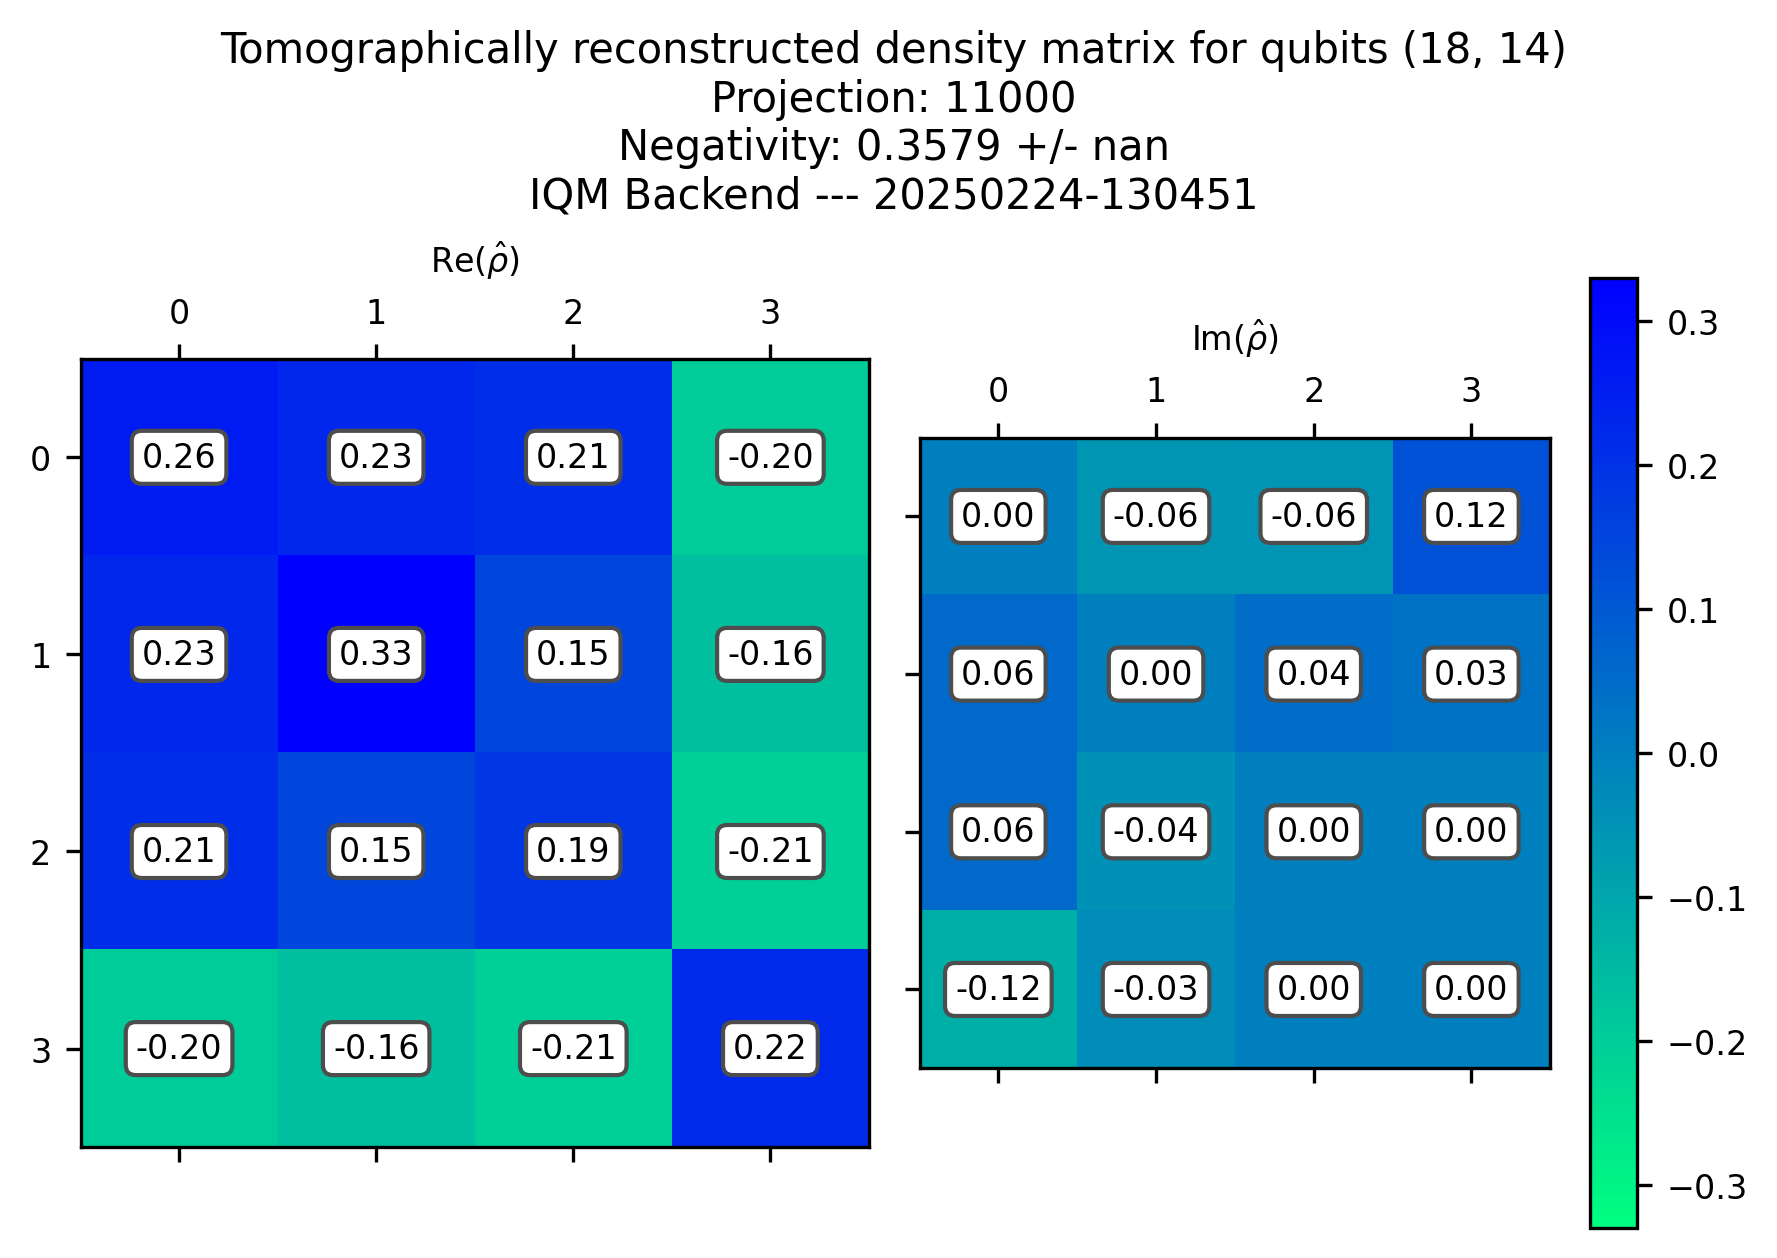

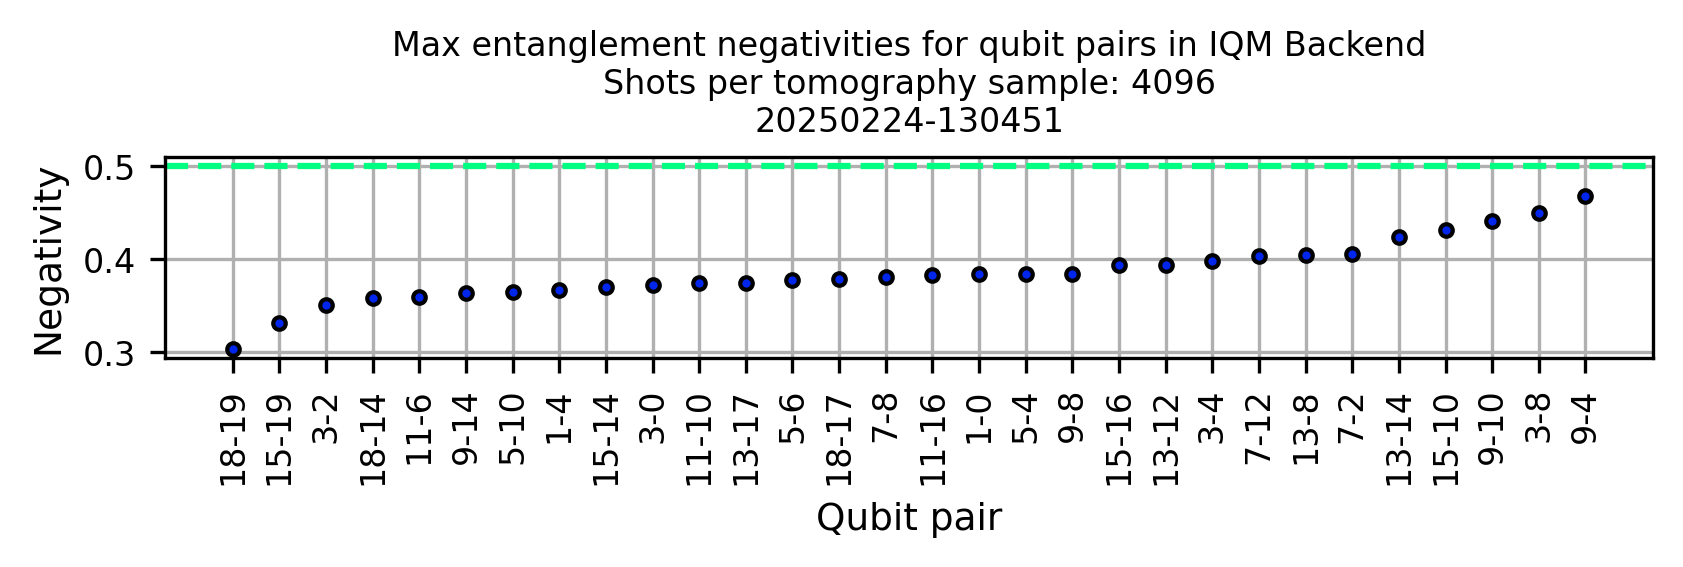

In [12]:
result_graphstate.plot_all()

In [13]:
result_graphstate.dataset.attrs["all_neighbor_groups"]

{0: [{5, 6, 9, 15, 16}, {13, 14, 19}, {2, 8, 13}, {0, 1, 2, 5, 8, 9}],
 1: [{3, 7, 9, 12, 14, 17}, {6, 10, 15}, {1, 3, 6, 9, 10}, {14, 15, 17}],
 2: [{3, 4}, {8, 9, 12, 15, 17, 18}, {4, 6, 9, 11, 15}, {3, 8, 12}],
 3: [{10, 11, 14, 19}, {4, 10, 11}, {3, 4, 7, 10, 13, 14}],
 4: [{5, 10, 16}, {4, 8, 10, 13, 15, 18}, {1, 2, 4, 8}],
 5: [{10, 14, 16, 18}, {8, 12, 14, 18}, {1, 3, 5, 8, 10, 14}],
 6: [{0, 4, 7, 8}, {9, 10, 13, 16, 18, 19}],
 7: [{4, 5, 8, 11, 14, 15}, {7, 8, 14, 17}],
 8: [{5, 9, 11, 14, 16, 19}, {0, 2, 4, 7, 9, 13}],
 9: [{2, 3, 9, 12, 13}, {0, 3, 5, 9}, {9, 13, 15, 17, 19}]}

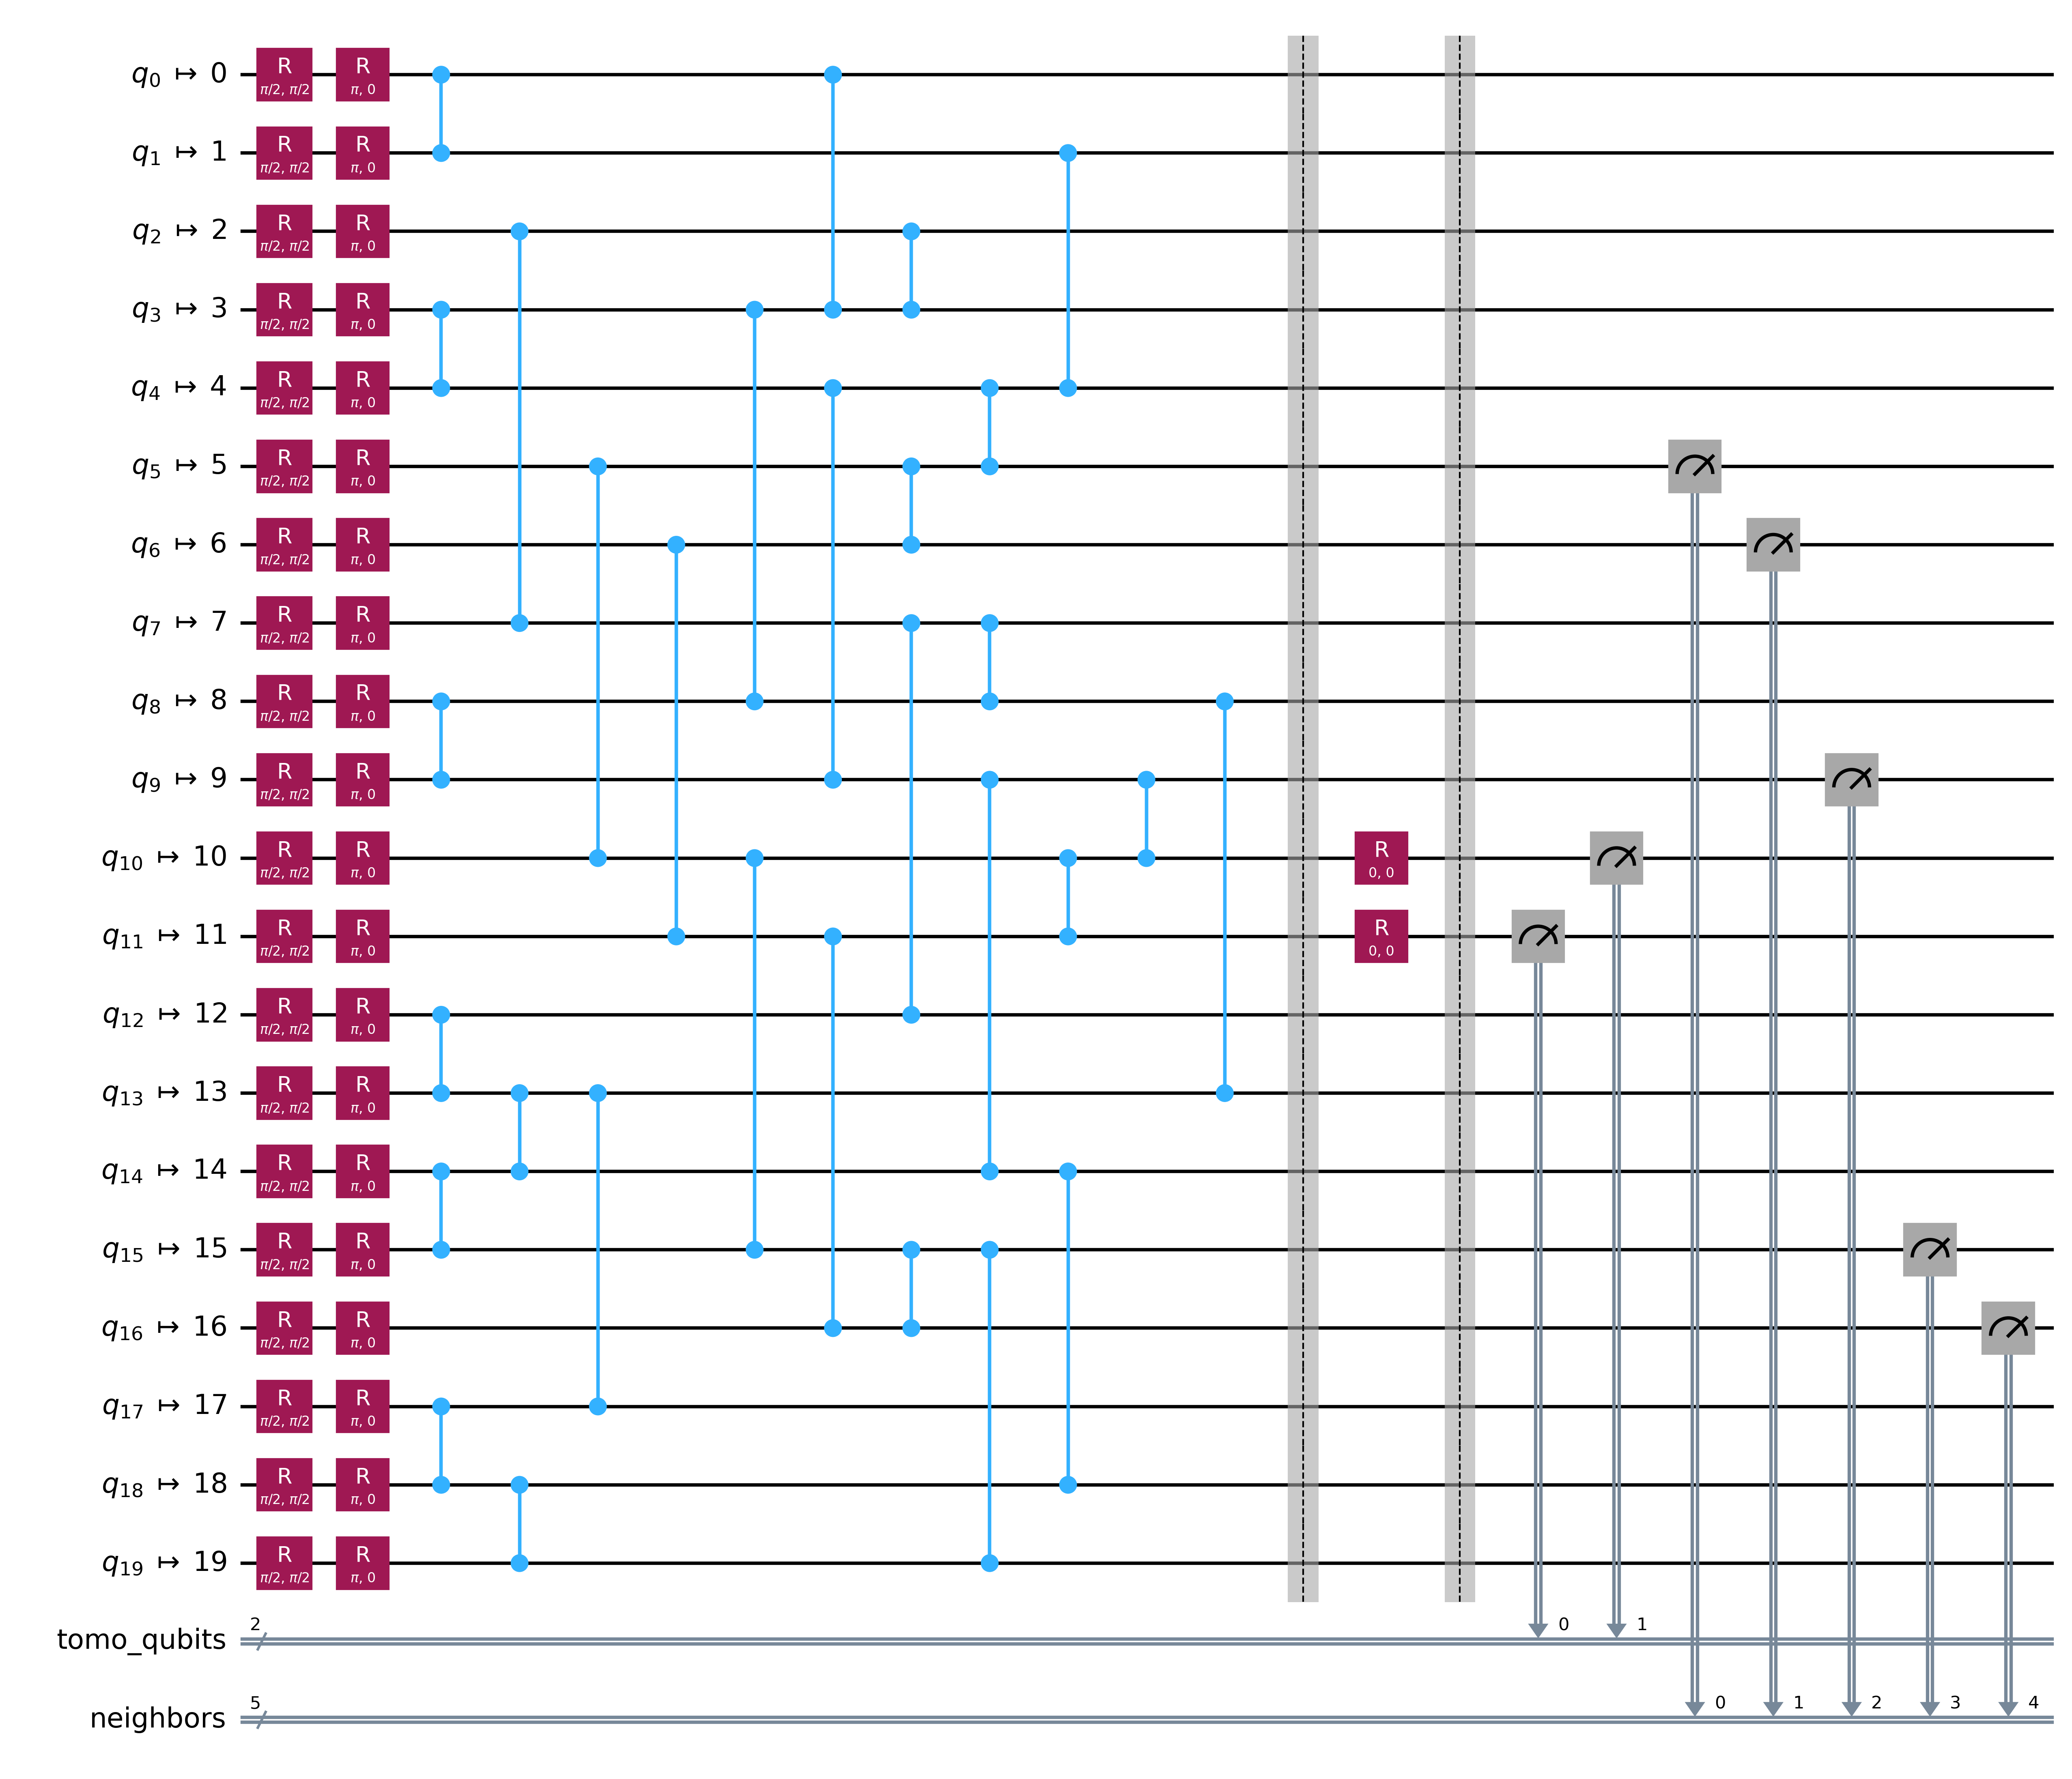

In [14]:
benchmark_graphstate.circuits.benchmark_circuits[0].circuit_groups[0].circuits[0].draw(output='mpl',fold=0,style='iqp')

In [15]:
from iqm.benchmarks.utils import get_measurement_mapping
d = get_measurement_mapping(benchmark_graphstate.circuits.benchmark_circuits[0].circuit_groups[0].circuits[5])
print(d) # Qubits to Clbits indices in respective registers (this function should say WHICH classical register!)

{11: 0, 10: 1, 5: 0, 6: 1, 9: 2, 15: 3, 16: 4}


In [16]:
result_graphstate.dataset.attrs.keys()

dict_keys(['session_timestamp', 'execution_timestamp', 'backend_configuration_name', 'backend_name', 'benchmark', 'shots', 'max_gates_per_batch', 'calset_id', 'routing_method', 'physical_layout', 'qubits', 'tomography', 'n_random_unitaries', 'n_median_of_means', 'time_circuit_generation', 'all_unprojected_qubits', 'all_projected_qubits', 'all_pair_groups', 'all_neighbor_groups', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'all_tomography_states', 'all_negativities', 'max_negativities'])